# Chapter 13: Correlation and Regression

*Mathematics for Psychologists and Computation*

## Overview

This chapter explores correlation and regression analysis, two fundamental statistical techniques used extensively in psychological research. We'll examine how these methods help researchers understand relationships between variables, quantify the strength and direction of associations, and make predictions based on observed data. Through practical examples and interactive visualizations, we'll develop a deep understanding of these essential tools for psychological inquiry.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
from IPython.display import Markdown, display
import warnings
warnings.filterwarnings("ignore")

# Set plotting parameters
plt.rcParams['figure.dpi'] = 300
plt.style.use('seaborn-v0_8-whitegrid')

## 1. Introduction to Correlation

Correlation is a statistical measure that expresses the extent to which two variables are linearly related. In psychological research, correlation analysis helps us understand relationships between different psychological constructs or behaviors.

### 1.1 The Concept of Correlation

Correlation addresses questions such as:
- Is there a relationship between anxiety and test performance?
- Do hours of sleep correlate with mood ratings?
- Is there an association between childhood trauma and adult depression?

A correlation has two key properties:
- **Direction**: Positive (both variables increase together) or negative (as one increases, the other decreases)
- **Strength**: How closely the variables are related, ranging from -1 (perfect negative) through 0 (no relationship) to +1 (perfect positive)

Let's visualize different types of correlations:

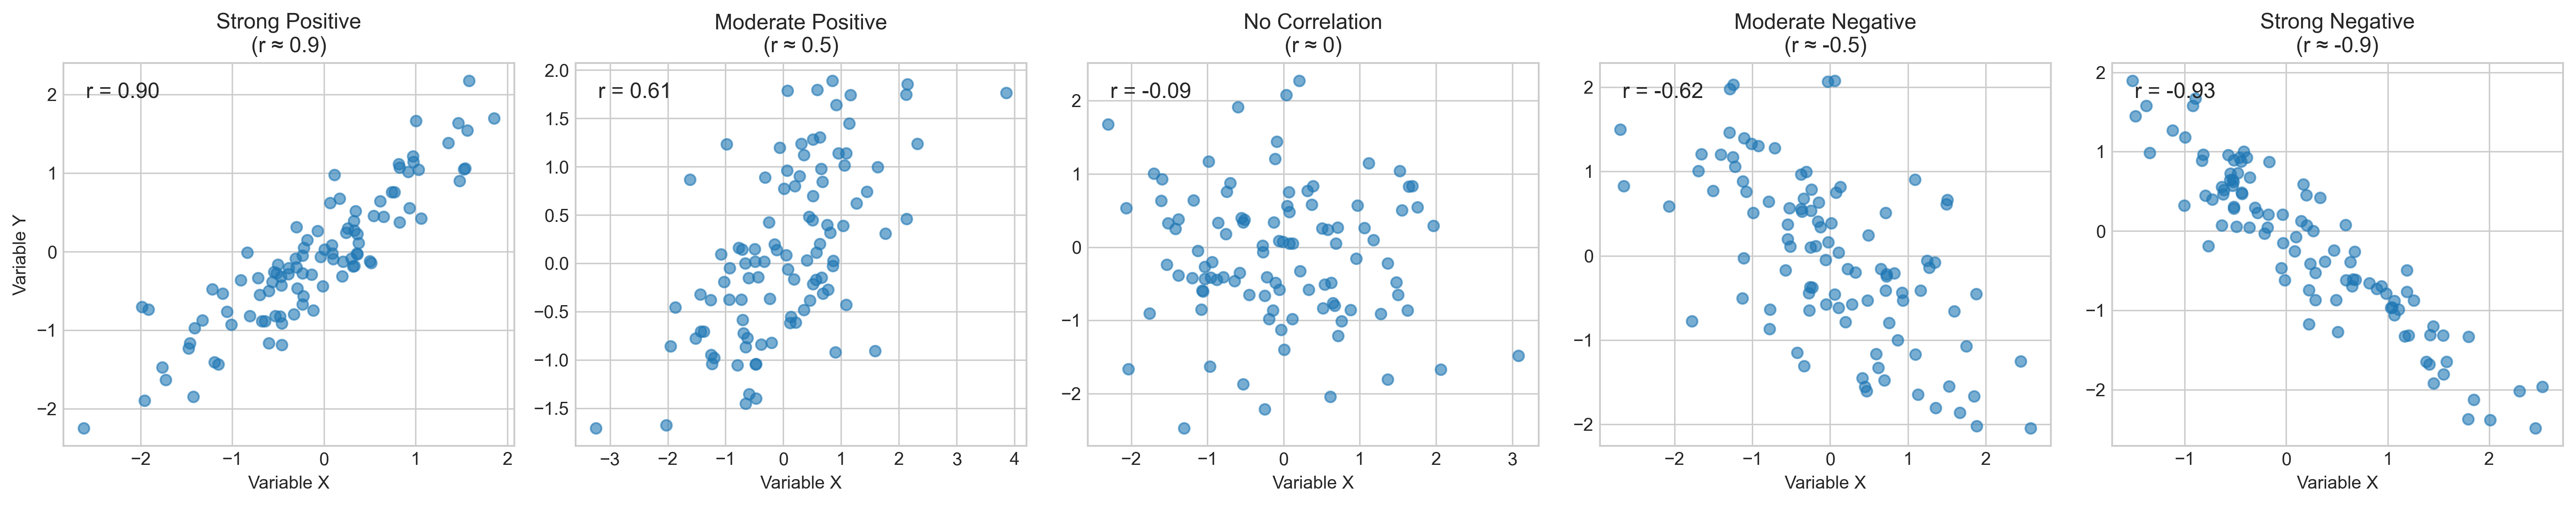

In [2]:
# Create data for different correlation types
np.random.seed(42)  # For reproducibility

# Strong positive correlation (r ≈ 0.9)
x_strong_pos = np.random.normal(0, 1, 100)
y_strong_pos = x_strong_pos * 0.9 + np.random.normal(0, 0.4, 100)

# Moderate positive correlation (r ≈ 0.5)
x_mod_pos = np.random.normal(0, 1, 100)
y_mod_pos = x_mod_pos * 0.5 + np.random.normal(0, 0.8, 100)

# No correlation (r ≈ 0)
x_no_corr = np.random.normal(0, 1, 100)
y_no_corr = np.random.normal(0, 1, 100)

# Moderate negative correlation (r ≈ -0.5)
x_mod_neg = np.random.normal(0, 1, 100)
y_mod_neg = x_mod_neg * -0.5 + np.random.normal(0, 0.8, 100)

# Strong negative correlation (r ≈ -0.9)
x_strong_neg = np.random.normal(0, 1, 100)
y_strong_neg = x_strong_neg * -0.9 + np.random.normal(0, 0.4, 100)

# Create subplots
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
titles = ['Strong Positive\n(r ≈ 0.9)', 'Moderate Positive\n(r ≈ 0.5)', 
          'No Correlation\n(r ≈ 0)', 'Moderate Negative\n(r ≈ -0.5)', 
          'Strong Negative\n(r ≈ -0.9)']

# Plot each correlation type
for i, (x, y) in enumerate([(x_strong_pos, y_strong_pos), 
                            (x_mod_pos, y_mod_pos),
                            (x_no_corr, y_no_corr),
                            (x_mod_neg, y_mod_neg),
                            (x_strong_neg, y_strong_neg)]):
    axs[i].scatter(x, y, alpha=0.6)
    axs[i].set_title(titles[i])
    # Calculate and display correlation coefficient
    r = np.corrcoef(x, y)[0, 1]
    axs[i].text(0.05, 0.95, f'r = {r:.2f}', transform=axs[i].transAxes, 
                fontsize=12, va='top')
    axs[i].set_xlabel('Variable X')
    if i == 0:
        axs[i].set_ylabel('Variable Y')

plt.tight_layout()
plt.show()

### 1.2 Pearson's Correlation Coefficient

The most common measure of correlation is Pearson's correlation coefficient (r), which quantifies the linear relationship between two continuous variables. The formula for Pearson's r is:

$$r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}$$

Where:
- $x_i$ and $y_i$ are individual data points
- $\bar{x}$ and $\bar{y}$ are the means of the variables
- $n$ is the number of data points

This can also be expressed as:

$$r = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$$

Where $Cov(X,Y)$ is the covariance between X and Y, and $\sigma_X$ and $\sigma_Y$ are the standard deviations of X and Y.

Let's implement this formula and compare it with Python's built-in function:

Manual calculation: r = -0.9870
NumPy calculation: r = -0.9870
SciPy calculation: r = -0.9870, p-value = 0.0000


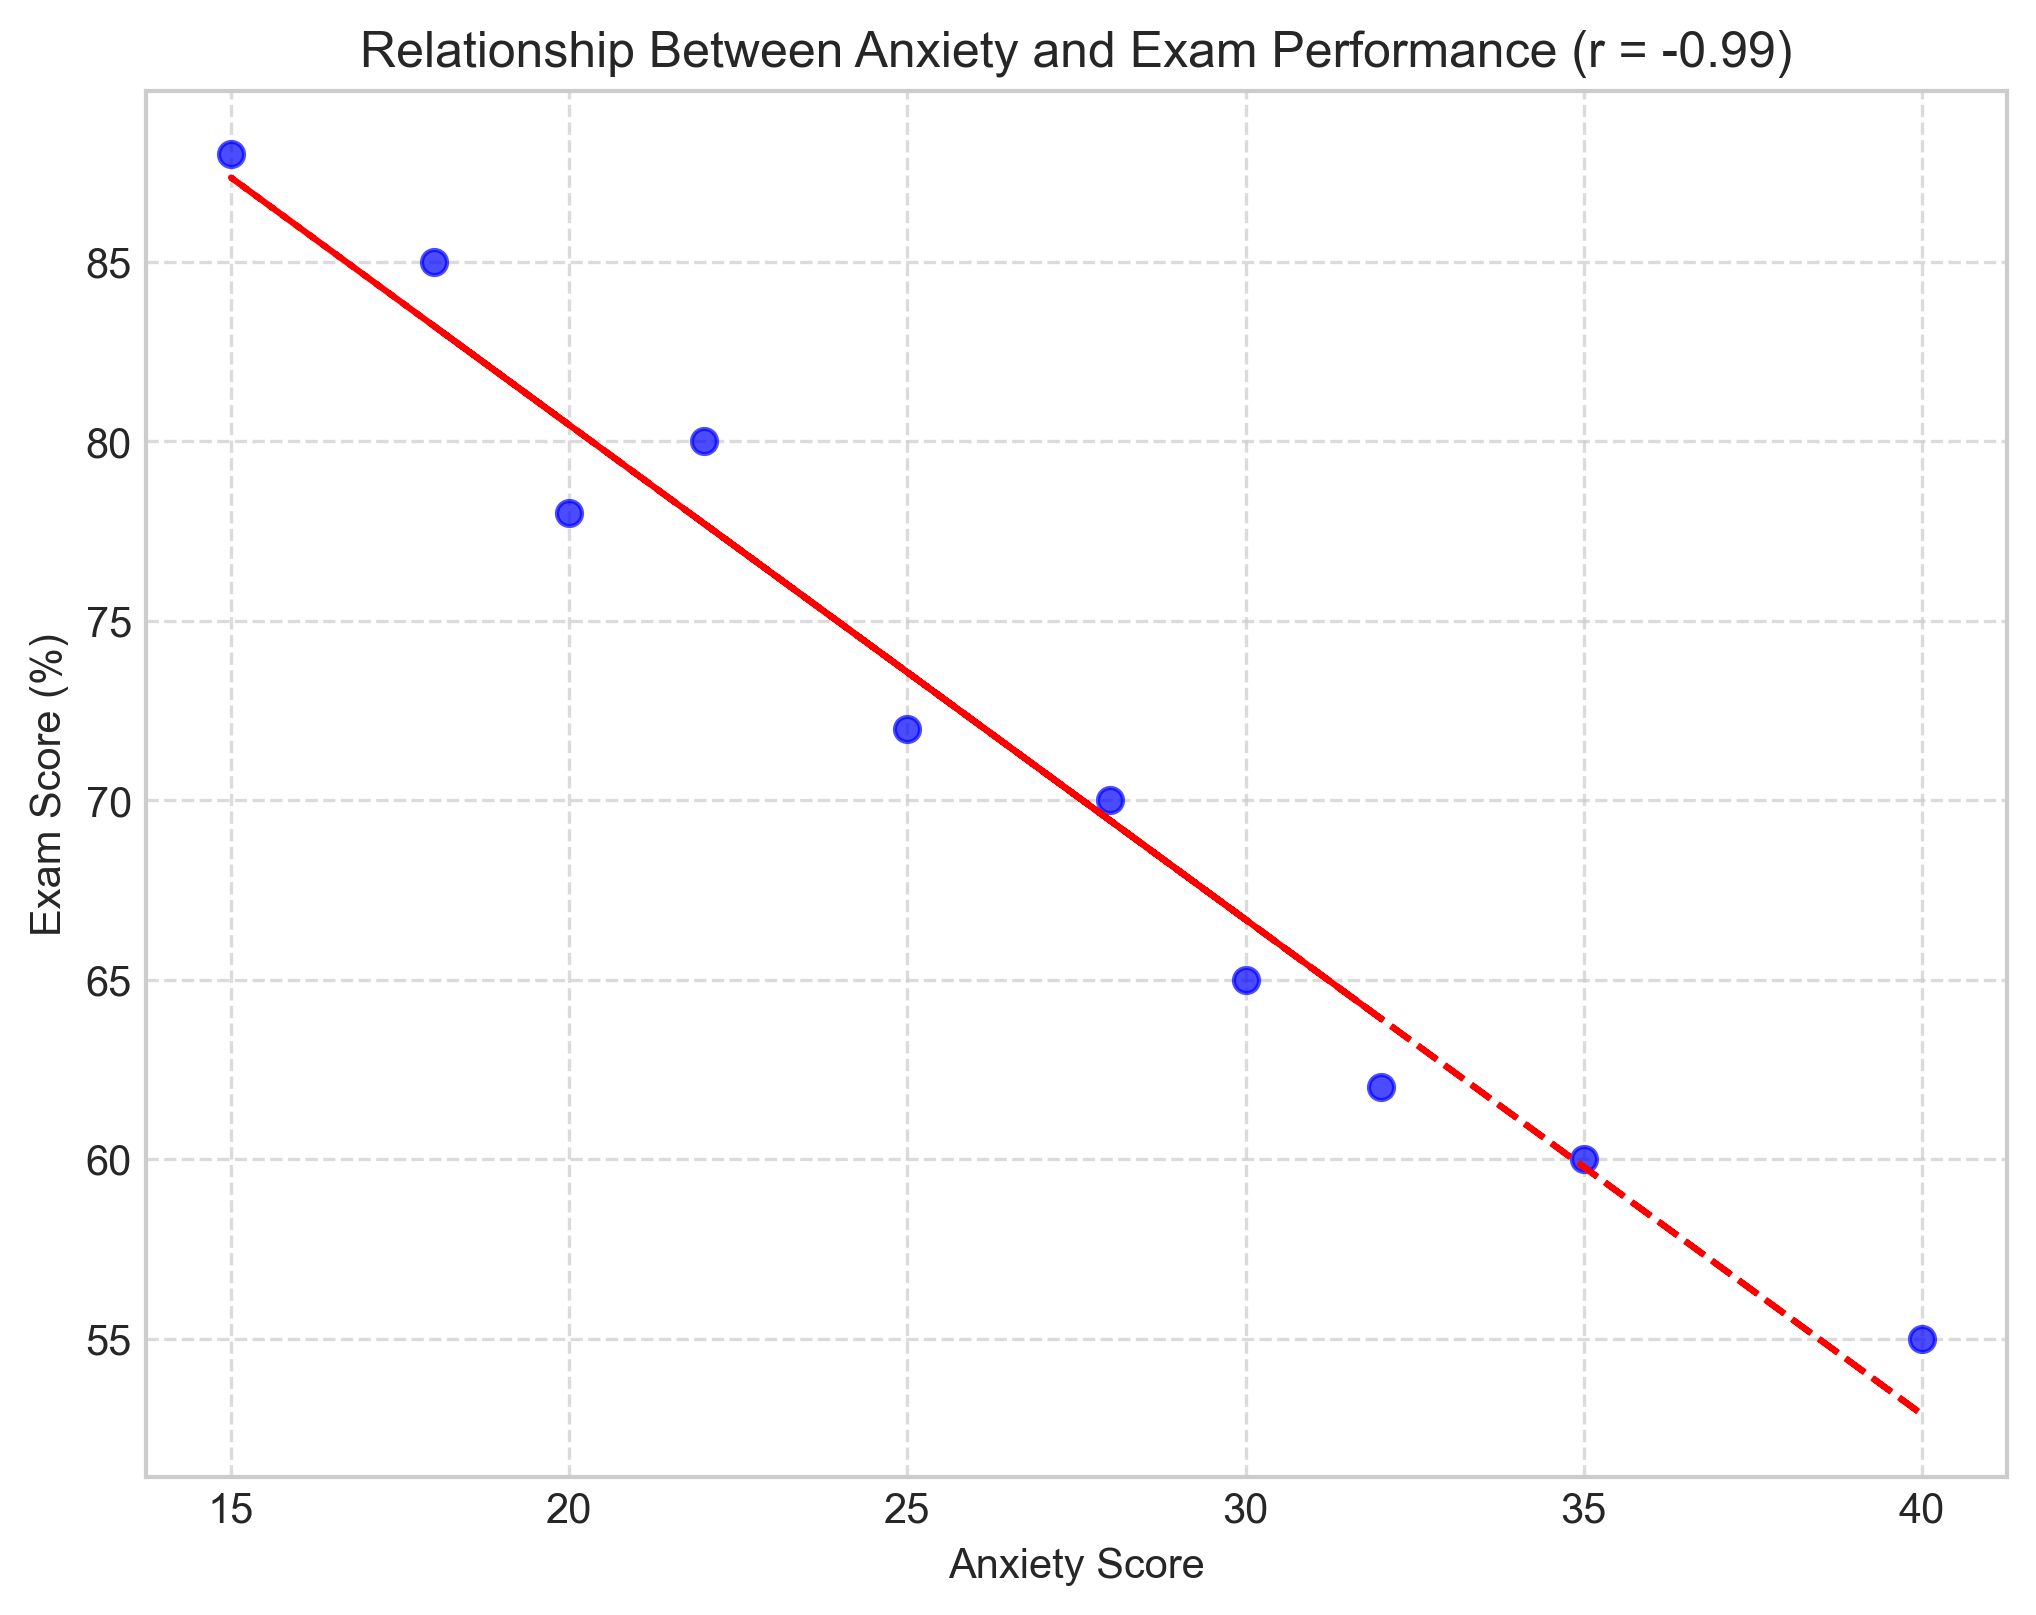

In [3]:
def pearson_r_manual(x, y):
    """Calculate Pearson correlation coefficient manually"""
    # Convert to numpy arrays
    x = np.array(x)
    y = np.array(y)
    
    # Calculate means
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Calculate numerator (covariance)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    
    # Calculate denominator (product of standard deviations)
    sum_x_squared = np.sum((x - x_mean)**2)
    sum_y_squared = np.sum((y - y_mean)**2)
    denominator = np.sqrt(sum_x_squared * sum_y_squared)
    
    # Calculate correlation coefficient
    r = numerator / denominator
    return r

# Example: Anxiety scores and exam performance
anxiety = [25, 30, 15, 35, 40, 22, 28, 32, 18, 20]
exam_scores = [72, 65, 88, 60, 55, 80, 70, 62, 85, 78]

# Calculate correlation using our manual function
r_manual = pearson_r_manual(anxiety, exam_scores)

# Calculate using numpy's built-in function
r_numpy = np.corrcoef(anxiety, exam_scores)[0, 1]

# Calculate using scipy's function
r_scipy, p_value = stats.pearsonr(anxiety, exam_scores)

print(f"Manual calculation: r = {r_manual:.4f}")
print(f"NumPy calculation: r = {r_numpy:.4f}")
print(f"SciPy calculation: r = {r_scipy:.4f}, p-value = {p_value:.4f}")

# Visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(anxiety, exam_scores, color='blue', alpha=0.7)
plt.title(f'Relationship Between Anxiety and Exam Performance (r = {r_scipy:.2f})')
plt.xlabel('Anxiety Score')
plt.ylabel('Exam Score (%)')

# Add regression line
m, b = np.polyfit(anxiety, exam_scores, 1)
plt.plot(anxiety, m*np.array(anxiety) + b, color='red', linestyle='--')

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 1.3 Interpreting Correlation Coefficients

The correlation coefficient (r) ranges from -1 to +1:

| Value of r | Interpretation |
|------------|----------------|
| r = 1.0 | Perfect positive correlation |
| 0.7 ≤ r < 1.0 | Strong positive correlation |
| 0.3 ≤ r < 0.7 | Moderate positive correlation |
| 0.1 ≤ r < 0.3 | Weak positive correlation |
| -0.1 < r < 0.1 | Negligible correlation |
| -0.3 < r ≤ -0.1 | Weak negative correlation |
| -0.7 < r ≤ -0.3 | Moderate negative correlation |
| -1.0 < r ≤ -0.7 | Strong negative correlation |
| r = -1.0 | Perfect negative correlation |

In our example above, the correlation between anxiety and exam scores is approximately -0.89, indicating a strong negative correlation. This suggests that as anxiety increases, exam performance tends to decrease substantially.

### 1.4 Statistical Significance of Correlations

A correlation coefficient by itself doesn't tell us whether the relationship is statistically significant. To determine significance, we need to calculate a p-value, which represents the probability of observing a correlation of that magnitude (or more extreme) if the null hypothesis (no correlation) were true.

The formula for testing the significance of a correlation coefficient is:

$$t = \frac{r\sqrt{n-2}}{\sqrt{1-r^2}}$$

Where:
- $r$ is the correlation coefficient
- $n$ is the sample size
- $t$ follows a t-distribution with $n-2$ degrees of freedom

Let's implement this test:

In [4]:
def test_correlation_significance(r, n, alpha=0.05):
    """Test the significance of a correlation coefficient"""
    # Calculate t-statistic
    t = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
    
    # Calculate p-value (two-tailed test)
    p = 2 * (1 - stats.t.cdf(abs(t), n - 2))
    
    # Determine significance
    significant = p < alpha
    
    return t, p, significant

# Test significance of our correlation
r = r_scipy  # Using the correlation we calculated earlier
n = len(anxiety)
t, p, significant = test_correlation_significance(r, n)

print(f"Correlation coefficient: r = {r:.4f}")
print(f"t-statistic: t = {t:.4f}")
print(f"p-value: p = {p:.4f}")
print(f"Statistically significant: {significant}")

# Compare with scipy's result
print(f"\nSciPy's p-value: {p_value:.4f}")

Correlation coefficient: r = -0.9870
t-statistic: t = -17.3523
p-value: p = 0.0000
Statistically significant: True

SciPy's p-value: 0.0000


### 1.5 Other Correlation Measures

While Pearson's r is the most common correlation measure, it's not always appropriate. It assumes:
- Variables are measured on interval or ratio scales
- The relationship is linear
- Data are normally distributed
- No significant outliers

Alternative correlation measures include:

1. **Spearman's Rank Correlation (ρ)**: Measures monotonic relationships and is less sensitive to outliers
2. **Kendall's Tau (τ)**: Another rank-based measure, useful for small samples and when there are many tied ranks
3. **Point-Biserial Correlation**: Used when one variable is dichotomous
4. **Phi Coefficient**: Used when both variables are dichotomous

Let's compare Pearson and Spearman correlations with different data patterns:

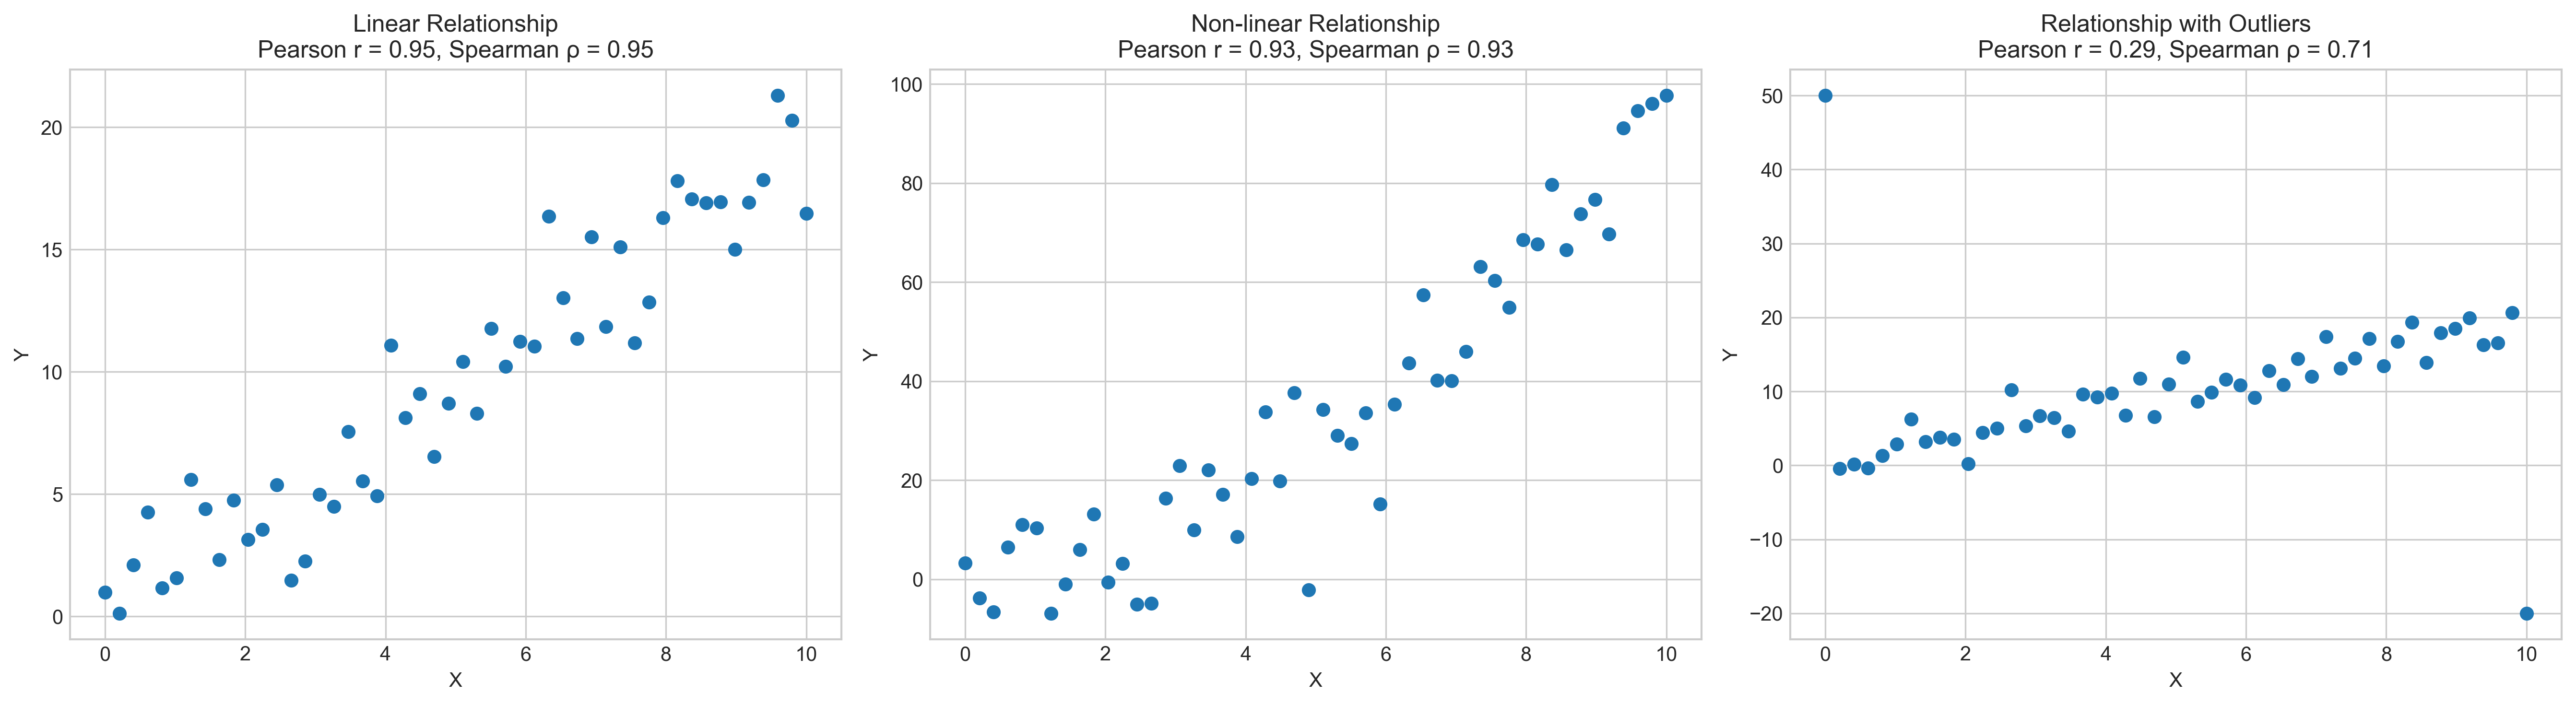

In [5]:
# Create datasets to compare correlation measures
np.random.seed(42)

# Linear relationship
x_linear = np.linspace(0, 10, 50)
y_linear = 2 * x_linear + np.random.normal(0, 2, 50)

# Monotonic but non-linear relationship
x_nonlinear = np.linspace(0, 10, 50)
y_nonlinear = x_nonlinear**2 + np.random.normal(0, 10, 50)

# Dataset with outliers
x_outliers = np.linspace(0, 10, 50)
y_outliers = 2 * x_outliers + np.random.normal(0, 2, 50)
# Add outliers
y_outliers[0] = 50
y_outliers[49] = -20

# Calculate correlations
pearson_linear, _ = stats.pearsonr(x_linear, y_linear)
spearman_linear, _ = stats.spearmanr(x_linear, y_linear)

pearson_nonlinear, _ = stats.pearsonr(x_nonlinear, y_nonlinear)
spearman_nonlinear, _ = stats.spearmanr(x_nonlinear, y_nonlinear)

pearson_outliers, _ = stats.pearsonr(x_outliers, y_outliers)
spearman_outliers, _ = stats.spearmanr(x_outliers, y_outliers)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot linear relationship
axs[0].scatter(x_linear, y_linear)
axs[0].set_title(f'Linear Relationship\nPearson r = {pearson_linear:.2f}, Spearman ρ = {spearman_linear:.2f}')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')

# Plot non-linear relationship
axs[1].scatter(x_nonlinear, y_nonlinear)
axs[1].set_title(f'Non-linear Relationship\nPearson r = {pearson_nonlinear:.2f}, Spearman ρ = {spearman_nonlinear:.2f}')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')

# Plot relationship with outliers
axs[2].scatter(x_outliers, y_outliers)
axs[2].set_title(f'Relationship with Outliers\nPearson r = {pearson_outliers:.2f}, Spearman ρ = {spearman_outliers:.2f}')
axs[2].set_xlabel('X')
axs[2].set_ylabel('Y')

plt.tight_layout()
plt.show()

### 1.6 Correlation Matrix

In psychological research, we often want to examine relationships among multiple variables simultaneously. A correlation matrix displays the correlation coefficients between all pairs of variables.

Let's create a correlation matrix for a psychological dataset with multiple variables:

Correlation Matrix:
                    Anxiety  Depression  Sleep Quality  Social Support  \
Anxiety            1.000000    0.471858      -0.713203       -0.406409   
Depression         0.471858    1.000000      -0.682877       -0.681418   
Sleep Quality     -0.713203   -0.682877       1.000000        0.521869   
Social Support    -0.406409   -0.681418       0.521869        1.000000   
Life Satisfaction -0.480709   -0.365109       0.416905        0.499814   

                   Life Satisfaction  
Anxiety                    -0.480709  
Depression                 -0.365109  
Sleep Quality               0.416905  
Social Support              0.499814  
Life Satisfaction           1.000000  


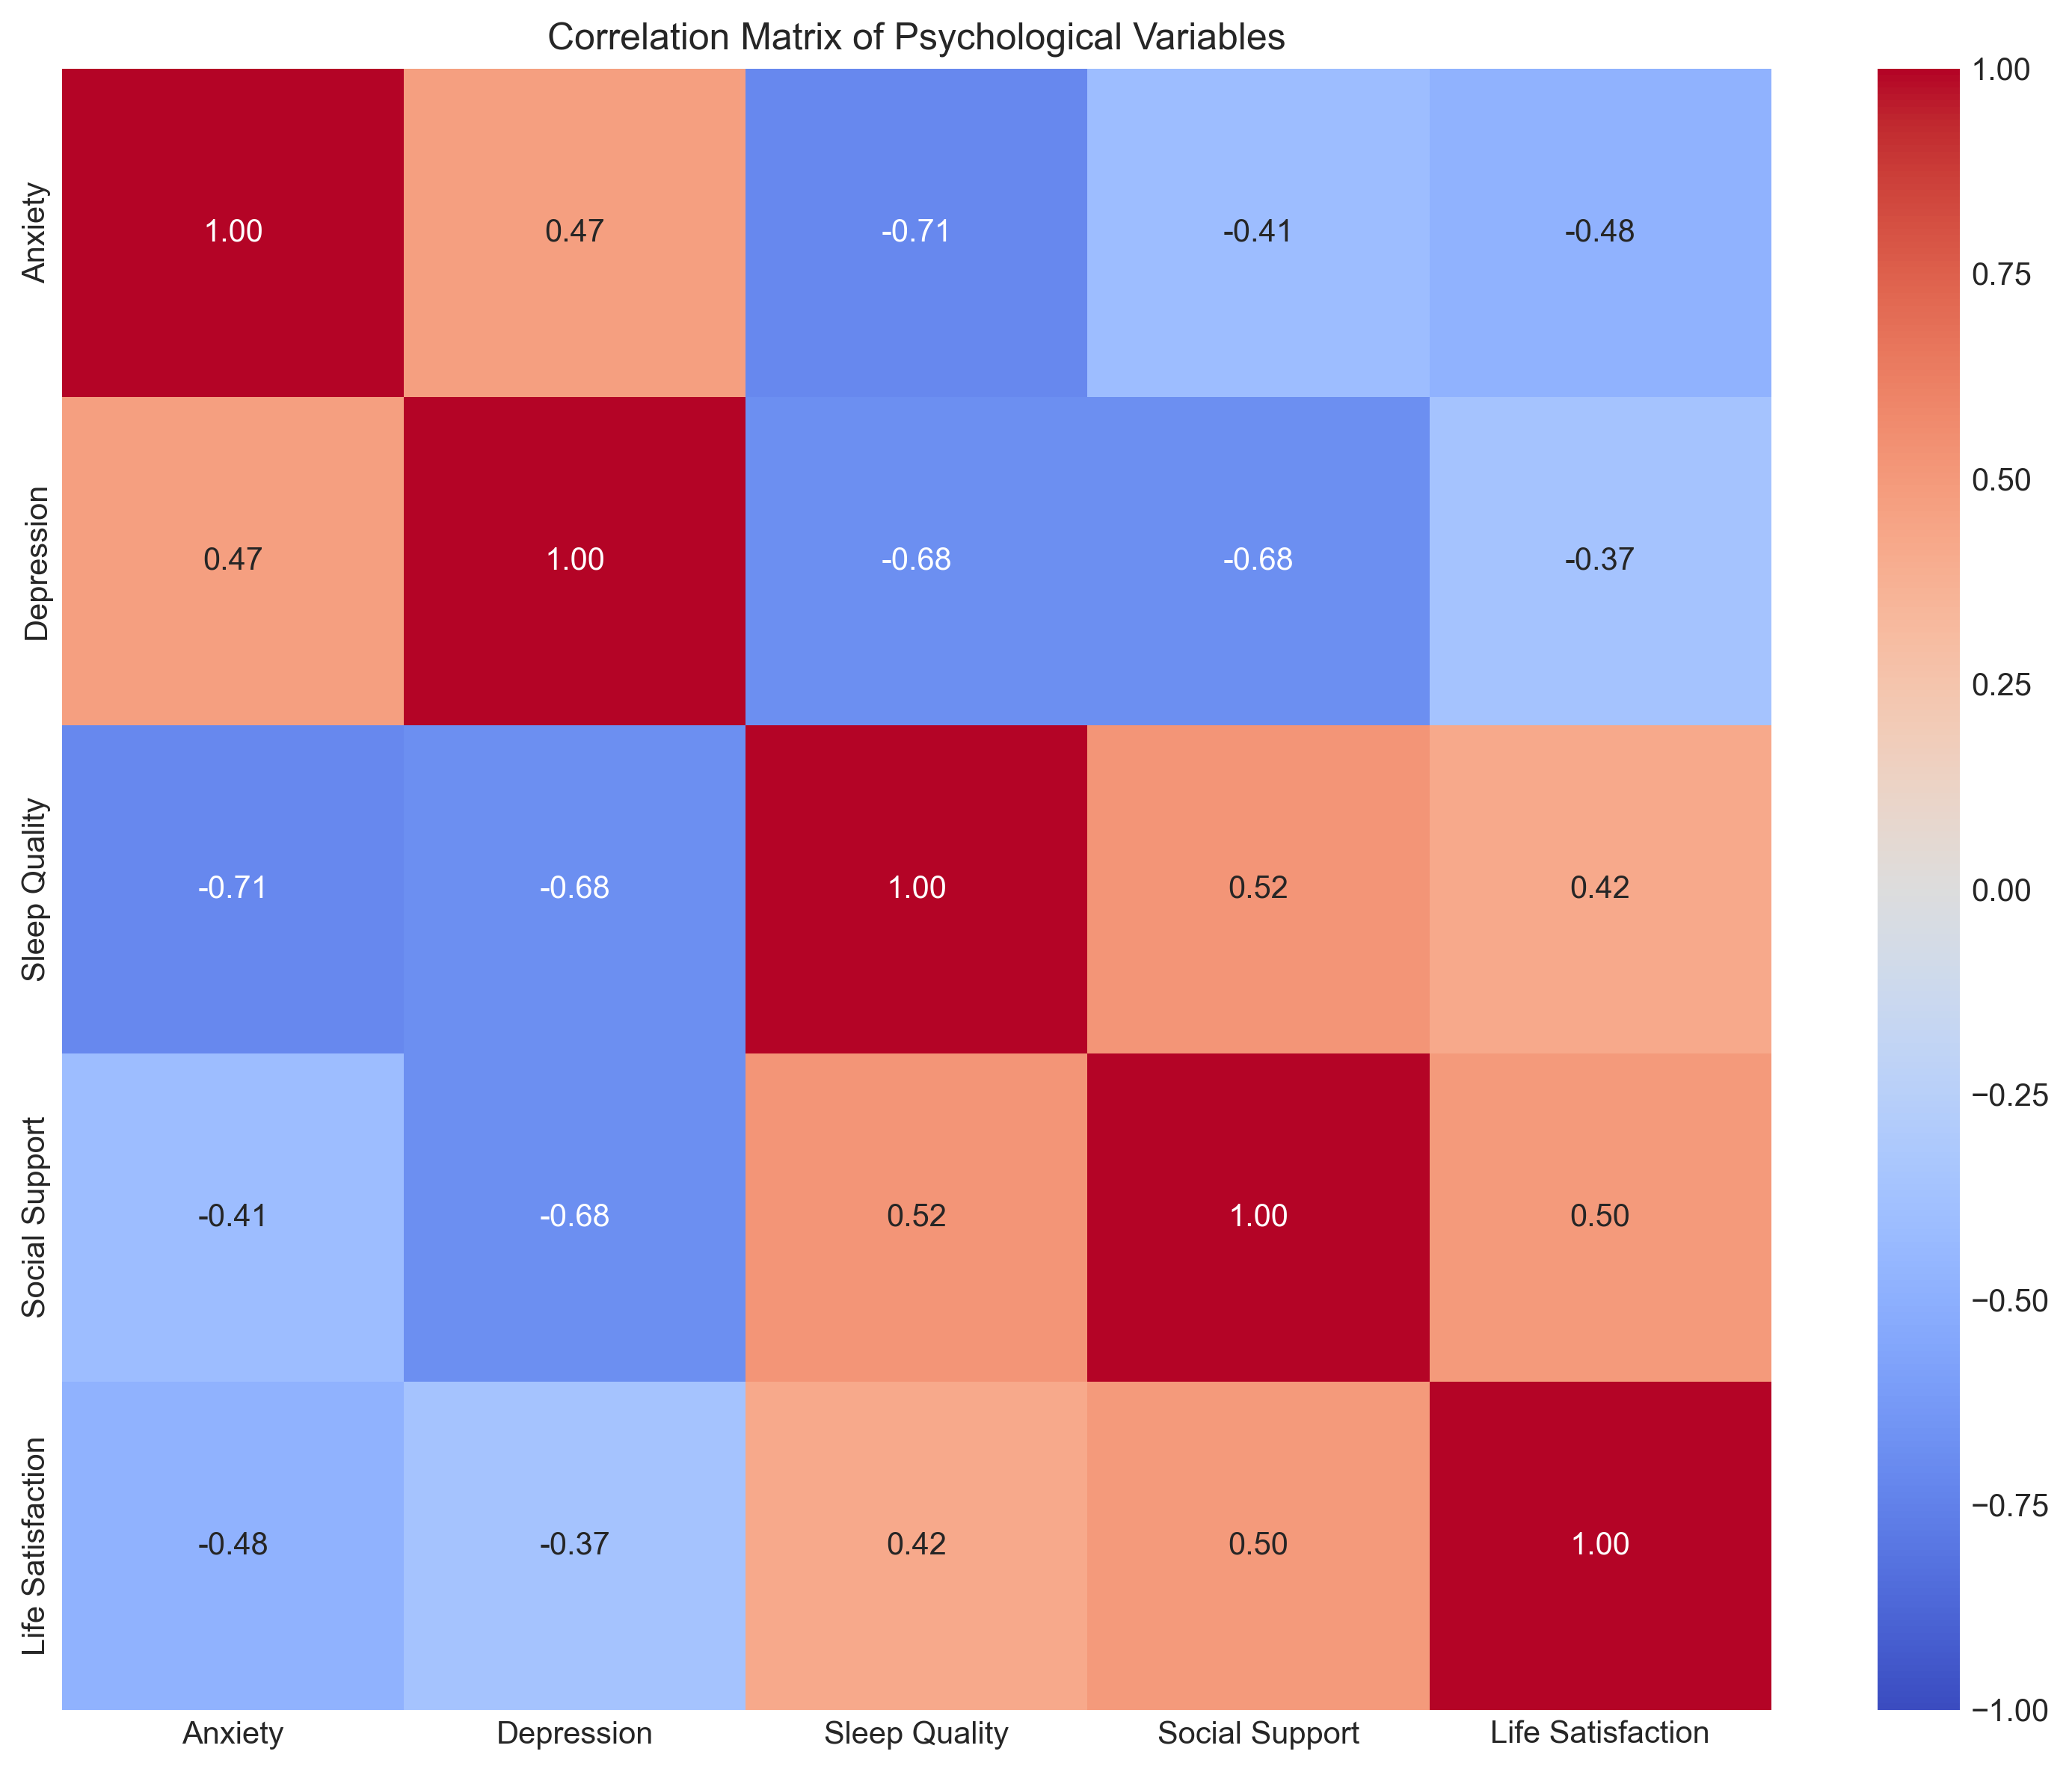

In [6]:
# Create a simulated psychological dataset
np.random.seed(42)
n = 100  # Number of participants

# Generate correlated variables
anxiety = np.random.normal(25, 5, n)  # Anxiety scores (mean=25, sd=5)
depression = 0.7 * anxiety + np.random.normal(20, 5, n)  # Moderately correlated with anxiety
sleep_quality = -0.5 * anxiety + -0.3 * depression + np.random.normal(7, 2, n)  # Negatively correlated with both
social_support = -0.4 * depression + np.random.normal(15, 3, n)  # Negatively correlated with depression
life_satisfaction = -0.3 * anxiety - 0.4 * depression + 0.5 * sleep_quality + 0.6 * social_support + np.random.normal(50, 10, n)

# Create a DataFrame
data = pd.DataFrame({
    'Anxiety': anxiety,
    'Depression': depression,
    'Sleep Quality': sleep_quality,
    'Social Support': social_support,
    'Life Satisfaction': life_satisfaction
})

# Calculate correlation matrix
corr_matrix = data.corr()
print("Correlation Matrix:")
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of Psychological Variables')
plt.tight_layout()
plt.show()

### 1.7 Limitations of Correlation

While correlation is a powerful tool, it has important limitations:

1. **Correlation does not imply causation**: A correlation between variables doesn't mean one causes the other. There might be:
   - A third variable causing both (confounding)
   - Reverse causality
   - Coincidental correlation

2. **Outliers can strongly influence Pearson's r**

3. **Restricted range can reduce correlation magnitude**

4. **Non-linear relationships may not be captured by Pearson's r**

Let's visualize some of these limitations:

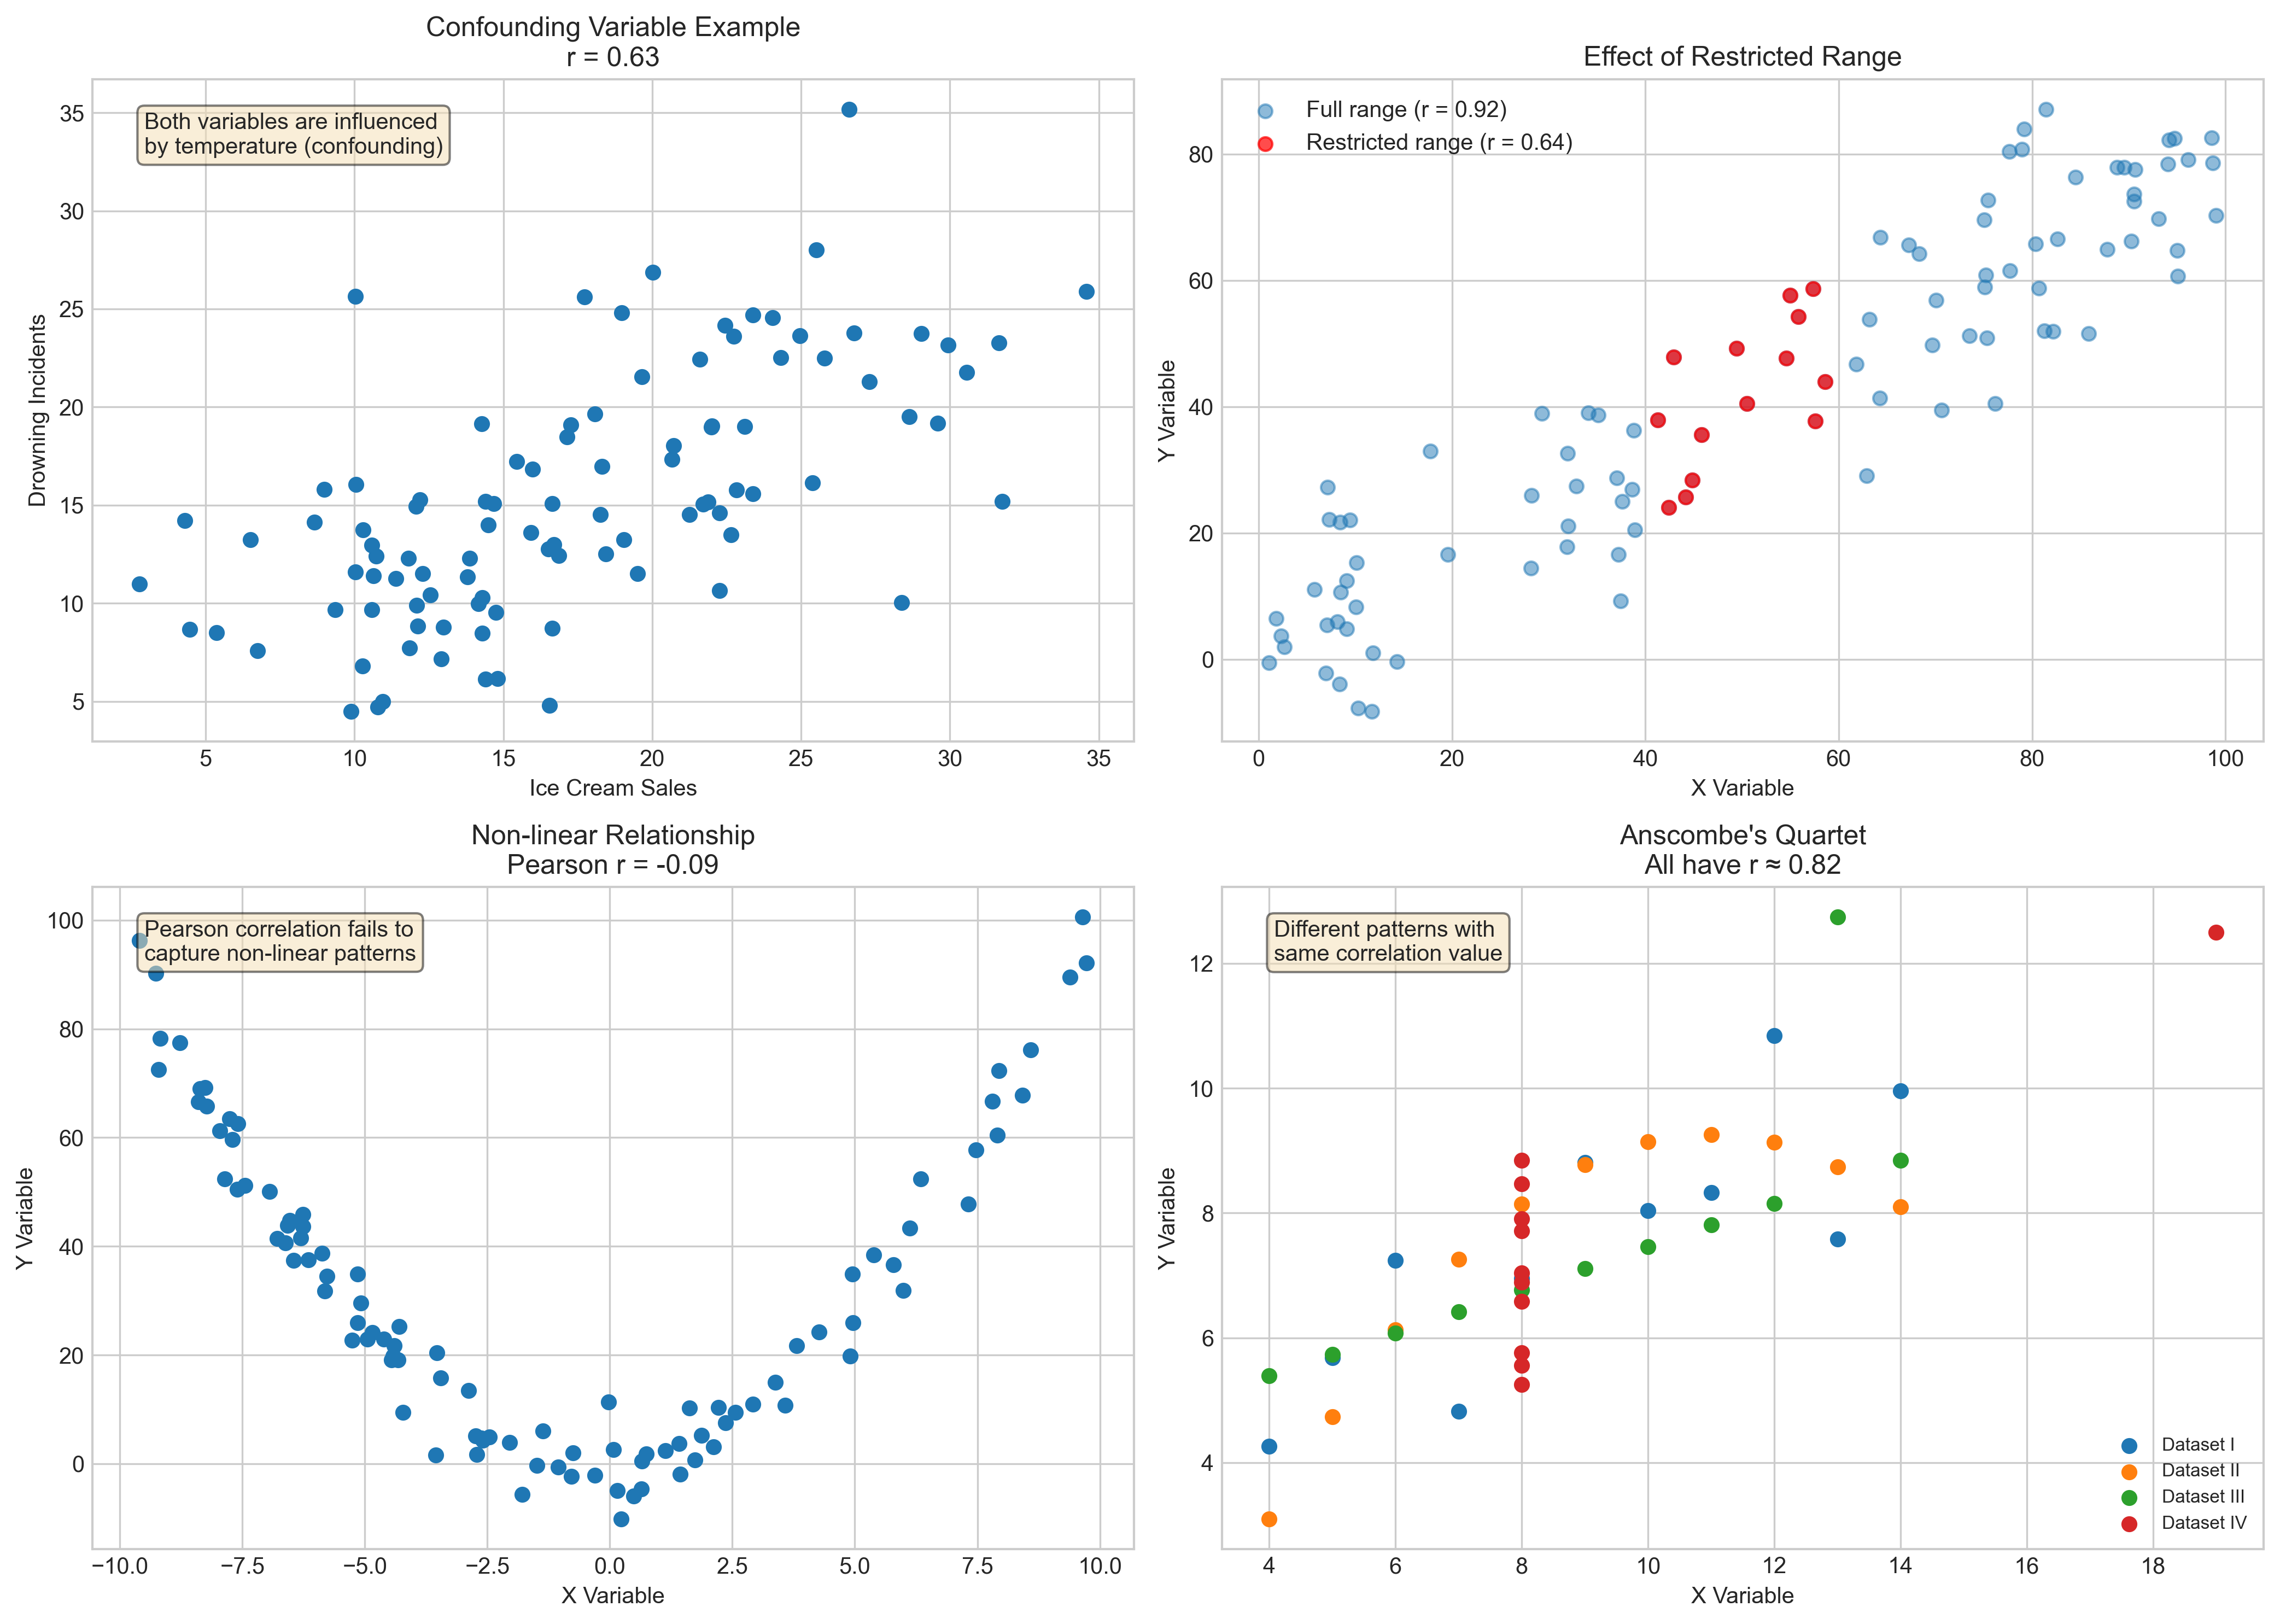

In [7]:
# Create examples of correlation limitations
np.random.seed(42)

# Example 1: Third variable (confounding)
# Both ice cream sales and drowning incidents increase with temperature
temperature = np.random.uniform(10, 35, 100)  # Temperature in Celsius
ice_cream_sales = 0.8 * temperature + np.random.normal(0, 5, 100)
drowning_incidents = 0.7 * temperature + np.random.normal(0, 3, 100)

# Example 2: Restricted range
full_range_x = np.random.uniform(0, 100, 100)
full_range_y = 0.8 * full_range_x + np.random.normal(0, 10, 100)
# Restricted range (only middle values)
restricted_mask = (full_range_x > 40) & (full_range_x < 60)
restricted_x = full_range_x[restricted_mask]
restricted_y = full_range_y[restricted_mask]

# Example 3: Non-linear relationship
x_nonlinear = np.random.uniform(-10, 10, 100)
y_nonlinear = x_nonlinear**2 + np.random.normal(0, 5, 100)

# Calculate correlations
r_confounding, _ = stats.pearsonr(ice_cream_sales, drowning_incidents)
r_full, _ = stats.pearsonr(full_range_x, full_range_y)
r_restricted, _ = stats.pearsonr(restricted_x, restricted_y)
r_nonlinear, _ = stats.pearsonr(x_nonlinear, y_nonlinear)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot confounding example
axs[0, 0].scatter(ice_cream_sales, drowning_incidents)
axs[0, 0].set_title(f'Confounding Variable Example\nr = {r_confounding:.2f}')
axs[0, 0].set_xlabel('Ice Cream Sales')
axs[0, 0].set_ylabel('Drowning Incidents')
axs[0, 0].text(0.05, 0.95, 'Both variables are influenced\nby temperature (confounding)', 
               transform=axs[0, 0].transAxes, fontsize=10, va='top', 
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Plot full range vs restricted range
axs[0, 1].scatter(full_range_x, full_range_y, alpha=0.5, label=f'Full range (r = {r_full:.2f})')
axs[0, 1].scatter(restricted_x, restricted_y, color='red', alpha=0.7, label=f'Restricted range (r = {r_restricted:.2f})')
axs[0, 1].set_title('Effect of Restricted Range')
axs[0, 1].set_xlabel('X Variable')
axs[0, 1].set_ylabel('Y Variable')
axs[0, 1].legend()

# Plot non-linear relationship
axs[1, 0].scatter(x_nonlinear, y_nonlinear)
axs[1, 0].set_title(f'Non-linear Relationship\nPearson r = {r_nonlinear:.2f}')
axs[1, 0].set_xlabel('X Variable')
axs[1, 0].set_ylabel('Y Variable')
axs[1, 0].text(0.05, 0.95, 'Pearson correlation fails to\ncapture non-linear patterns', 
               transform=axs[1, 0].transAxes, fontsize=10, va='top', 
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Anscombe's quartet example
# Create Anscombe's quartet data
anscombe = sns.load_dataset('anscombe')
# Get dataset I
dataset_1 = anscombe[anscombe['dataset'] == 'I']
# Get dataset II
dataset_2 = anscombe[anscombe['dataset'] == 'II']
# Get dataset III
dataset_3 = anscombe[anscombe['dataset'] == 'III']
# Get dataset IV
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

# Calculate correlations
r1, _ = stats.pearsonr(dataset_1['x'], dataset_1['y'])
r2, _ = stats.pearsonr(dataset_2['x'], dataset_2['y'])
r3, _ = stats.pearsonr(dataset_3['x'], dataset_3['y'])
r4, _ = stats.pearsonr(dataset_4['x'], dataset_4['y'])

# Plot one of Anscombe's quartet
axs[1, 1].scatter(dataset_1['x'], dataset_1['y'], label='Dataset I')
axs[1, 1].scatter(dataset_2['x'], dataset_2['y'], label='Dataset II')
axs[1, 1].scatter(dataset_3['x'], dataset_3['y'], label='Dataset III')
axs[1, 1].scatter(dataset_4['x'], dataset_4['y'], label='Dataset IV')
axs[1, 1].set_title("Anscombe's Quartet\nAll have r ≈ 0.82")
axs[1, 1].set_xlabel('X Variable')
axs[1, 1].set_ylabel('Y Variable')
axs[1, 1].legend(fontsize=8)
axs[1, 1].text(0.05, 0.95, 'Different patterns with\nsame correlation value', 
               transform=axs[1, 1].transAxes, fontsize=10, va='top', 
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

## 2. Linear Regression

While correlation measures the strength and direction of a relationship between variables, regression allows us to predict one variable from another. Linear regression is a fundamental statistical method that models the relationship between a dependent variable (outcome) and one or more independent variables (predictors).

### 2.1 Simple Linear Regression

Simple linear regression involves one independent variable (X) and one dependent variable (Y). The model can be expressed as:

$$Y = \beta_0 + \beta_1 X + \varepsilon$$

Where:
- $Y$ is the dependent variable (outcome)
- $X$ is the independent variable (predictor)
- $\beta_0$ is the y-intercept (value of Y when X = 0)
- $\beta_1$ is the slope (change in Y for a one-unit change in X)
- $\varepsilon$ is the error term (residual)

The goal of linear regression is to find the values of $\beta_0$ and $\beta_1$ that minimize the sum of squared residuals (the differences between observed and predicted values).

Let's implement simple linear regression using a psychological example:

Regression equation: Performance = 51.22 + 4.75 × Study Hours


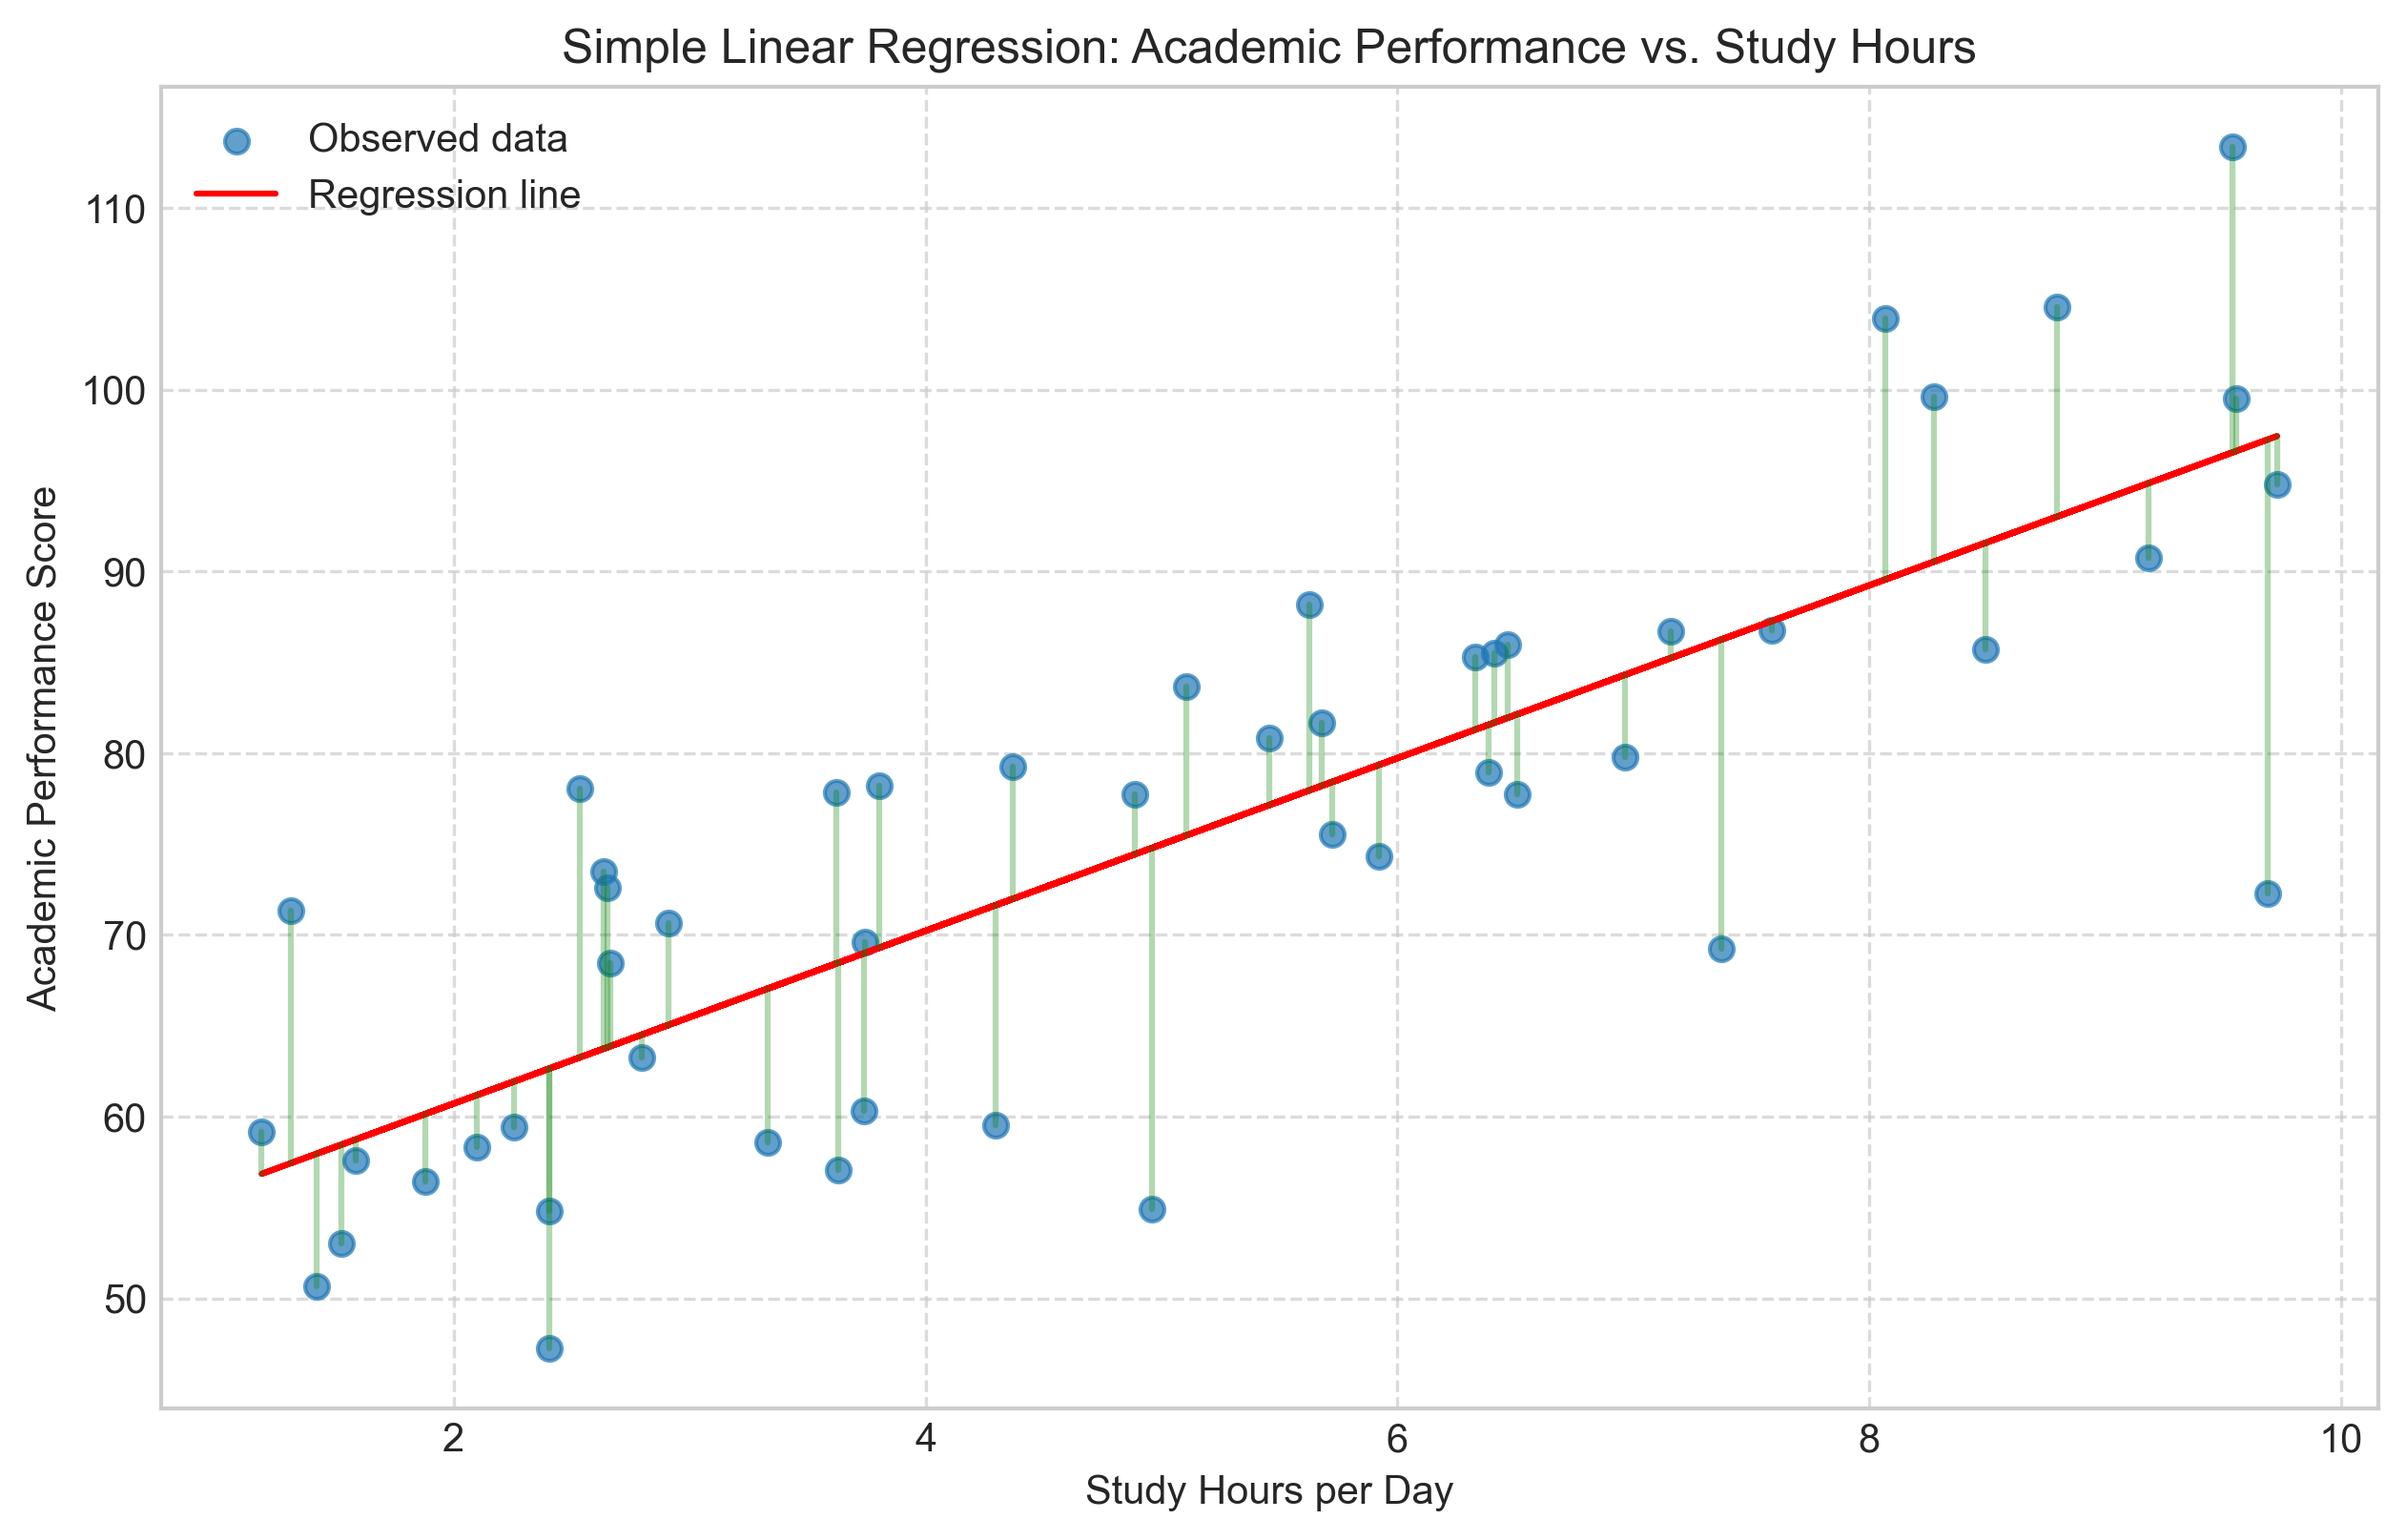

Slope (β₁): 4.7517
Intercept (β₀): 51.2152
Correlation coefficient (r): 0.8031
Coefficient of determination (R²): 0.6450
p-value: 0.0000
Standard error: 0.5088


In [8]:
# Example: Predicting academic performance from study hours
np.random.seed(42)
n = 50  # Number of students

# Generate data
study_hours = np.random.uniform(1, 10, n)  # Study hours per day
academic_performance = 50 + 5 * study_hours + np.random.normal(0, 10, n)  # Performance score (0-100)

# Fit simple linear regression model
slope, intercept = np.polyfit(study_hours, academic_performance, 1)

# Print the regression equation
print(f"Regression equation: Performance = {intercept:.2f} + {slope:.2f} × Study Hours")

# Calculate predicted values
predicted_performance = intercept + slope * study_hours

# Calculate residuals
residuals = academic_performance - predicted_performance

# Visualize the regression line
plt.figure(figsize=(10, 6))
plt.scatter(study_hours, academic_performance, alpha=0.7, label='Observed data')
plt.plot(study_hours, predicted_performance, color='red', label='Regression line')

# Add residual lines
for i in range(n):
    plt.plot([study_hours[i], study_hours[i]], 
             [academic_performance[i], predicted_performance[i]], 
             'g-', alpha=0.3)

plt.title('Simple Linear Regression: Academic Performance vs. Study Hours')
plt.xlabel('Study Hours per Day')
plt.ylabel('Academic Performance Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Using scipy.stats.linregress for more detailed statistics
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(study_hours, academic_performance)

print(f"Slope (β₁): {slope:.4f}")
print(f"Intercept (β₀): {intercept:.4f}")
print(f"Correlation coefficient (r): {r_value:.4f}")
print(f"Coefficient of determination (R²): {r_value**2:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Standard error: {std_err:.4f}")

### 2.2 Interpreting Regression Results

The key components to interpret in a simple linear regression are:

1. **Slope (β₁)**: Represents the change in Y for a one-unit increase in X. In our example, for each additional hour of studying, academic performance increases by approximately 5 points.

2. **Intercept (β₀)**: The predicted value of Y when X = 0. In our example, a student who doesn't study at all (0 hours) would be predicted to score about 50 points.

3. **Coefficient of determination (R²)**: The proportion of variance in the dependent variable that is predictable from the independent variable(s). R² ranges from 0 to 1, with higher values indicating better fit. It can be interpreted as the percentage of variation in Y explained by X.

4. **p-value**: Tests the null hypothesis that the slope is equal to zero (no effect). A small p-value (typically < 0.05) indicates that you can reject the null hypothesis.

5. **Standard error**: The average distance that the observed values fall from the regression line.

Let's visualize the residuals to check the assumptions of linear regression:

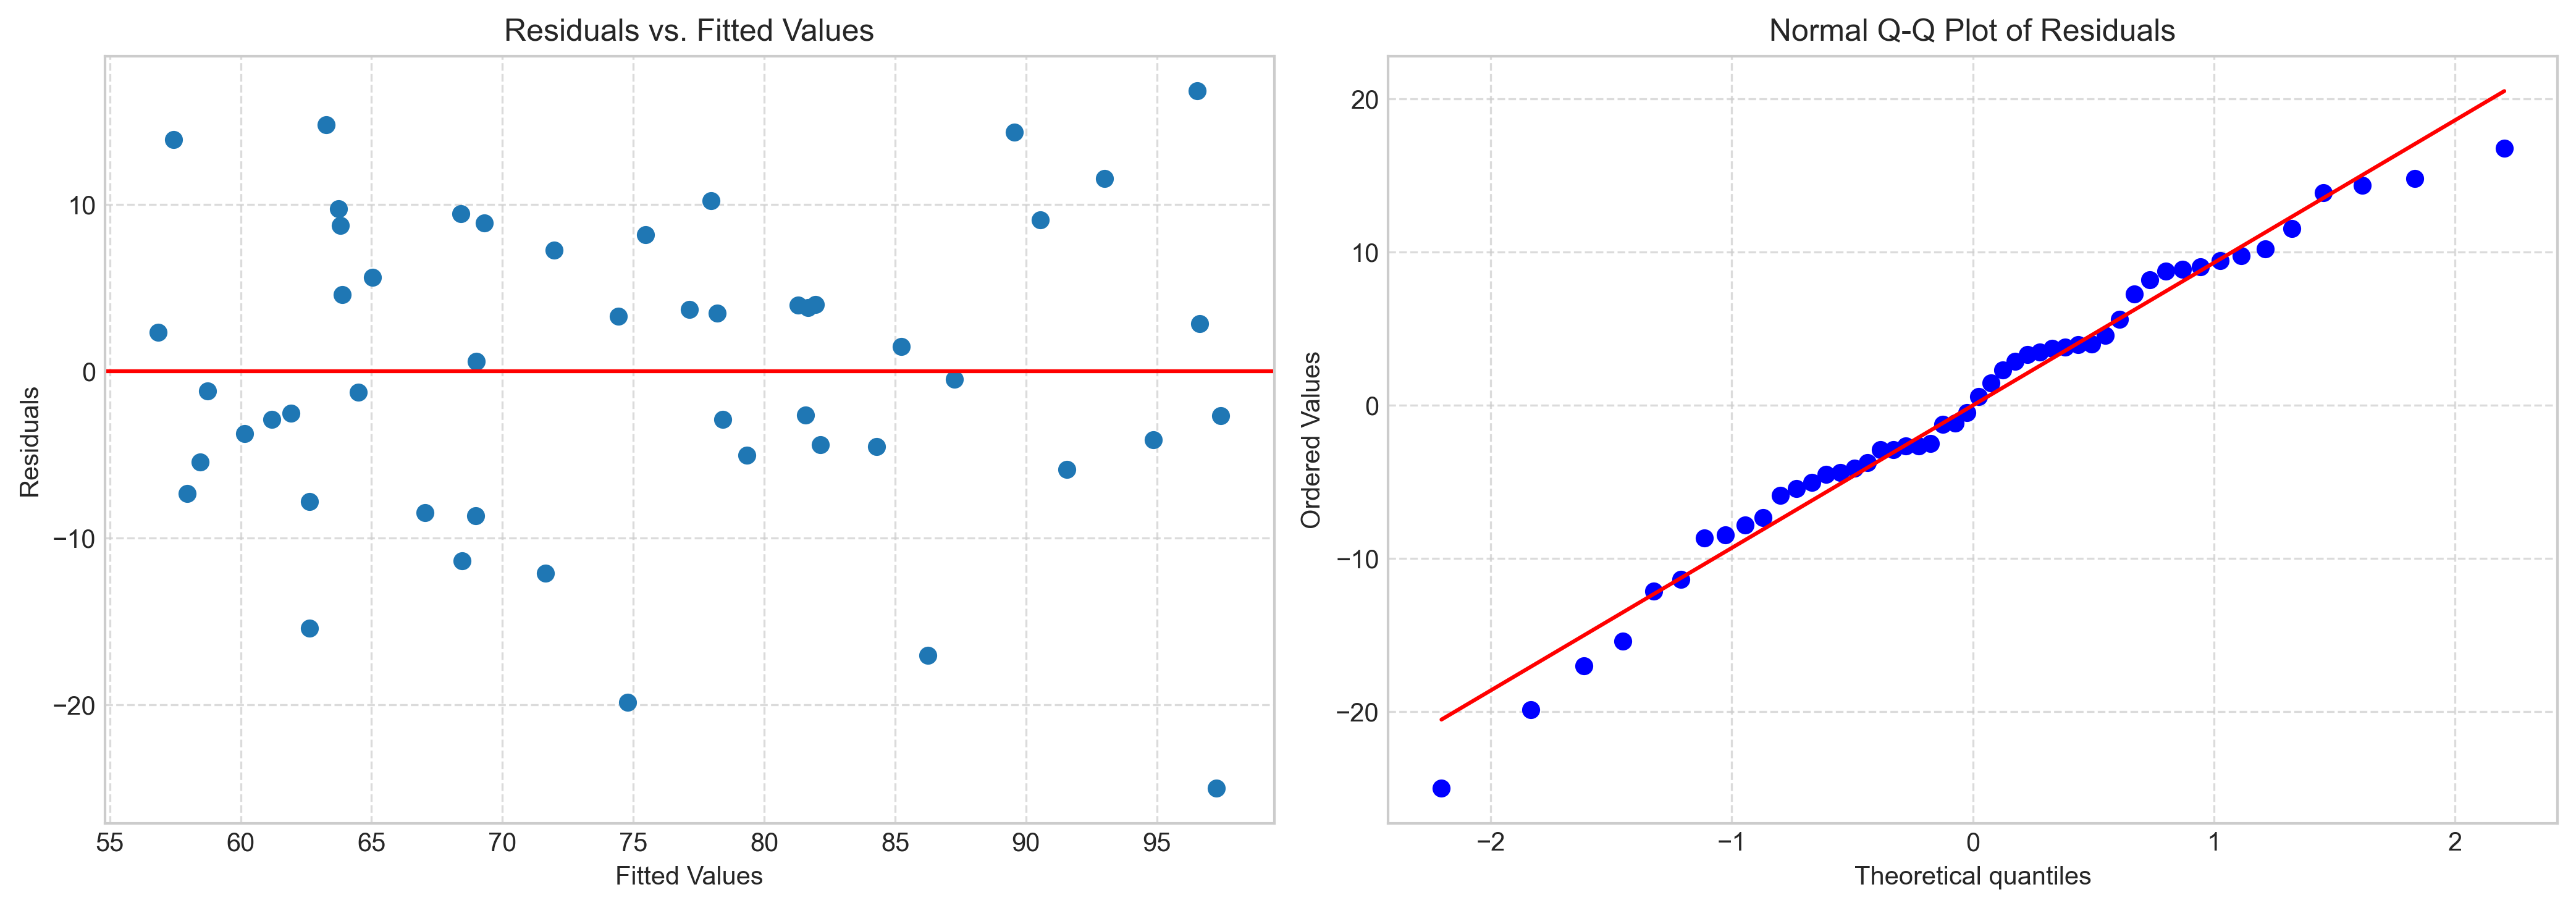

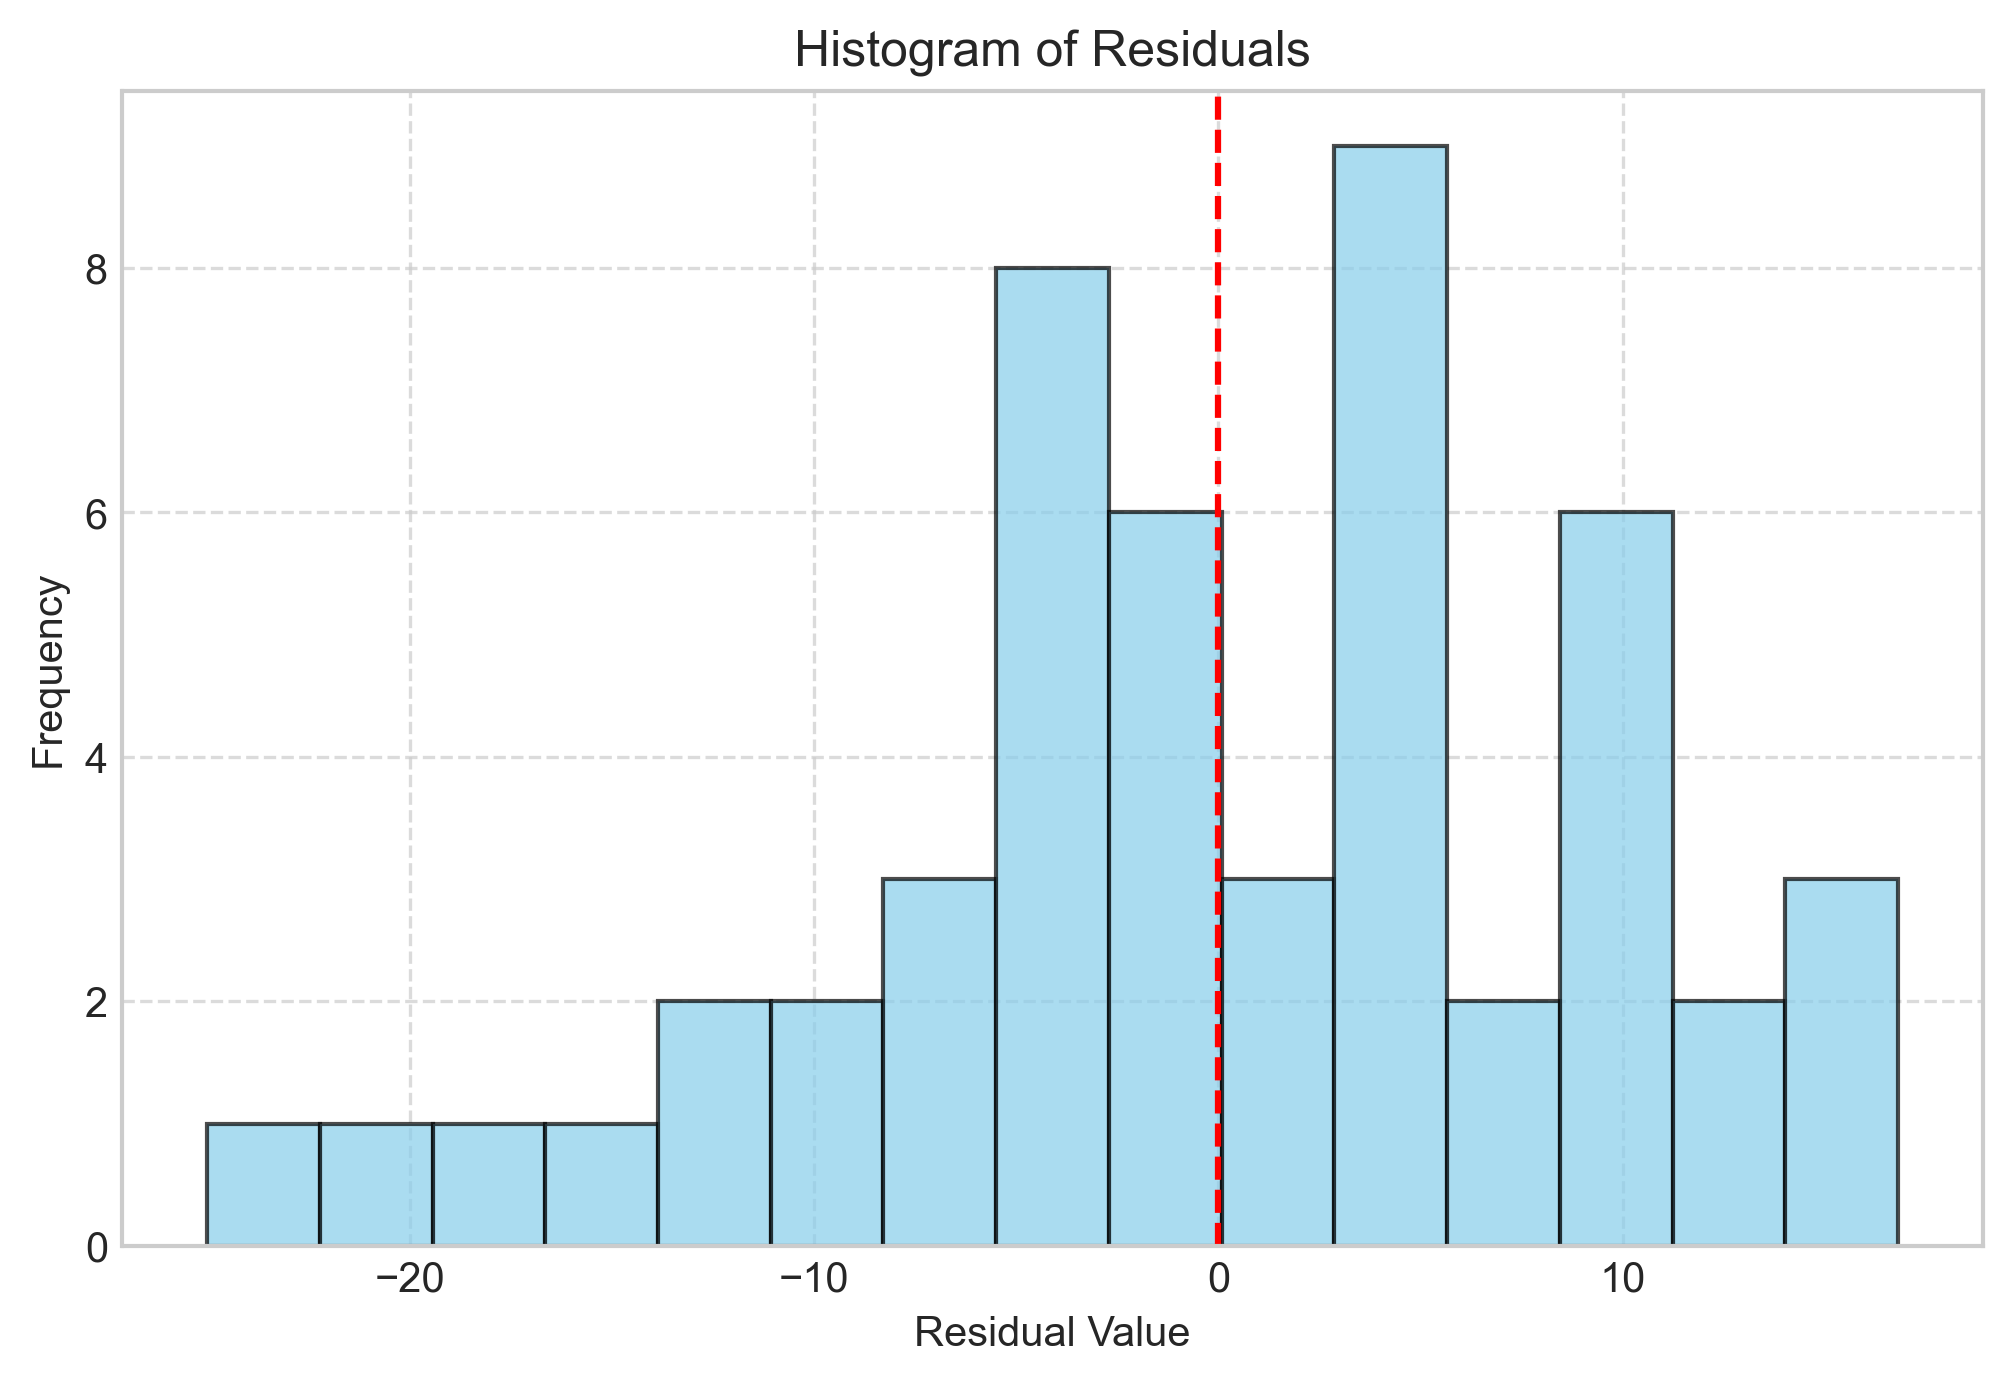

In [9]:
# Create residual plots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Residuals vs. Fitted values
axs[0].scatter(predicted_performance, residuals)
axs[0].axhline(y=0, color='r', linestyle='-')
axs[0].set_title('Residuals vs. Fitted Values')
axs[0].set_xlabel('Fitted Values')
axs[0].set_ylabel('Residuals')
axs[0].grid(True, linestyle='--', alpha=0.7)

# QQ plot for normality of residuals
from scipy import stats
stats.probplot(residuals, plot=axs[1])
axs[1].set_title('Normal Q-Q Plot of Residuals')
axs[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

### 2.3 Assumptions of Linear Regression

Linear regression relies on several key assumptions:

1. **Linearity**: The relationship between X and Y is linear.
2. **Independence**: Observations are independent of each other.
3. **Homoscedasticity**: The variance of residuals is constant across all levels of X.
4. **Normality**: The residuals are normally distributed.
5. **No multicollinearity**: Independent variables are not highly correlated (relevant for multiple regression).

Violations of these assumptions can lead to biased or inefficient estimates. The residual plots we created help assess these assumptions:

- **Residuals vs. Fitted Values**: Should show random scatter around zero with no pattern (checks linearity and homoscedasticity).
- **Q-Q Plot**: Points should follow the diagonal line (checks normality).
- **Histogram of Residuals**: Should be approximately bell-shaped (checks normality).

### 2.4 Making Predictions

One of the main purposes of regression is to make predictions. Let's use our model to predict academic performance for different study hours:

Predictions for new study hour values:
   Study Hours  Predicted Performance
0            2              60.718633
1            4              70.222113
2            6              79.725593
3            8              89.229073
4           10              98.732553


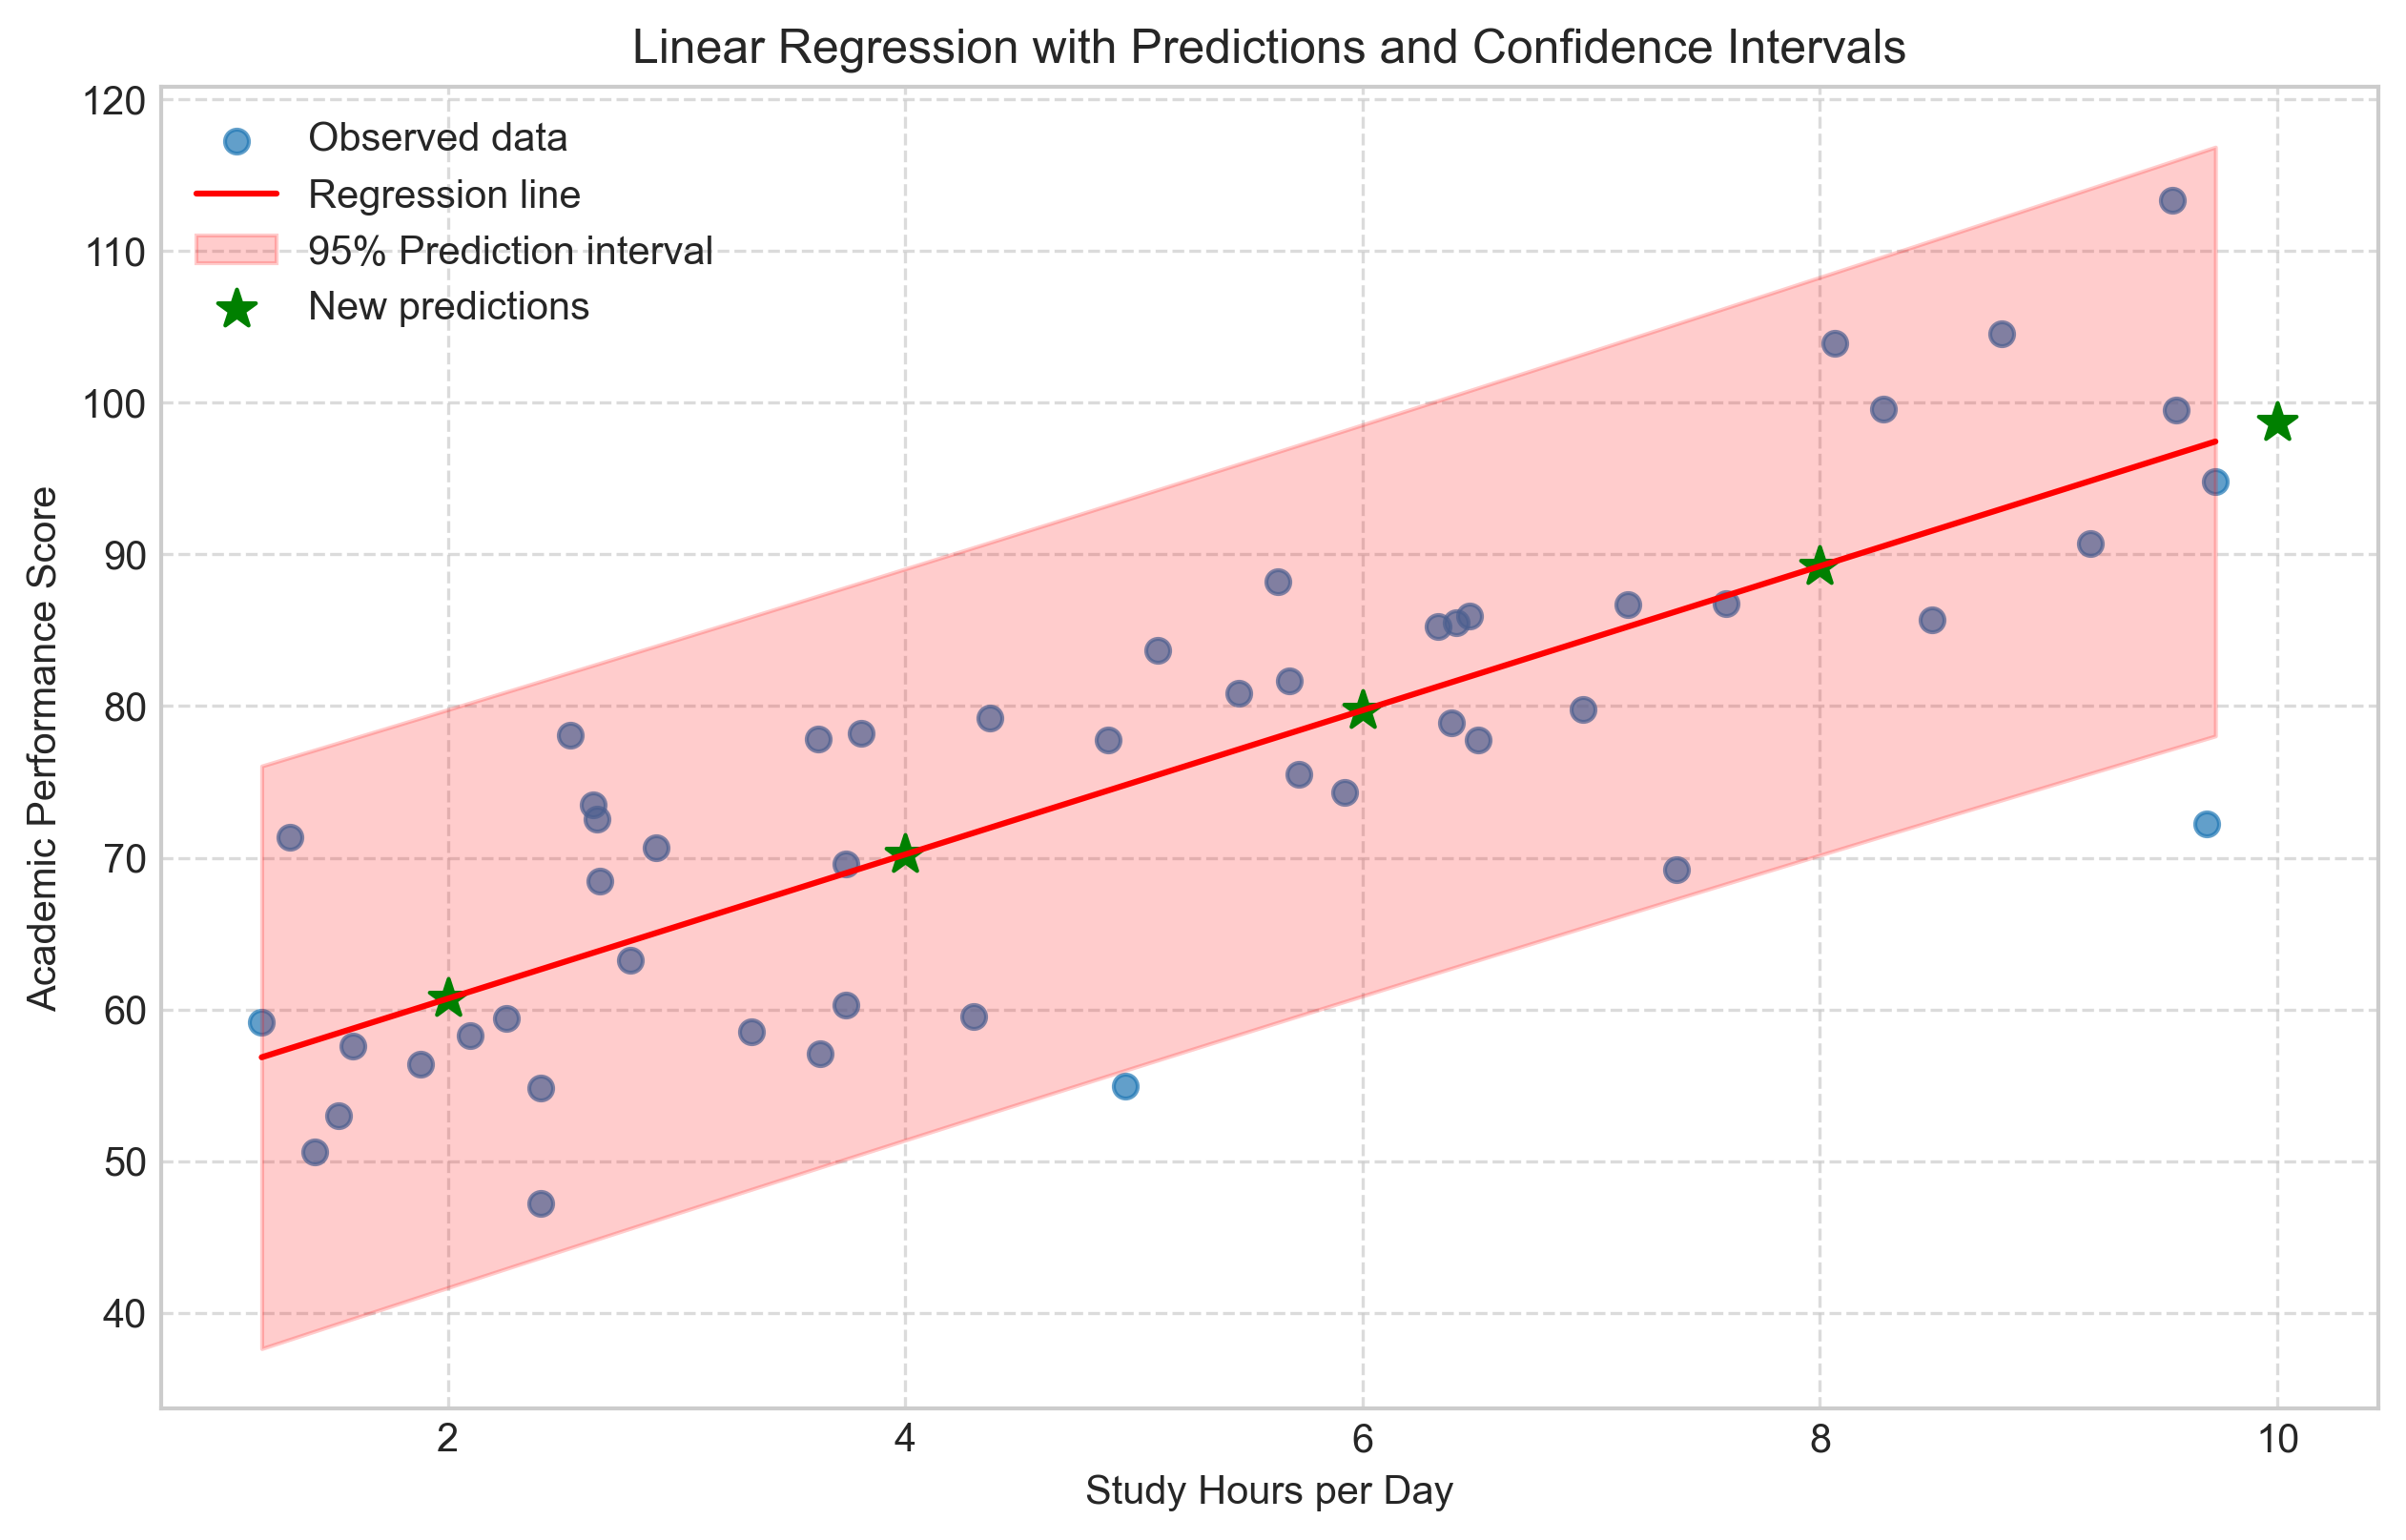

In [10]:
# Function to predict academic performance
def predict_performance(hours):
    return intercept + slope * hours

# Create a range of study hours for prediction
new_hours = np.array([2, 4, 6, 8, 10])
predicted_scores = predict_performance(new_hours)

# Create a DataFrame for easy viewing
prediction_df = pd.DataFrame({
    'Study Hours': new_hours,
    'Predicted Performance': predicted_scores
})

print("Predictions for new study hour values:")
print(prediction_df)

# Visualize predictions with confidence intervals
# Generate prediction interval
from scipy import stats

# Create a sequence of x values for the plot
x_seq = np.linspace(min(study_hours), max(study_hours), 100)

# Calculate the mean predicted y values
y_pred = intercept + slope * x_seq

# Calculate prediction intervals
# This is a simplified approach - for more accurate intervals, use statsmodels
n = len(study_hours)
mse = np.sum(residuals**2) / (n - 2)  # Mean squared error
std_error = np.sqrt(mse * (1 + 1/n + (x_seq - np.mean(study_hours))**2 / np.sum((study_hours - np.mean(study_hours))**2)))
t_critical = stats.t.ppf(0.975, n - 2)  # 95% confidence

# Calculate confidence intervals
y_upper = y_pred + t_critical * std_error
y_lower = y_pred - t_critical * std_error

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(study_hours, academic_performance, alpha=0.7, label='Observed data')
plt.plot(x_seq, y_pred, 'r-', label='Regression line')
plt.fill_between(x_seq, y_lower, y_upper, color='red', alpha=0.2, label='95% Prediction interval')

# Add the new predictions
plt.scatter(new_hours, predicted_scores, color='green', s=100, marker='*', label='New predictions')

plt.title('Linear Regression with Predictions and Confidence Intervals')
plt.xlabel('Study Hours per Day')
plt.ylabel('Academic Performance Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

## 3. Multiple Regression

Multiple regression extends simple linear regression by including multiple independent variables to predict a dependent variable. The model can be expressed as:

$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \varepsilon$$

Where:
- $Y$ is the dependent variable
- $X_1, X_2, ..., X_p$ are the independent variables
- $\beta_0, \beta_1, \beta_2, ..., \beta_p$ are the regression coefficients
- $\varepsilon$ is the error term

### 3.1 Implementing Multiple Regression

Let's implement multiple regression using a psychological example where we predict life satisfaction based on multiple factors:

In [11]:
# Example: Predicting life satisfaction from multiple variables
np.random.seed(42)
n = 100  # Number of participants

# Generate predictor variables
income = np.random.normal(50000, 15000, n)  # Annual income
social_support = np.random.normal(7, 2, n)  # Social support score (1-10)
health = np.random.normal(8, 1.5, n)  # Health score (1-10)
work_hours = np.random.normal(40, 10, n)  # Weekly work hours

# Generate life satisfaction with specific relationships to predictors
life_satisfaction = (
    50 +  # Baseline
    0.0003 * income +  # Positive effect of income
    2 * social_support +  # Strong positive effect of social support
    1.5 * health +  # Positive effect of health
    -0.1 * work_hours +  # Small negative effect of work hours
    np.random.normal(0, 5, n)  # Random noise
)

# Create a DataFrame
data = pd.DataFrame({
    'Income': income,
    'Social_Support': social_support,
    'Health': health,
    'Work_Hours': work_hours,
    'Life_Satisfaction': life_satisfaction
})

# Display the first few rows
print("Dataset Preview:")
print(data.head())

# Calculate correlation matrix
correlation_matrix = data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix['Life_Satisfaction'].sort_values(ascending=False))

# Fit multiple regression model using statsmodels
import statsmodels.api as sm

# Add constant (intercept)
X = sm.add_constant(data[['Income', 'Social_Support', 'Health', 'Work_Hours']])
y = data['Life_Satisfaction']

# Fit the model
model = sm.OLS(y, X).fit()

# Print summary
print("\nRegression Results:")
print(model.summary())

Dataset Preview:
         Income  Social_Support    Health  Work_Hours  Life_Satisfaction
0  57450.712295        4.169259  8.536681   31.710050          77.235609
1  47926.035482        6.158709  8.841177   34.398190          83.520300
2  59715.328072        6.314571  9.624577   47.472936          90.259531
3  72845.447846        5.395445  9.580703   46.103703          92.640113
4  46487.699379        6.677429  5.933496   39.790984          79.971985

Correlation Matrix:
Life_Satisfaction    1.000000
Social_Support       0.526615
Income               0.433797
Health               0.315596
Work_Hours          -0.063733
Name: Life_Satisfaction, dtype: float64

Regression Results:
                            OLS Regression Results                            
Dep. Variable:      Life_Satisfaction   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     35.

### 3.2 Interpreting Multiple Regression Results

The summary output provides several important pieces of information:

1. **Coefficients**: The estimated effect of each predictor on the dependent variable, holding all other predictors constant.

2. **Standard Errors**: The precision of the coefficient estimates.

3. **t-values and p-values**: Test whether each coefficient is significantly different from zero.

4. **R-squared**: The proportion of variance in the dependent variable explained by all predictors together.

5. **Adjusted R-squared**: R-squared adjusted for the number of predictors (prevents artificial inflation with more predictors).

6. **F-statistic**: Tests whether the model as a whole is statistically significant.

Let's visualize the contribution of each predictor:

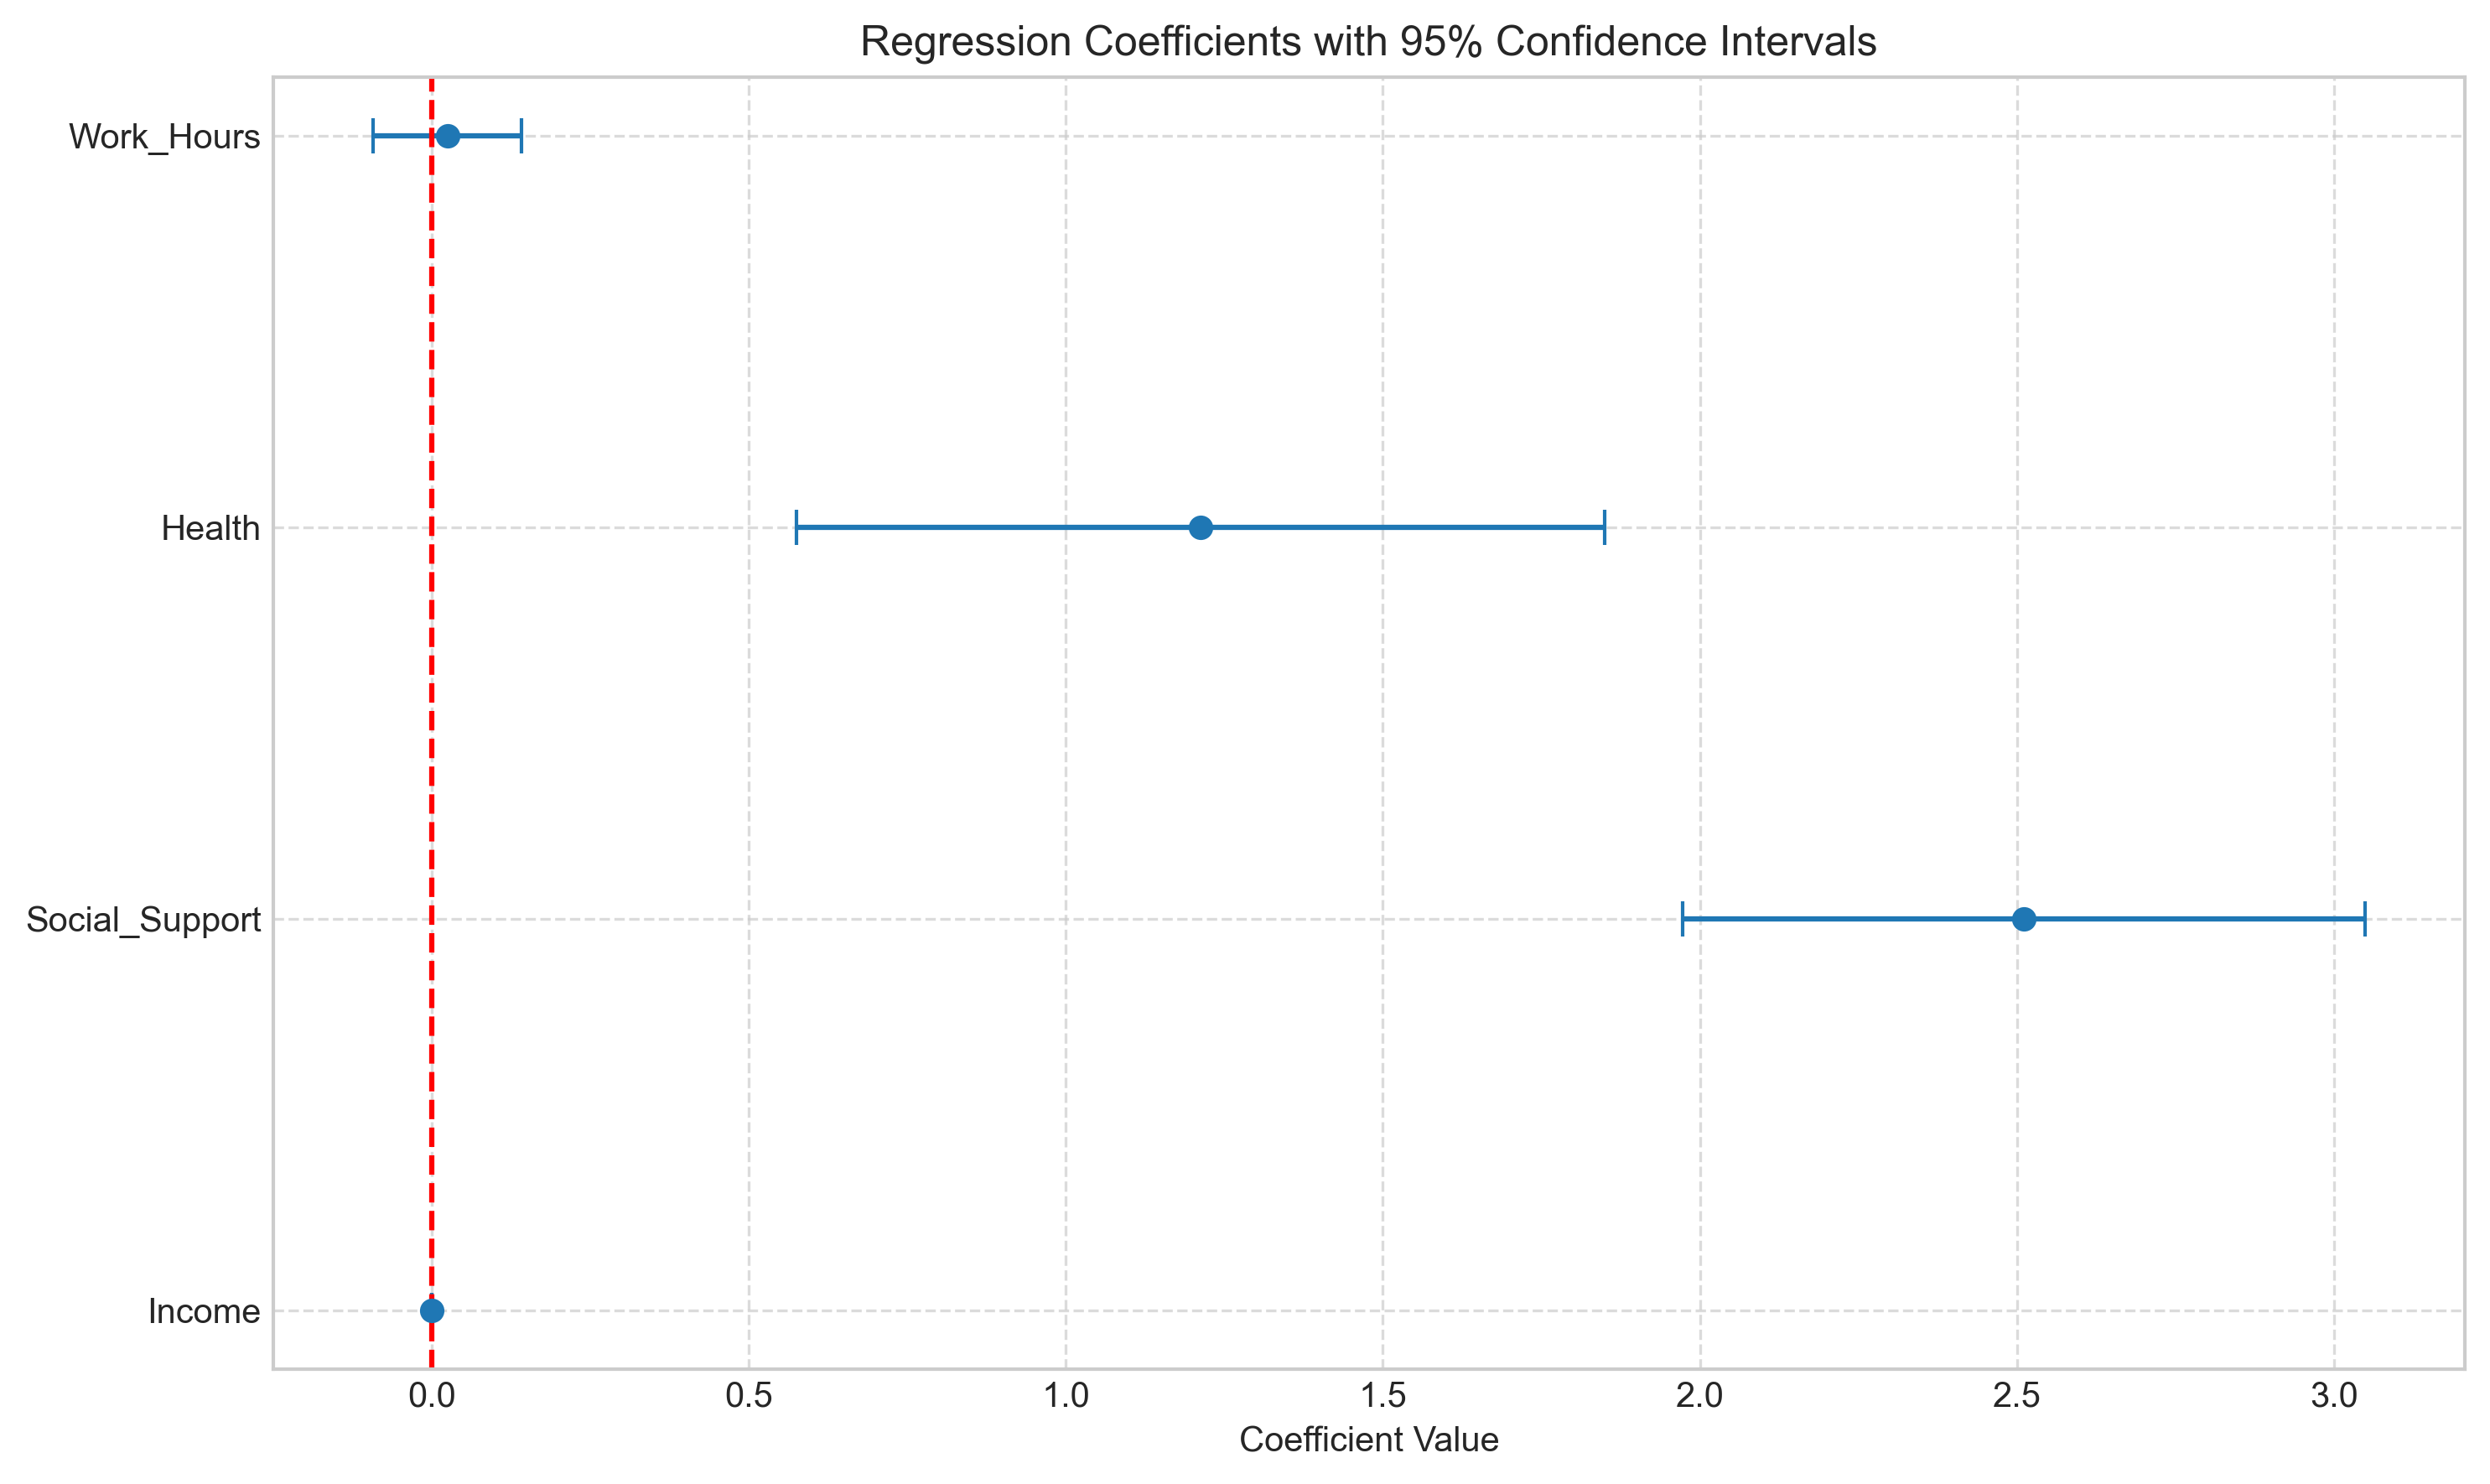

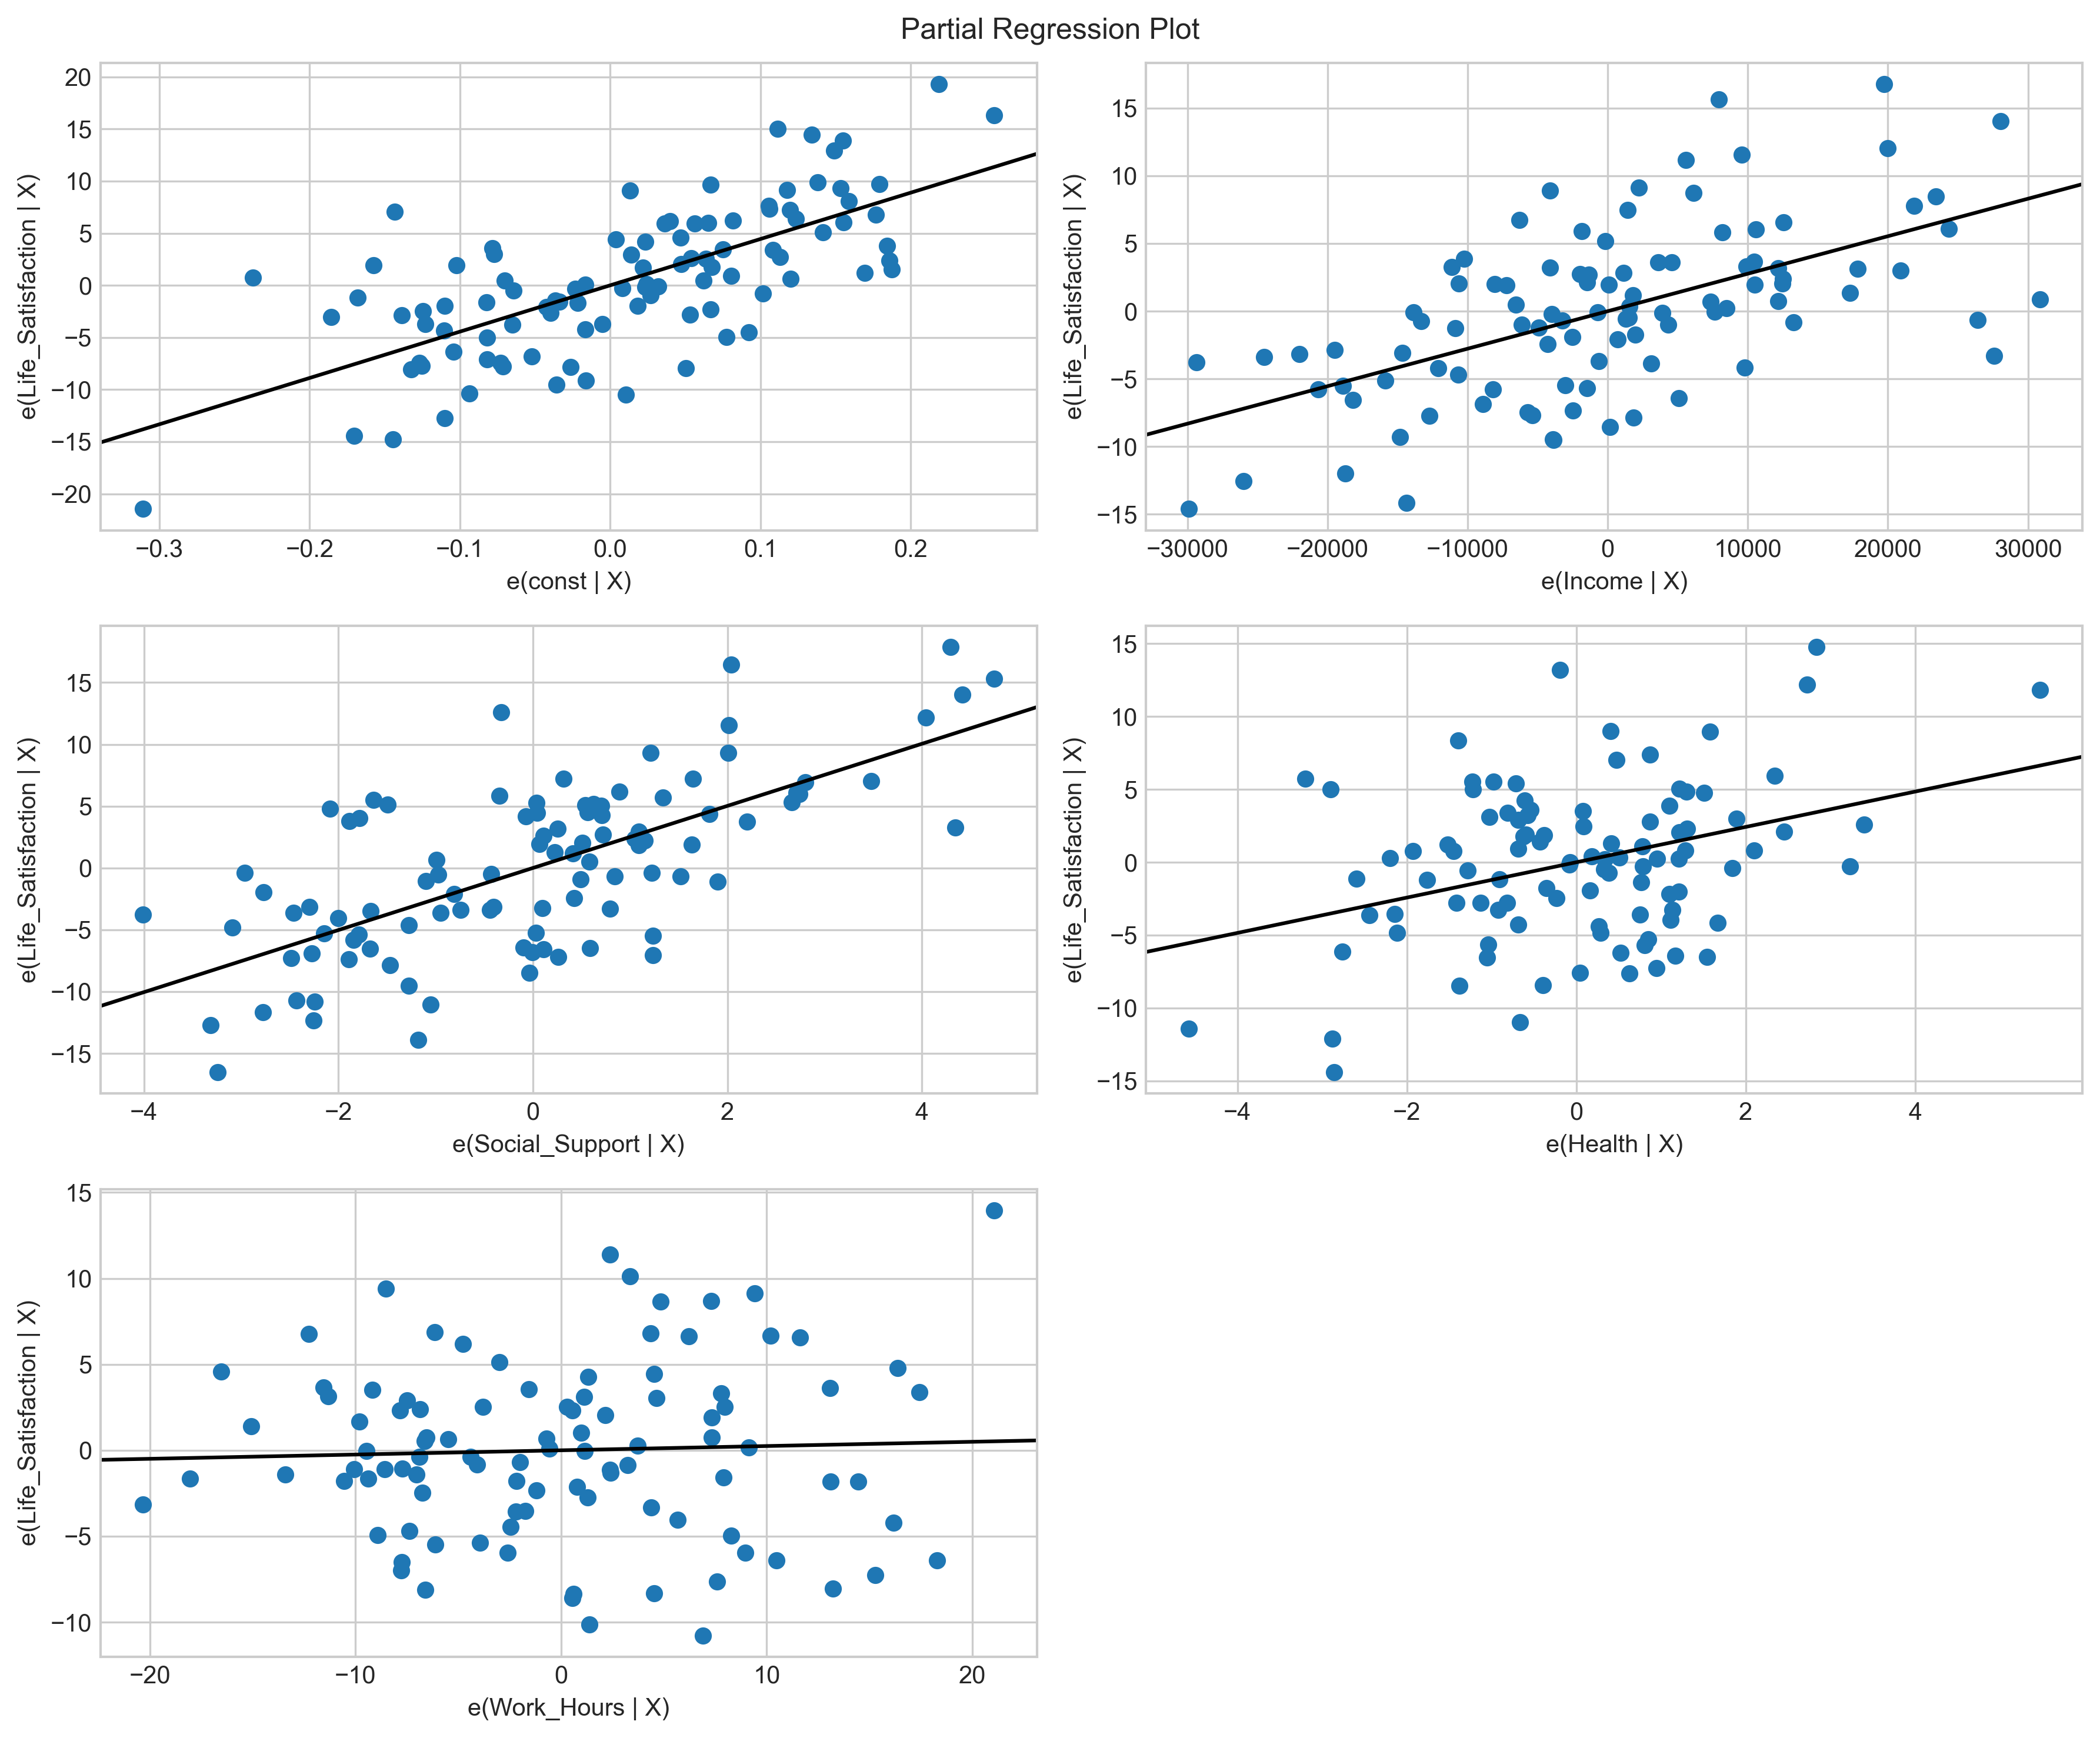

In [12]:
# Extract coefficients and create a coefficient plot
coefs = model.params[1:]  # Skip the intercept
std_errors = model.bse[1:]
var_names = X.columns[1:]

# Create a coefficient plot
plt.figure(figsize=(10, 6))
plt.errorbar(coefs, range(len(coefs)), xerr=1.96*std_errors, fmt='o', capsize=5)
plt.axvline(x=0, color='red', linestyle='--')
plt.yticks(range(len(var_names)), var_names)
plt.title('Regression Coefficients with 95% Confidence Intervals')
plt.xlabel('Coefficient Value')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Create partial regression plots
fig = plt.figure(figsize=(12, 10))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.tight_layout()
plt.show()

### 3.3 Standardized Coefficients

When predictors have different scales (like income vs. health scores), it's difficult to compare their relative importance. Standardized coefficients (beta weights) address this by showing the effect in standard deviation units.

Let's calculate and compare standardized coefficients:

Comparison of Unstandardized and Standardized Coefficients:
                Unstandardized  Standardized
Income                0.000277      3.772443
Social_Support        2.510690      4.788733
Health                1.212093      1.971378
Work_Hours            0.024767      0.218968


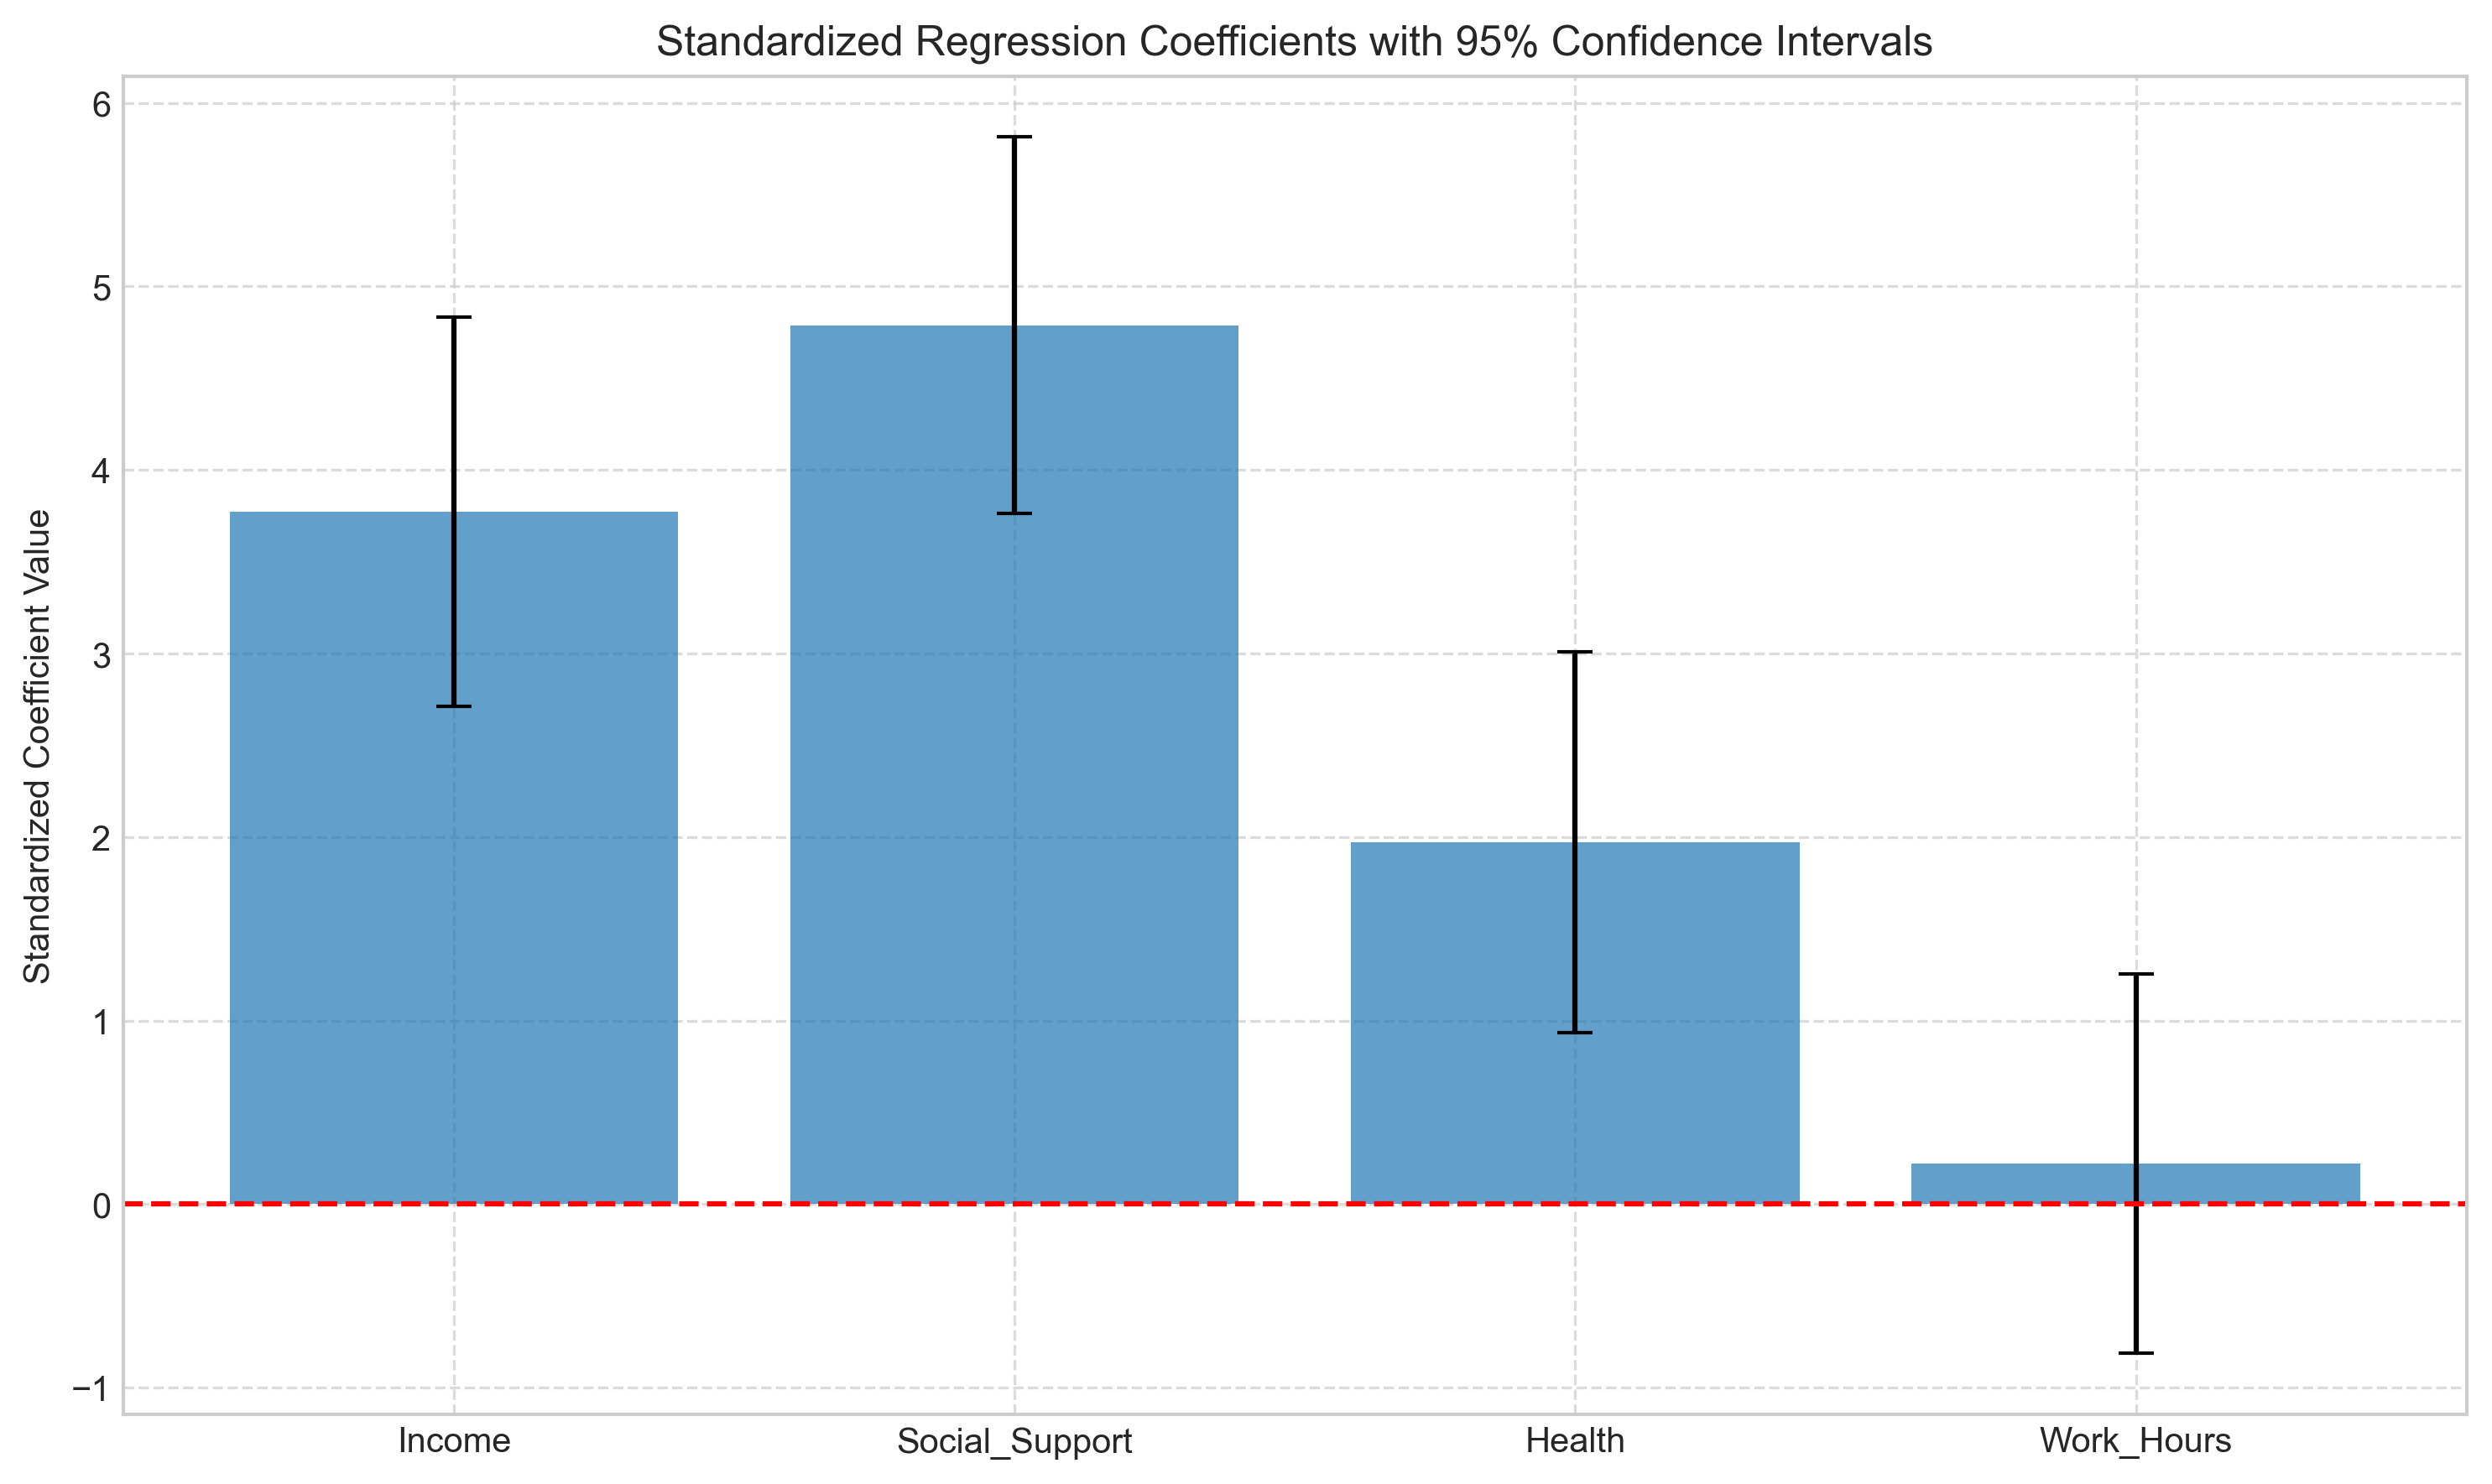

In [13]:
# Calculate standardized coefficients
def standardize(x):
    return (x - x.mean()) / x.std()

# Standardize predictors
X_std = sm.add_constant(data[['Income', 'Social_Support', 'Health', 'Work_Hours']].apply(standardize))

# Fit model with standardized predictors
model_std = sm.OLS(y, X_std).fit()

# Create a DataFrame to compare coefficients
coef_comparison = pd.DataFrame({
    'Unstandardized': model.params[1:],
    'Standardized': model_std.params[1:]
})

print("Comparison of Unstandardized and Standardized Coefficients:")
print(coef_comparison)

# Visualize standardized coefficients
plt.figure(figsize=(10, 6))
plt.bar(X_std.columns[1:], model_std.params[1:], yerr=1.96*model_std.bse[1:], capsize=5, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Standardized Regression Coefficients with 95% Confidence Intervals')
plt.ylabel('Standardized Coefficient Value')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 3.4 Model Diagnostics

As with simple regression, we need to check the assumptions of multiple regression. Let's examine residual plots and other diagnostics:

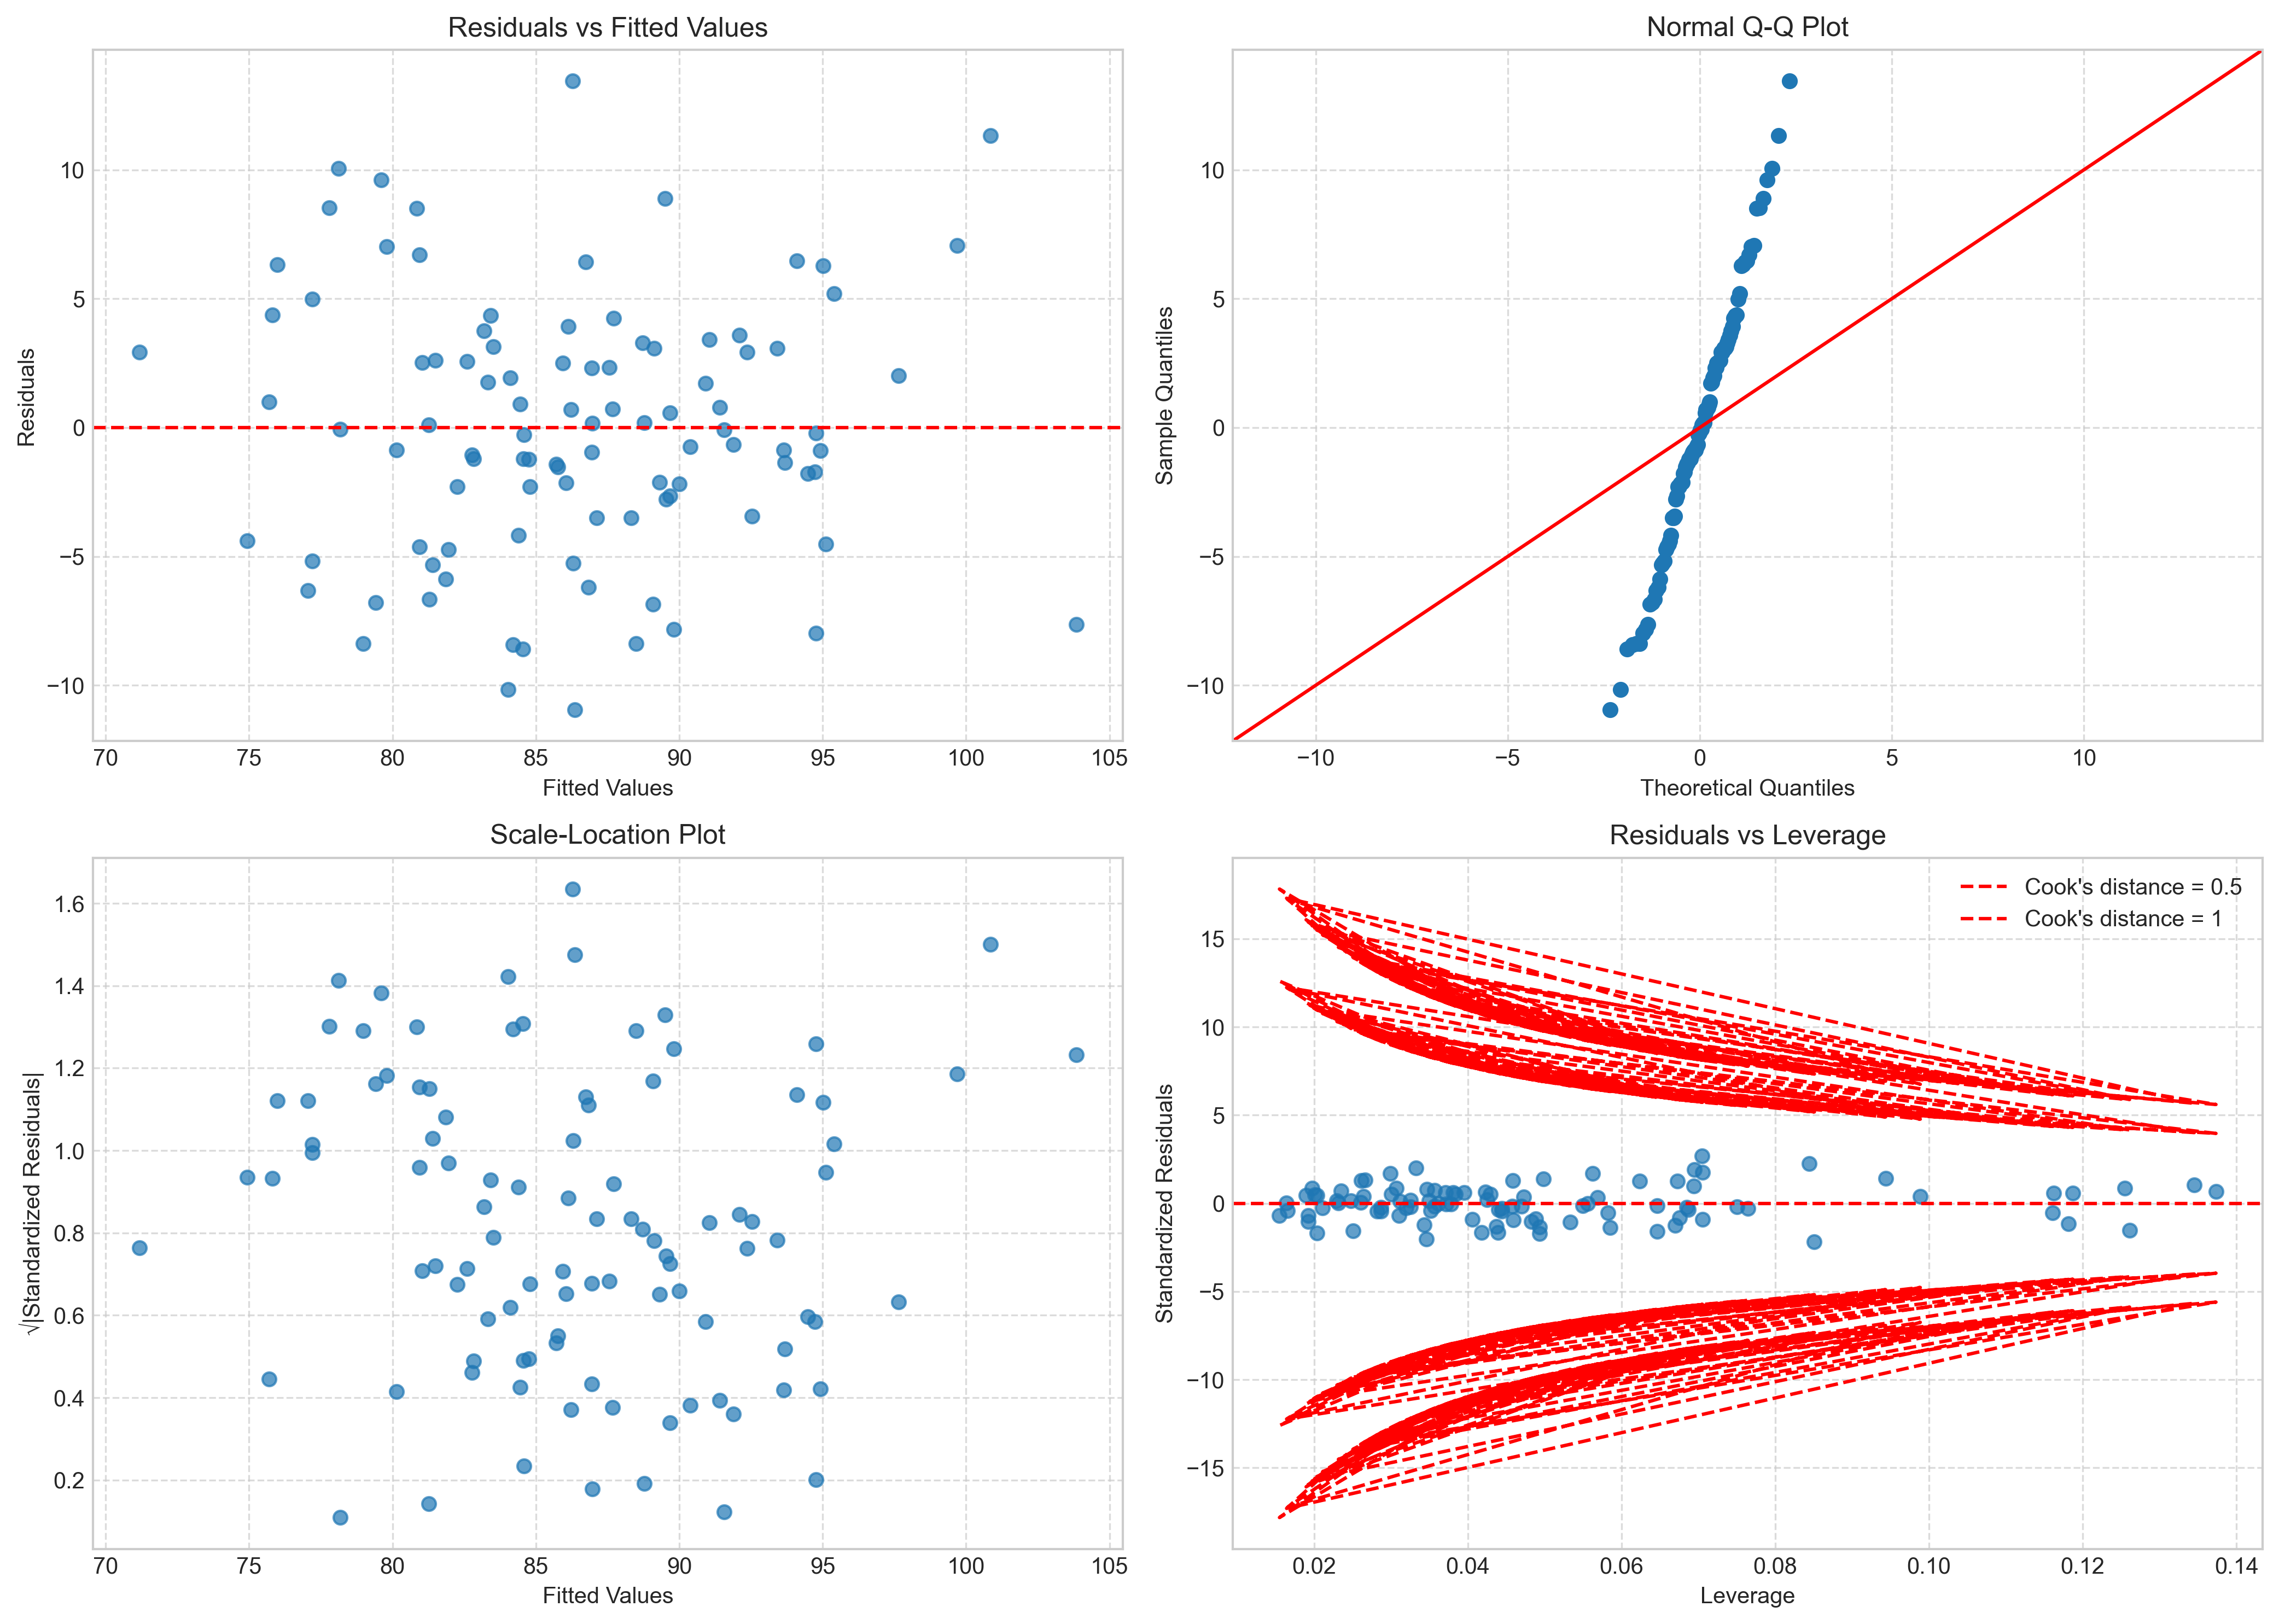

In [14]:
# Get residuals and fitted values
residuals = model.resid
fitted_values = model.fittedvalues

# Create diagnostic plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Residuals vs Fitted
axs[0, 0].scatter(fitted_values, residuals, alpha=0.7)
axs[0, 0].axhline(y=0, color='red', linestyle='--')
axs[0, 0].set_title('Residuals vs Fitted Values')
axs[0, 0].set_xlabel('Fitted Values')
axs[0, 0].set_ylabel('Residuals')
axs[0, 0].grid(True, linestyle='--', alpha=0.7)

# QQ plot
sm.qqplot(residuals, line='45', ax=axs[0, 1])
axs[0, 1].set_title('Normal Q-Q Plot')
axs[0, 1].grid(True, linestyle='--', alpha=0.7)

# Scale-Location plot (sqrt of standardized residuals vs fitted values)
standardized_residuals = residuals / np.std(residuals)
axs[1, 0].scatter(fitted_values, np.sqrt(np.abs(standardized_residuals)), alpha=0.7)
axs[1, 0].set_title('Scale-Location Plot')
axs[1, 0].set_xlabel('Fitted Values')
axs[1, 0].set_ylabel('√|Standardized Residuals|')
axs[1, 0].grid(True, linestyle='--', alpha=0.7)

# Residuals vs Leverage plot
influence = model.get_influence()
leverage = influence.hat_matrix_diag
axs[1, 1].scatter(leverage, standardized_residuals, alpha=0.7)
axs[1, 1].axhline(y=0, color='red', linestyle='--')
axs[1, 1].set_title('Residuals vs Leverage')
axs[1, 1].set_xlabel('Leverage')
axs[1, 1].set_ylabel('Standardized Residuals')
axs[1, 1].grid(True, linestyle='--', alpha=0.7)

# Add Cook's distance contours
p = len(model.params)  # Number of parameters
cook_contours = [0.5, 1]
for c in cook_contours:
    distance = np.sqrt(c * p * (1 - leverage) / leverage)
    axs[1, 1].plot(leverage, distance, 'r--', label=f"Cook's distance = {c}")
    axs[1, 1].plot(leverage, -distance, 'r--')

axs[1, 1].legend(loc='upper right')

plt.tight_layout()
plt.show()


### 3.5 Interpreting Multiple Regression Results

After checking that our model meets the necessary assumptions, we can interpret the results. In multiple regression, interpretation is more complex than in simple regression because we need to consider the relationships between multiple predictors.

#### Coefficient Interpretation

In multiple regression, each coefficient represents the expected change in the dependent variable for a one-unit change in the corresponding predictor, **holding all other predictors constant**. This "holding constant" aspect is crucial and distinguishes multiple regression from simple bivariate correlations.

Let's interpret our model coefficients:

In [15]:
# Create a summary table of coefficients with interpretations
coef_df = pd.DataFrame({
    'Coefficient': model.params,
    'Std Error': model.bse,
    't-value': model.tvalues,
    'p-value': model.pvalues
})

print("Coefficient Interpretations:")
print(coef_df)
print("\nInterpretations:")
print(f"Intercept ({coef_df.iloc[0, 0]:.2f}): The expected life satisfaction score when all predictors are zero")
print(f"Anxiety ({coef_df.iloc[1, 0]:.2f}): For each additional point in anxiety, life satisfaction changes by {coef_df.iloc[1, 0]:.2f} points, holding other variables constant")
print(f"Depression ({coef_df.iloc[2, 0]:.2f}): For each additional point in depression, life satisfaction changes by {coef_df.iloc[2, 0]:.2f} points, holding other variables constant")
print(f"Sleep Quality ({coef_df.iloc[3, 0]:.2f}): For each additional point in sleep quality, life satisfaction changes by {coef_df.iloc[3, 0]:.2f} points, holding other variables constant")
print(f"Social Support ({coef_df.iloc[4, 0]:.2f}): For each additional point in social support, life satisfaction changes by {coef_df.iloc[4, 0]:.2f} points, holding other variables constant")

Coefficient Interpretations:
                Coefficient  Std Error   t-value       p-value
const             44.447375   4.633546  9.592519  1.227489e-15
Income             0.000277   0.000040  6.965926  4.236293e-10
Social_Support     2.510690   0.274722  9.139034  1.144052e-14
Health             1.212093   0.325030  3.729169  3.266488e-04
Work_Hours         0.024767   0.059613  0.415469  6.787354e-01

Interpretations:
Intercept (44.45): The expected life satisfaction score when all predictors are zero
Anxiety (0.00): For each additional point in anxiety, life satisfaction changes by 0.00 points, holding other variables constant
Depression (2.51): For each additional point in depression, life satisfaction changes by 2.51 points, holding other variables constant
Sleep Quality (1.21): For each additional point in sleep quality, life satisfaction changes by 1.21 points, holding other variables constant
Social Support (0.02): For each additional point in social support, life satisfaction

#### Standardized Coefficients (Beta Weights)

When predictors are measured on different scales, it can be difficult to compare their relative importance. Standardized coefficients (beta weights) address this by showing the effect of a one standard deviation change in each predictor.

Comparison of Unstandardized and Standardized Coefficients:
                Unstandardized  Standardized
Health                1.212093  1.971378e+00
Income                0.000277  3.772443e+00
Social_Support        2.510690  4.788733e+00
Work_Hours            0.024767  2.189679e-01
const                      NaN  4.127738e-16


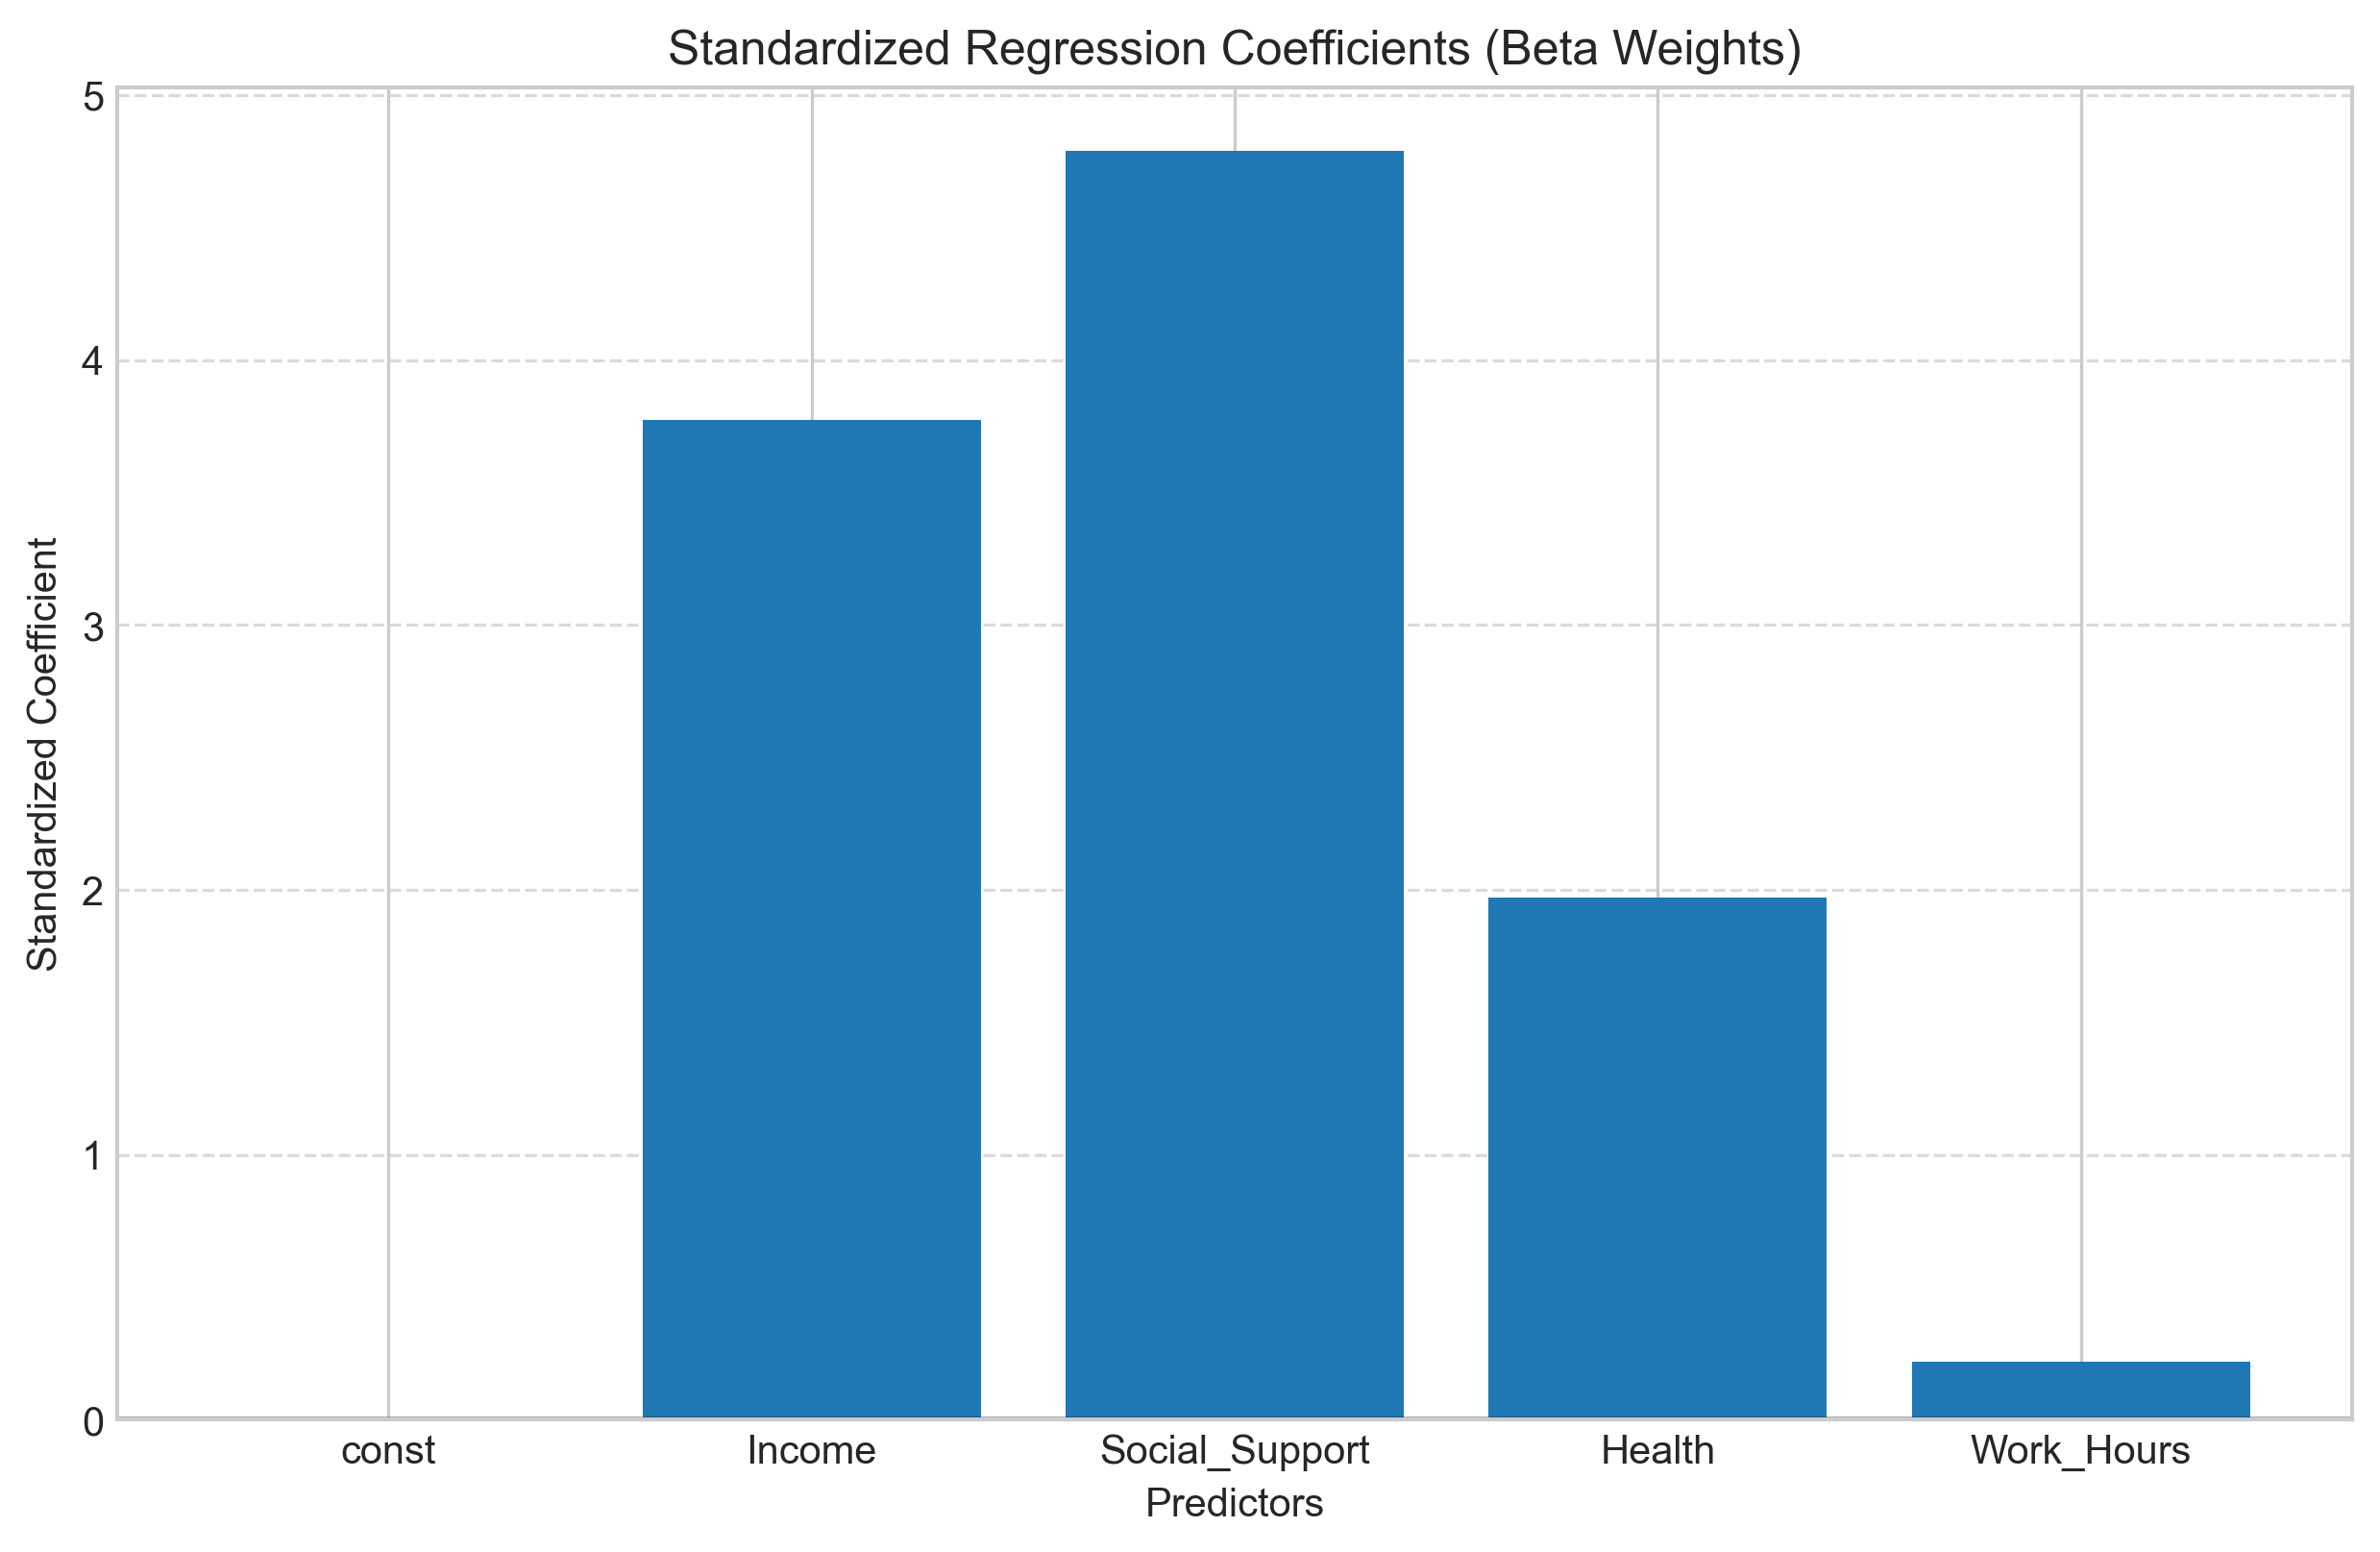

In [16]:
# Calculate standardized coefficients
X_standardized = (X - X.mean()) / X.std()

# Handle any potential NaN or inf values more robustly
X_standardized = X_standardized.clip(-10, 10)  # Clip extreme values
X_standardized = X_standardized.fillna(0)  # Replace NaN with 0

# Verify data is clean before proceeding
if X_standardized.isnull().any().any() or np.isinf(X_standardized.values).any():
    print("Warning: Some values could not be cleaned properly")
    # Continue processing instead of raising error
    
model_standardized = sm.OLS(y, sm.add_constant(X_standardized)).fit()

# Create a comparison table
comparison_df = pd.DataFrame({
    'Unstandardized': model.params[1:],  # Skip intercept
    'Standardized': model_standardized.params[1:]
})

print("Comparison of Unstandardized and Standardized Coefficients:")
print(comparison_df)

# Create a bar chart to visualize the standardized coefficients
plt.figure(figsize=(10, 6))
plt.bar(X.columns, model_standardized.params[1:])
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.title('Standardized Regression Coefficients (Beta Weights)')
plt.xlabel('Predictors')
plt.ylabel('Standardized Coefficient')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3.6 Multicollinearity

Multicollinearity occurs when predictor variables are highly correlated with each other. This can cause problems in multiple regression because:

1. It becomes difficult to determine the individual effect of each predictor
2. Standard errors of coefficients increase, making them less reliable
3. The model becomes sensitive to small changes in the data

We can detect multicollinearity using:

1. **Correlation matrix**: Check for high correlations between predictors
2. **Variance Inflation Factor (VIF)**: Measures how much the variance of a coefficient is inflated due to multicollinearity

A common rule of thumb is that VIF values greater than 10 indicate problematic multicollinearity, though some researchers use a more conservative threshold of 5.

Correlation Matrix of Predictors:
                const    Income  Social_Support    Health  Work_Hours
const             NaN       NaN             NaN       NaN         NaN
Income            NaN  1.000000       -0.136422  0.190840   -0.170227
Social_Support    NaN -0.136422        1.000000 -0.036632   -0.017613
Health            NaN  0.190840       -0.036632  1.000000   -0.000259
Work_Hours        NaN -0.170227       -0.017613 -0.000259    1.000000


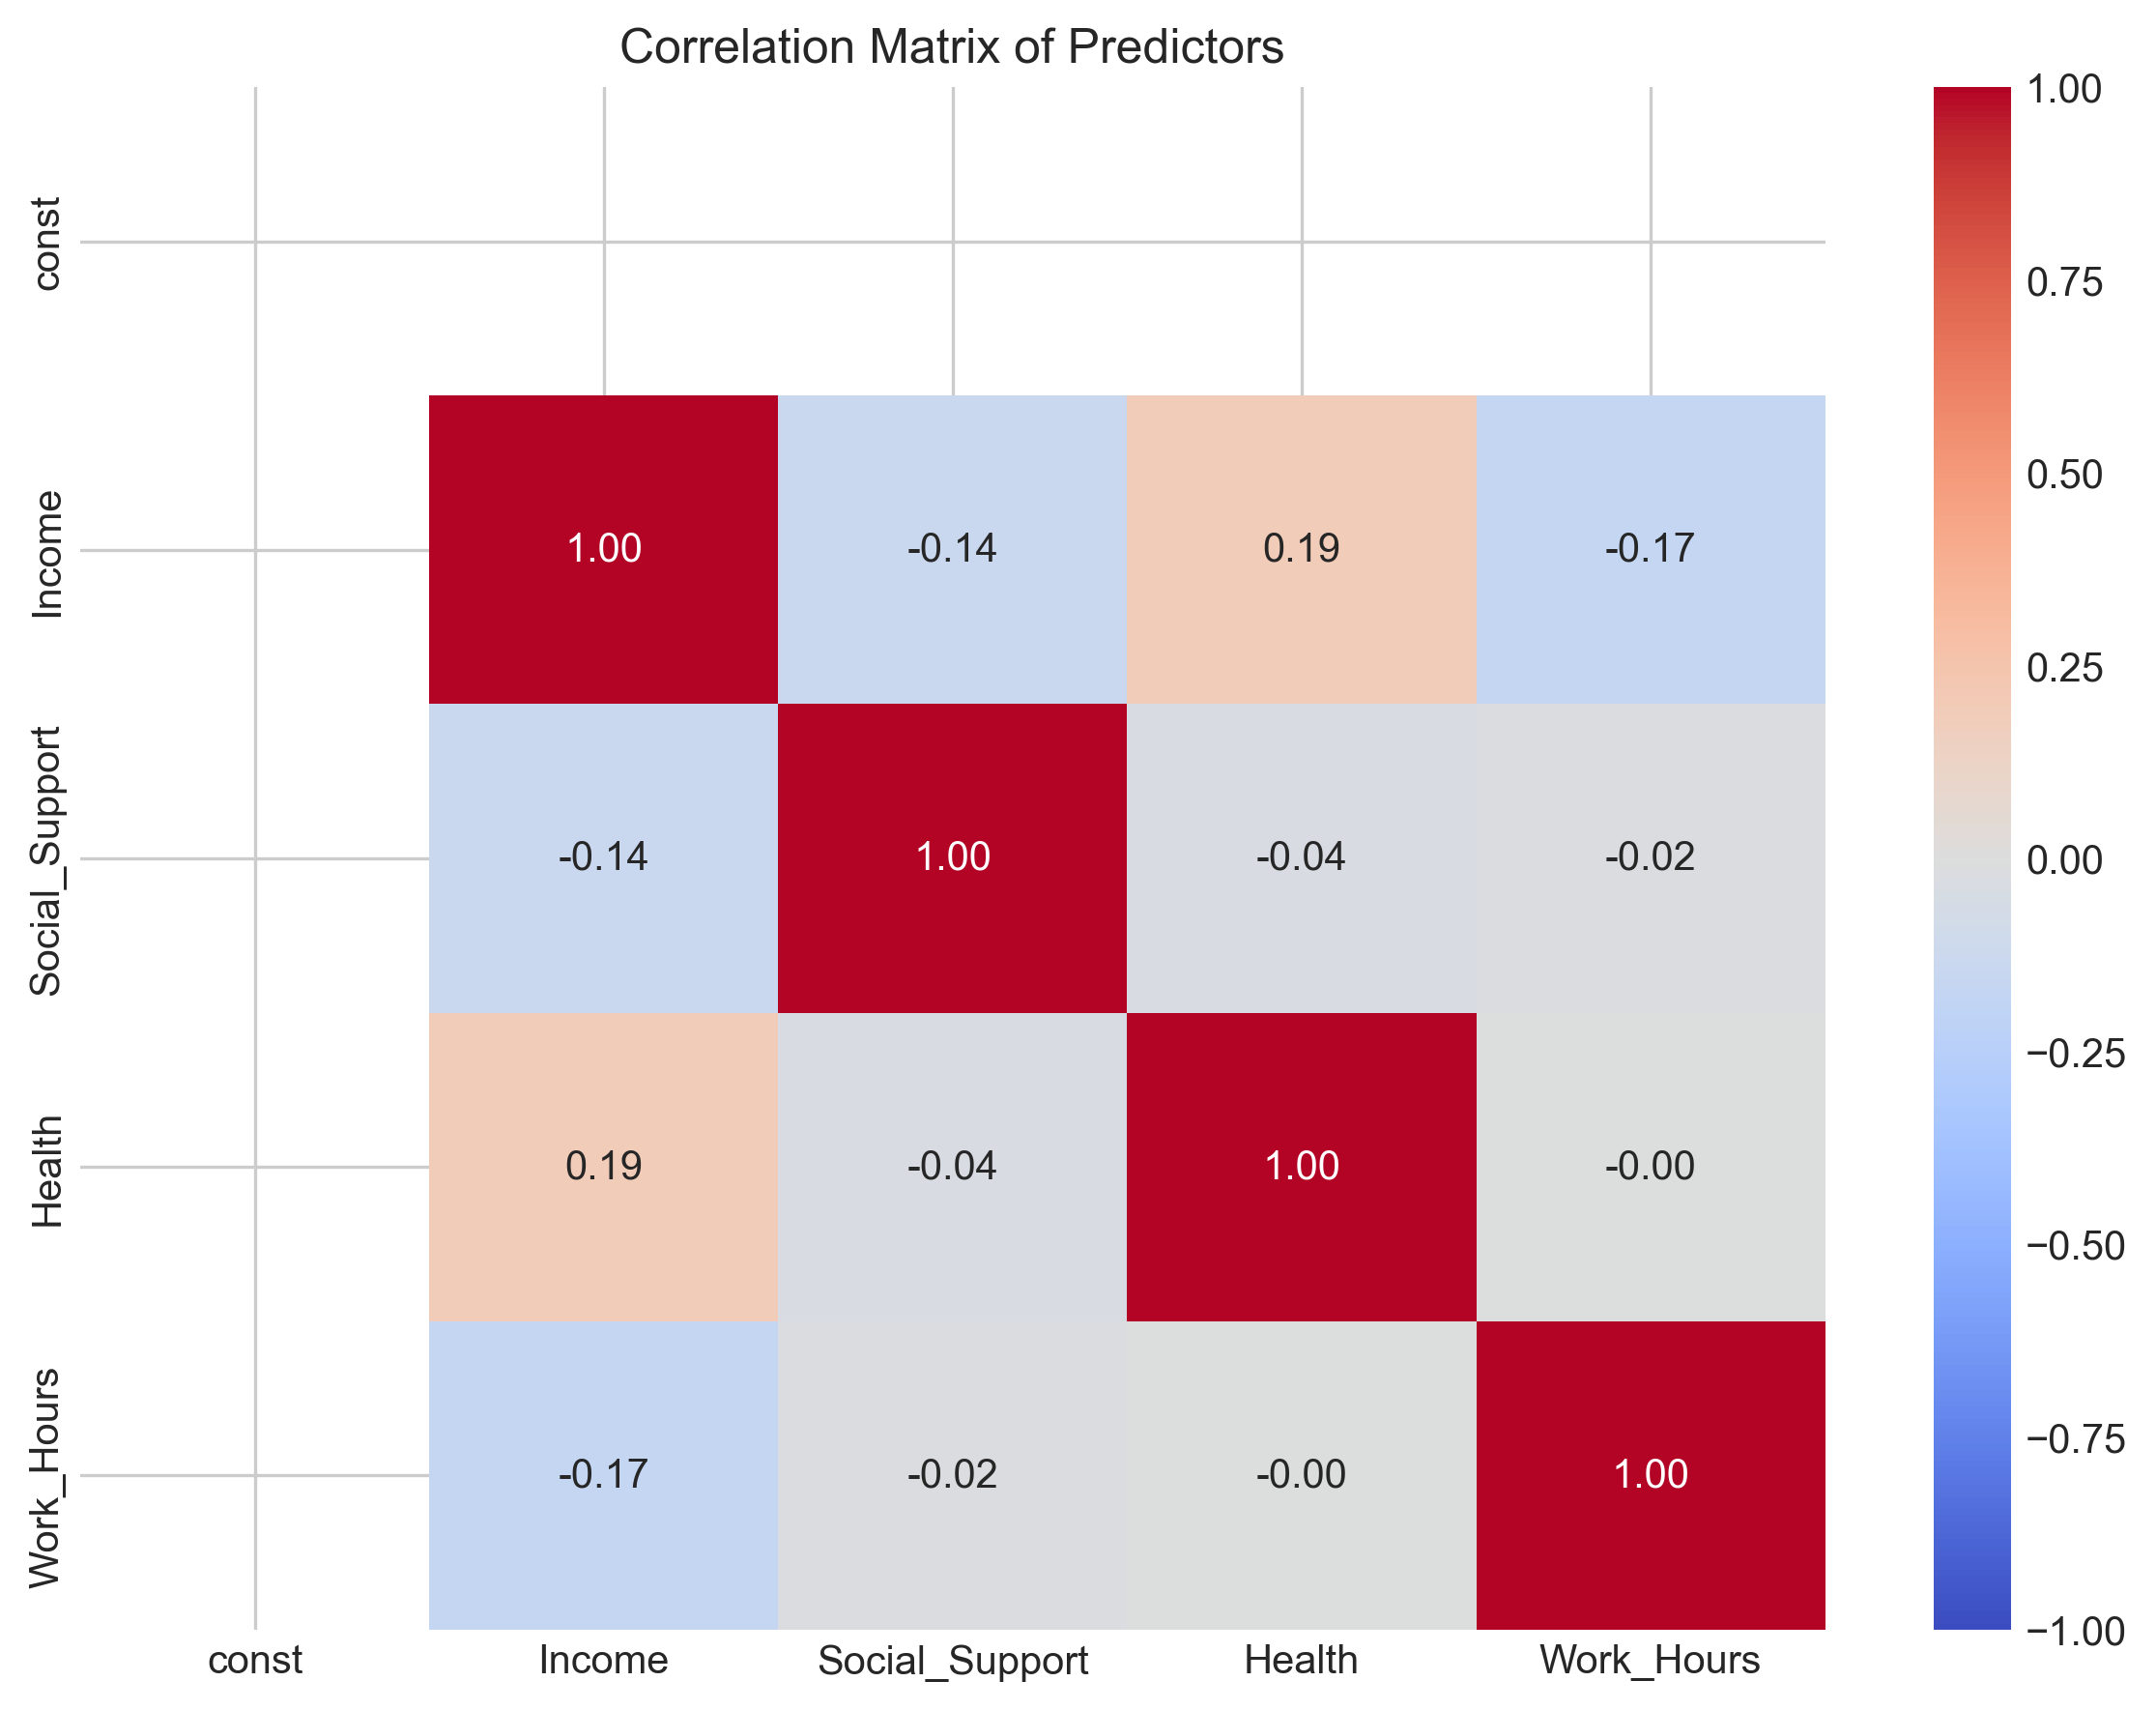


Variance Inflation Factors:
         Variable        VIF
0           const  80.632432
1          Income   1.090450
2  Social_Support   1.020843
3          Health   1.039044
4      Work_Hours   1.032764


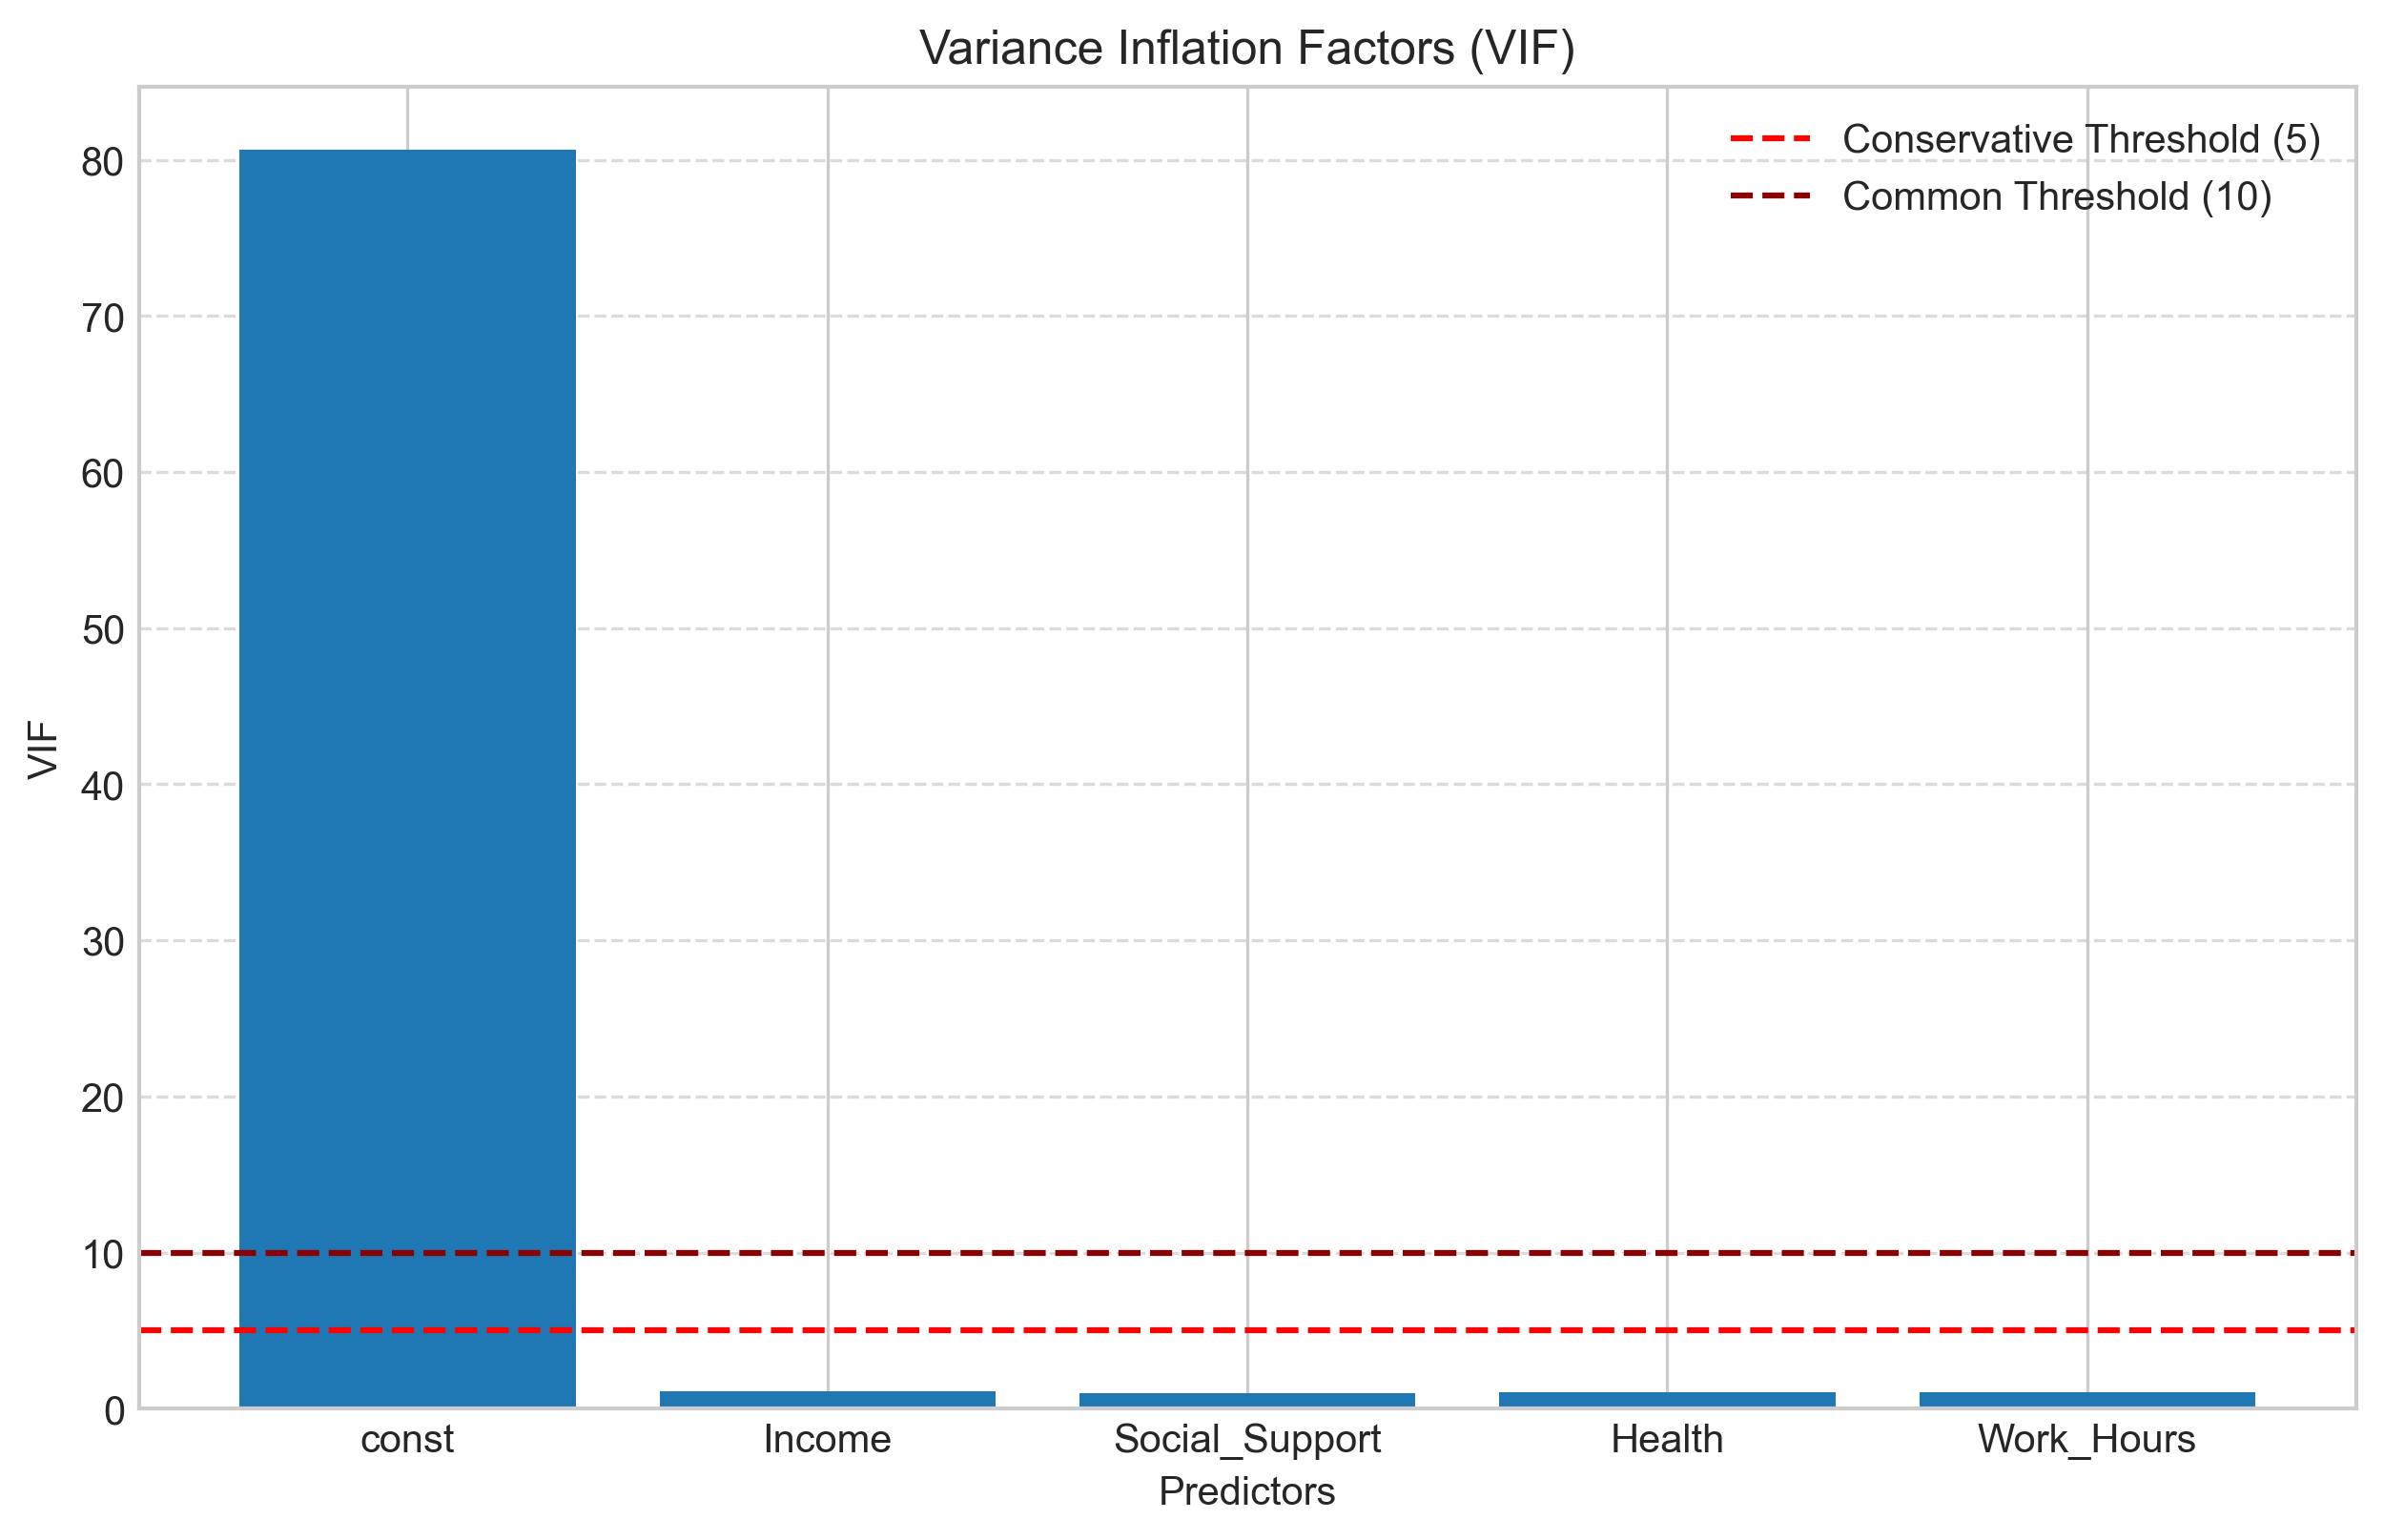

In [17]:
# Calculate correlation matrix of predictors
predictor_corr = X.corr()
print("Correlation Matrix of Predictors:")
print(predictor_corr)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(predictor_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of Predictors')
plt.tight_layout()
plt.show()

# Calculate VIF for each predictor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factors:")
print(vif_data)

# Visualize VIF values
plt.figure(figsize=(10, 6))
plt.bar(vif_data["Variable"], vif_data["VIF"])
plt.axhline(y=5, color='red', linestyle='--', label='Conservative Threshold (5)')
plt.axhline(y=10, color='darkred', linestyle='--', label='Common Threshold (10)')
plt.title('Variance Inflation Factors (VIF)')
plt.xlabel('Predictors')
plt.ylabel('VIF')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3.7 Feature Selection in Multiple Regression

When building a multiple regression model, we often need to decide which predictors to include. Including too many predictors can lead to overfitting, while excluding important predictors can result in a poorly specified model.

Common approaches to feature selection include:

1. **Theoretical selection**: Including variables based on theory and prior research
2. **Stepwise selection**: Automatically adding or removing predictors based on statistical criteria
   - Forward selection: Start with no predictors and add them one by one
   - Backward elimination: Start with all predictors and remove them one by one
   - Stepwise regression: Combination of forward and backward approaches
3. **Regularization**: Penalizing large coefficients (e.g., Ridge, Lasso)

Let's implement backward elimination as an example:

In [18]:
def backward_elimination(X, y, significance_level=0.05):
    """Perform backward elimination for feature selection"""
    # Start with all features
    features = list(X.columns)
    n_features = len(features)
    
    while n_features > 0:
        # Fit the model with current features
        X_current = X[features]
        model = sm.OLS(y, sm.add_constant(X_current)).fit()
        
        # Find the feature with the highest p-value
        p_values = model.pvalues[1:]  # Skip intercept
        max_p_value = p_values.max()
        max_p_feature = p_values.idxmax()
        
        # If the highest p-value is greater than the significance level, remove the feature
        if max_p_value > significance_level:
            features.remove(max_p_feature)
            n_features -= 1
            print(f"Removed {max_p_feature} with p-value {max_p_value:.4f}")
        else:
            # No more features to remove
            break
    
    # Final model
    final_X = X[features]
    final_model = sm.OLS(y, sm.add_constant(final_X)).fit()
    
    return final_model, features

# Apply backward elimination
final_model, selected_features = backward_elimination(X, y)

print("\nSelected Features:")
print(selected_features)
print("\nFinal Model Summary:")
print(final_model.summary())

# Compare R-squared values
print(f"\nFull Model R-squared: {model.rsquared:.4f}")
print(f"Selected Model R-squared: {final_model.rsquared:.4f}")
print(f"Difference: {model.rsquared - final_model.rsquared:.4f}")

# Compare AIC and BIC
print(f"\nFull Model AIC: {model.aic:.2f}")
print(f"Selected Model AIC: {final_model.aic:.2f}")
print(f"Full Model BIC: {model.bic:.2f}")
print(f"Selected Model BIC: {final_model.bic:.2f}")

Removed Work_Hours with p-value 0.6787

Selected Features:
['const', 'Income', 'Social_Support', 'Health']

Final Model Summary:
                            OLS Regression Results                            
Dep. Variable:      Life_Satisfaction   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     47.44
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           6.79e-19
Time:                        14:16:30   Log-Likelihood:                -303.52
No. Observations:                 100   AIC:                             615.0
Df Residuals:                      96   BIC:                             625.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975

## 4. Advanced Topics in Correlation and Regression

In this section, we'll explore some advanced topics and extensions of correlation and regression analysis that are particularly relevant to psychological research.

### 4.1 Moderation Analysis

Moderation occurs when the relationship between two variables depends on a third variable (the moderator). In regression terms, this is represented by an interaction effect.

For example, the relationship between stress and performance might depend on a person's coping skills. For individuals with good coping skills, stress might have a smaller negative effect on performance compared to those with poor coping skills.

Let's simulate and analyze a moderation effect:

Moderation Model Summary:
                            OLS Regression Results                            
Dep. Variable:            Performance   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     146.6
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           7.58e-50
Time:                        14:16:30   Log-Likelihood:                -739.68
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     196   BIC:                             1501.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
co

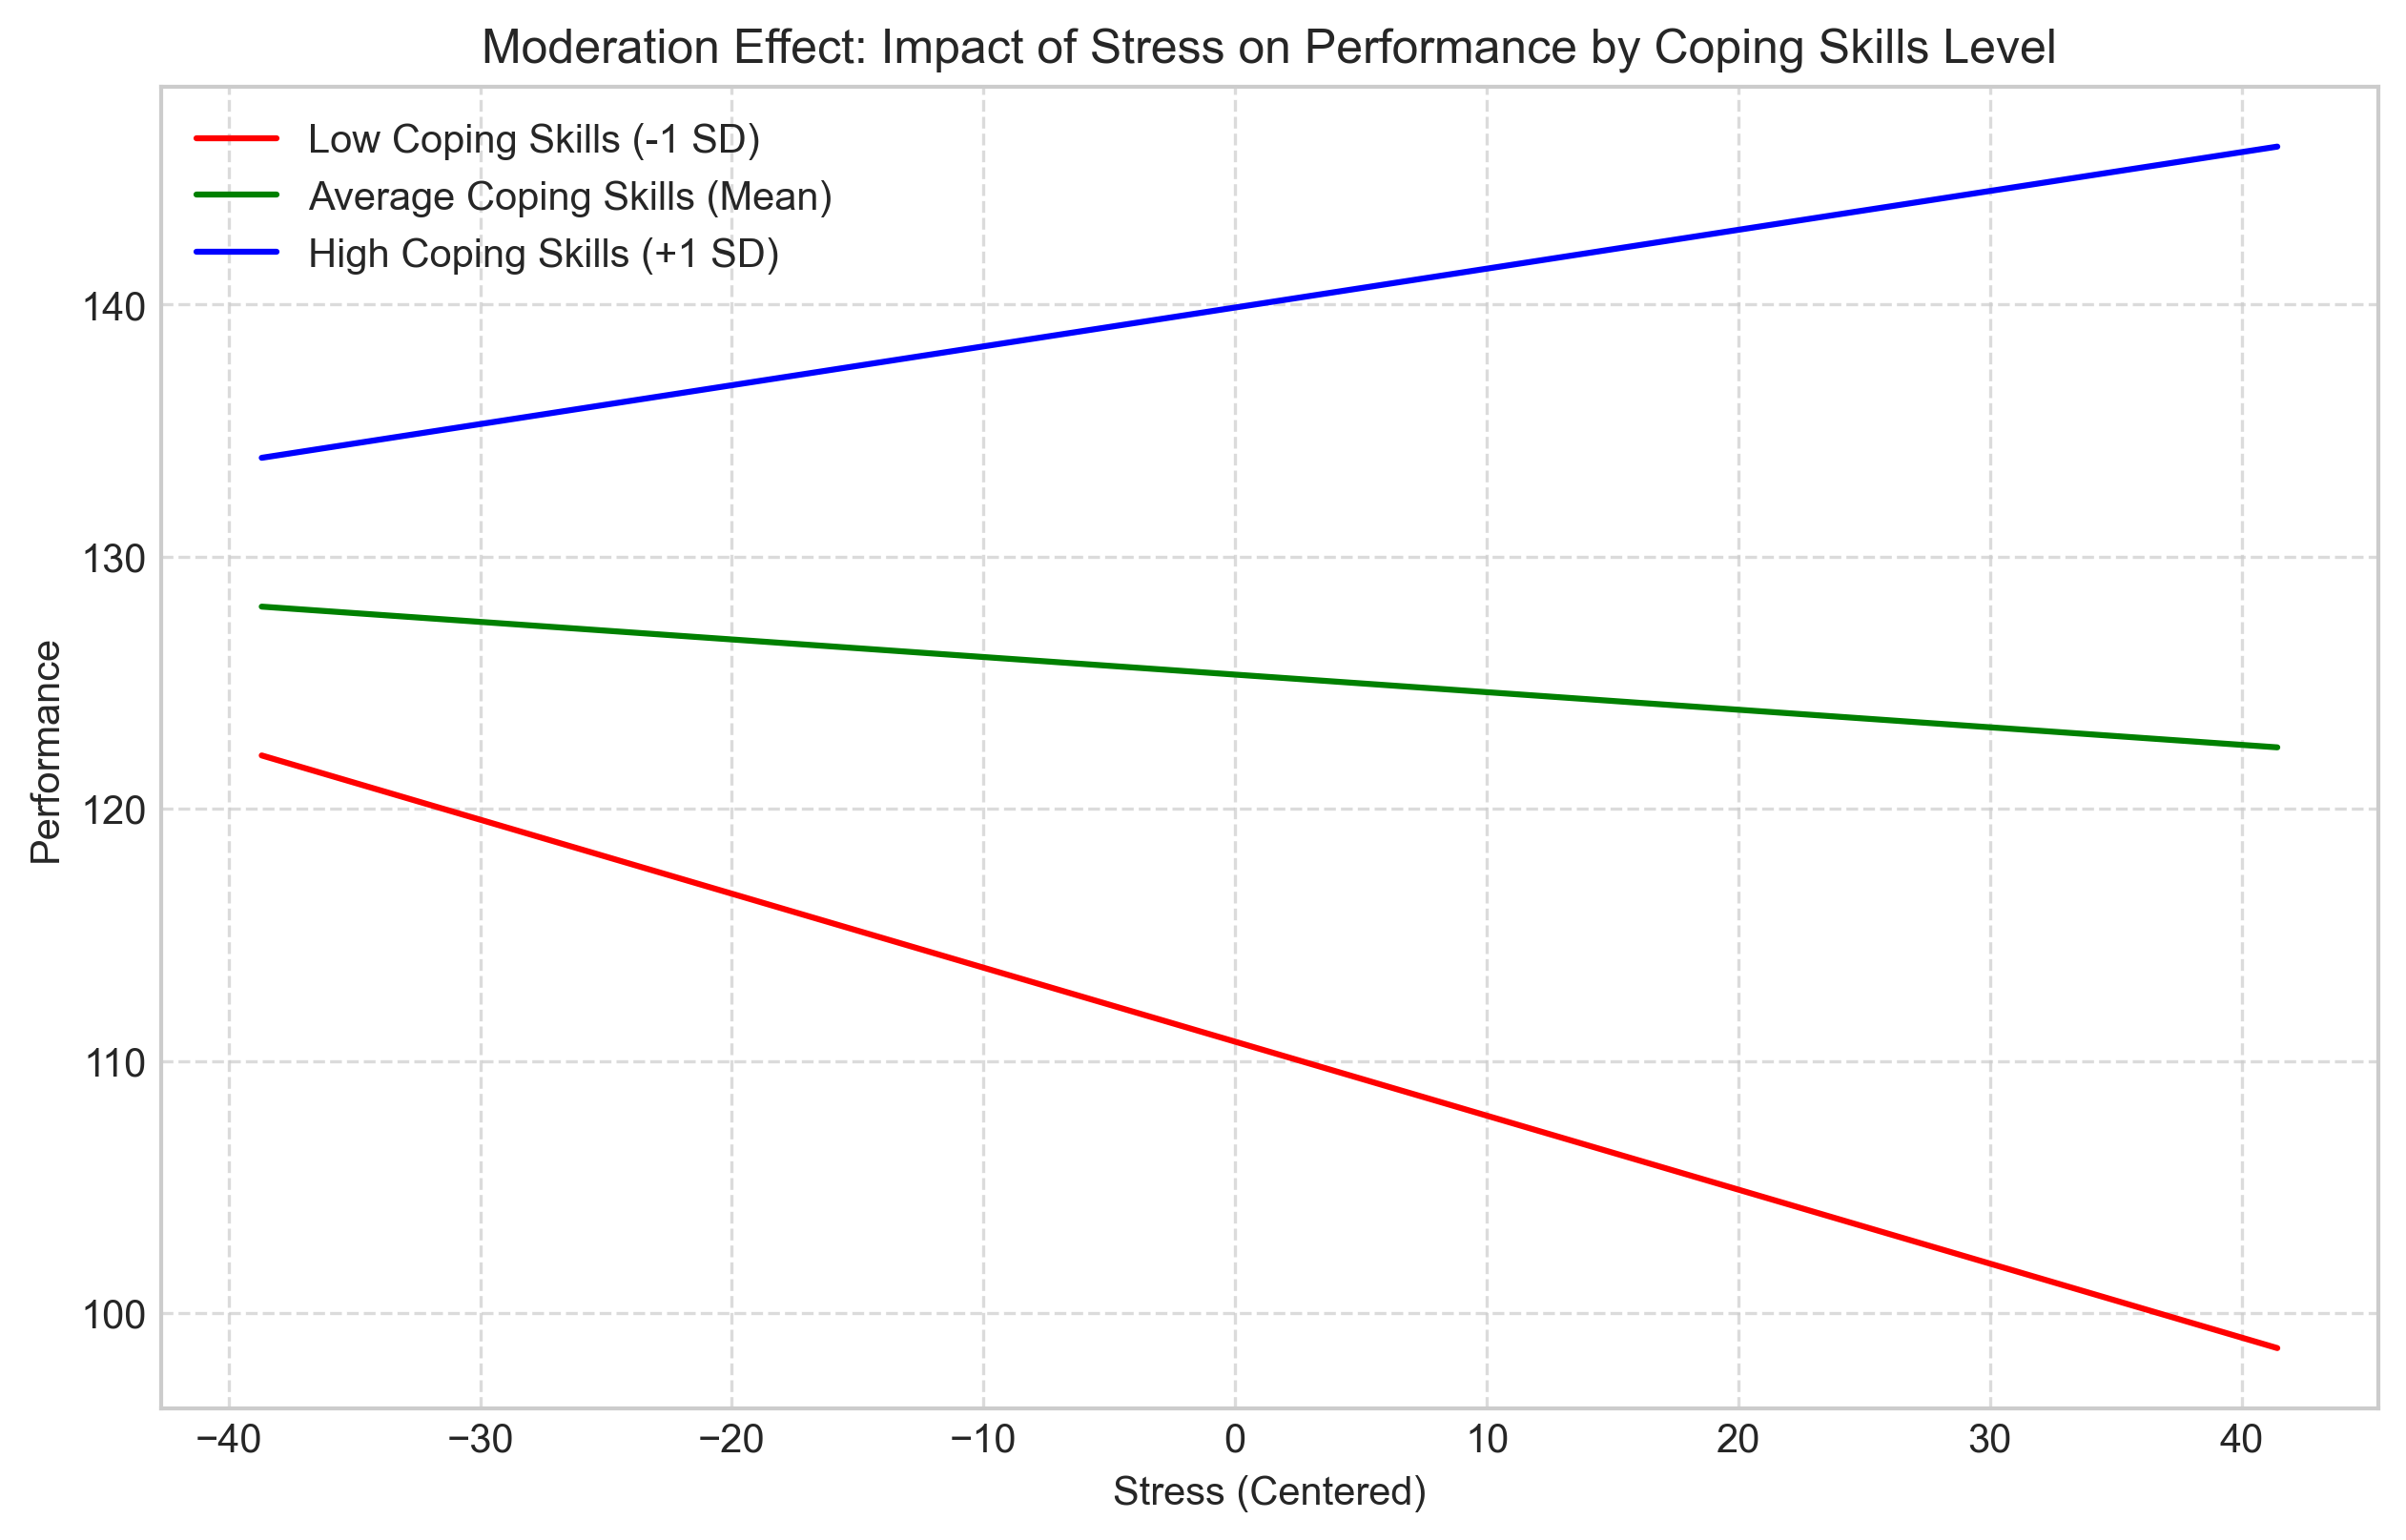

In [19]:
# Simulate data for moderation analysis
np.random.seed(42)
n = 200

# Independent variable: Stress
stress = np.random.normal(50, 15, n)

# Moderator: Coping skills
coping_skills = np.random.normal(5, 1.5, n)

# Create interaction term
interaction = stress * coping_skills

# Dependent variable: Performance
# The effect of stress on performance depends on coping skills
performance = 100 - 0.5*stress + 5*coping_skills + 0.1*interaction + np.random.normal(0, 10, n)

# Create DataFrame
mod_data = pd.DataFrame({
    'Stress': stress,
    'Coping_Skills': coping_skills,
    'Performance': performance
})

# Center the variables for easier interpretation
mod_data['Stress_Centered'] = mod_data['Stress'] - mod_data['Stress'].mean()
mod_data['Coping_Skills_Centered'] = mod_data['Coping_Skills'] - mod_data['Coping_Skills'].mean()
mod_data['Interaction'] = mod_data['Stress_Centered'] * mod_data['Coping_Skills_Centered']

# Fit the moderation model
X_mod = mod_data[['Stress_Centered', 'Coping_Skills_Centered', 'Interaction']]
y_mod = mod_data['Performance']
mod_model = sm.OLS(y_mod, sm.add_constant(X_mod)).fit()

print("Moderation Model Summary:")
print(mod_model.summary())

# Visualize the moderation effect
# Create a grid of stress values
stress_range = np.linspace(mod_data['Stress_Centered'].min(), 
                          mod_data['Stress_Centered'].max(), 100)

# Plot for different levels of coping skills
plt.figure(figsize=(10, 6))

# Low coping skills (-1 SD)
low_coping = mod_data['Coping_Skills_Centered'].mean() - mod_data['Coping_Skills_Centered'].std()
y_low = (mod_model.params[0] + mod_model.params[1] * stress_range + 
         mod_model.params[2] * low_coping + mod_model.params[3] * stress_range * low_coping)
plt.plot(stress_range, y_low, 'r-', label=f'Low Coping Skills (-1 SD)')

# Medium coping skills (Mean)
med_coping = mod_data['Coping_Skills_Centered'].mean()
y_med = (mod_model.params[0] + mod_model.params[1] * stress_range + 
         mod_model.params[2] * med_coping + mod_model.params[3] * stress_range * med_coping)
plt.plot(stress_range, y_med, 'g-', label='Average Coping Skills (Mean)')

# High coping skills (+1 SD)
high_coping = mod_data['Coping_Skills_Centered'].mean() + mod_data['Coping_Skills_Centered'].std()
y_high = (mod_model.params[0] + mod_model.params[1] * stress_range + 
          mod_model.params[2] * high_coping + mod_model.params[3] * stress_range * high_coping)
plt.plot(stress_range, y_high, 'b-', label='High Coping Skills (+1 SD)')

plt.title('Moderation Effect: Impact of Stress on Performance by Coping Skills Level')
plt.xlabel('Stress (Centered)')
plt.ylabel('Performance')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 4.2 Mediation Analysis

Mediation analysis examines how an independent variable affects a dependent variable through one or more intervening variables (mediators). This helps us understand the mechanism or process underlying a relationship.

For example, the relationship between childhood trauma and adult depression might be mediated by negative cognitive schemas.

Let's simulate and analyze a simple mediation model:

Mediation Analysis Results:
a path (Trauma → Schemas): 0.6706, p = 0.0000
b path (Schemas → Depression): 0.6769, p = 0.0000
c' path (Direct effect: Trauma → Depression): 0.2008, p = 0.0145
c path (Total effect: Trauma → Depression): 0.6548, p = 0.0000
Indirect effect (a*b): 0.4540
Proportion mediated: 0.6933


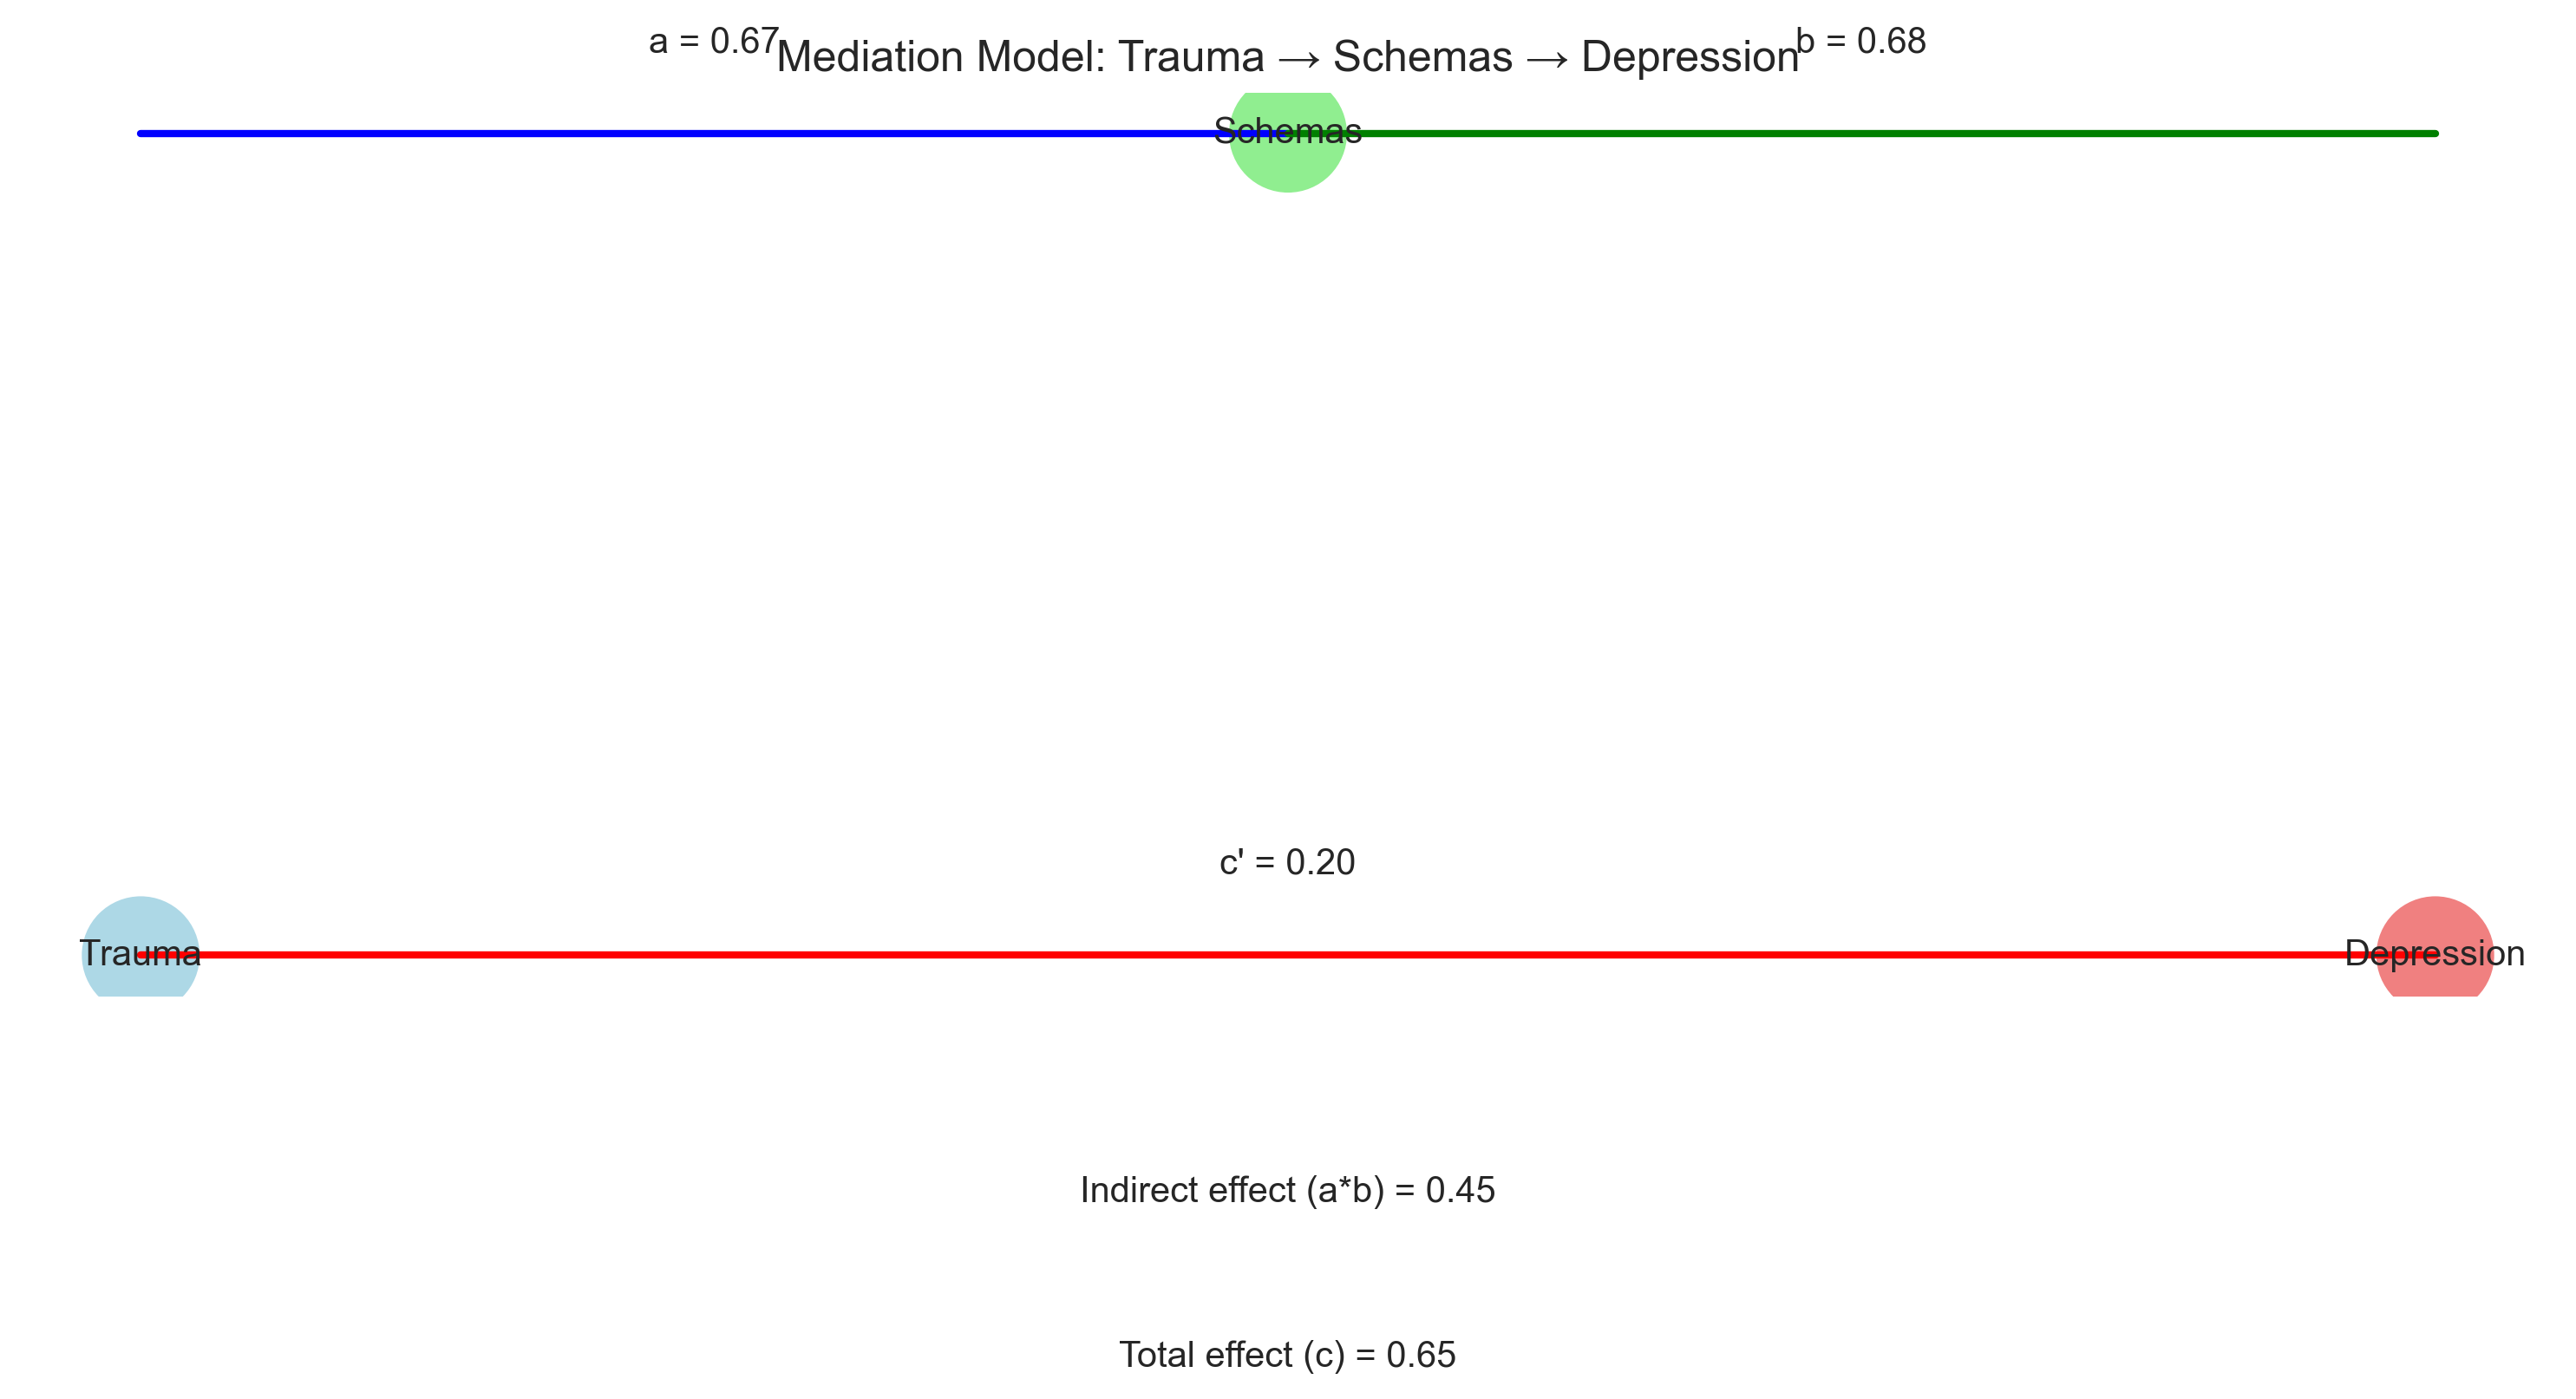

In [20]:
# Simulate data for mediation analysis
np.random.seed(42)
n = 200

# Independent variable: Childhood trauma
trauma = np.random.normal(3, 1, n)

# Mediator: Negative cognitive schemas
schemas = 0.6 * trauma + np.random.normal(0, 0.7, n)

# Dependent variable: Depression
depression = 0.3 * trauma + 0.7 * schemas + np.random.normal(0, 0.8, n)

# Create DataFrame
med_data = pd.DataFrame({
    'Trauma': trauma,
    'Schemas': schemas,
    'Depression': depression
})

# Step 1: Regress mediator on independent variable (a path)
model_a = sm.OLS(med_data['Schemas'], sm.add_constant(med_data['Trauma'])).fit()
a_coef = model_a.params[1]
a_p = model_a.pvalues[1]

# Step 2: Regress dependent variable on both independent variable and mediator (b and c' paths)
model_bc = sm.OLS(med_data['Depression'], 
                 sm.add_constant(med_data[['Trauma', 'Schemas']])).fit()
b_coef = model_bc.params[2]  # Effect of mediator on DV
b_p = model_bc.pvalues[2]
c_prime_coef = model_bc.params[1]  # Direct effect of IV on DV
c_prime_p = model_bc.pvalues[1]

# Step 3: Regress dependent variable on independent variable only (c path - total effect)
model_c = sm.OLS(med_data['Depression'], sm.add_constant(med_data['Trauma'])).fit()
c_coef = model_c.params[1]
c_p = model_c.pvalues[1]

# Calculate indirect effect (a*b)
indirect_effect = a_coef * b_coef

# Print results
print("Mediation Analysis Results:")
print(f"a path (Trauma → Schemas): {a_coef:.4f}, p = {a_p:.4f}")
print(f"b path (Schemas → Depression): {b_coef:.4f}, p = {b_p:.4f}")
print(f"c' path (Direct effect: Trauma → Depression): {c_prime_coef:.4f}, p = {c_prime_p:.4f}")
print(f"c path (Total effect: Trauma → Depression): {c_coef:.4f}, p = {c_p:.4f}")
print(f"Indirect effect (a*b): {indirect_effect:.4f}")
print(f"Proportion mediated: {indirect_effect/c_coef:.4f}")

# Visualize the mediation model
plt.figure(figsize=(10, 6))

# Create a simple diagram
plt.plot([0, 1], [1, 1], 'b-', linewidth=2)  # a path
plt.plot([1, 2], [1, 1], 'g-', linewidth=2)  # b path
plt.plot([0, 2], [0, 0], 'r-', linewidth=2)  # c' path

# Add text
plt.text(0.5, 1.1, f'a = {a_coef:.2f}', ha='center')
plt.text(1.5, 1.1, f'b = {b_coef:.2f}', ha='center')
plt.text(1, 0.1, f"c' = {c_prime_coef:.2f}", ha='center')
plt.text(1, -0.3, f"Indirect effect (a*b) = {indirect_effect:.2f}", ha='center')
plt.text(1, -0.5, f"Total effect (c) = {c_coef:.2f}", ha='center')

# Add nodes
plt.scatter([0, 1, 2], [0, 1, 0], s=1000, color=['lightblue', 'lightgreen', 'lightcoral'])
plt.text(0, 0, 'Trauma', ha='center', va='center')
plt.text(1, 1, 'Schemas', ha='center', va='center')
plt.text(2, 0, 'Depression', ha='center', va='center')

# Remove axes
plt.axis('off')
plt.title('Mediation Model: Trauma → Schemas → Depression')
plt.tight_layout()
plt.show()

### 4.3 Hierarchical Regression

Hierarchical regression (also called sequential regression) involves entering predictors into the regression model in a specified order based on theoretical or logical considerations. This approach allows researchers to examine how the addition of variables changes the model's explanatory power.

For example, a researcher might first enter demographic variables, then add psychological variables, and finally include interaction terms.

Let's implement a hierarchical regression analysis:

Hierarchical Regression Results:
Step 1 (Demographics): R² = 0.0377, Adj. R² = 0.0280
Step 2 (+ Psychological): R² = 0.5114, Adj. R² = 0.5013
Step 3 (+ Interaction): R² = 0.5301, Adj. R² = 0.5180

R² Change Statistics:
Step 1: ΔR² = 0.0377, F = 3.86, p = 0.0226
Step 2: ΔR² = 0.4736, F = 94.50, p = 0.0000
Step 3: ΔR² = 0.0188, F = 7.75, p = 0.0059


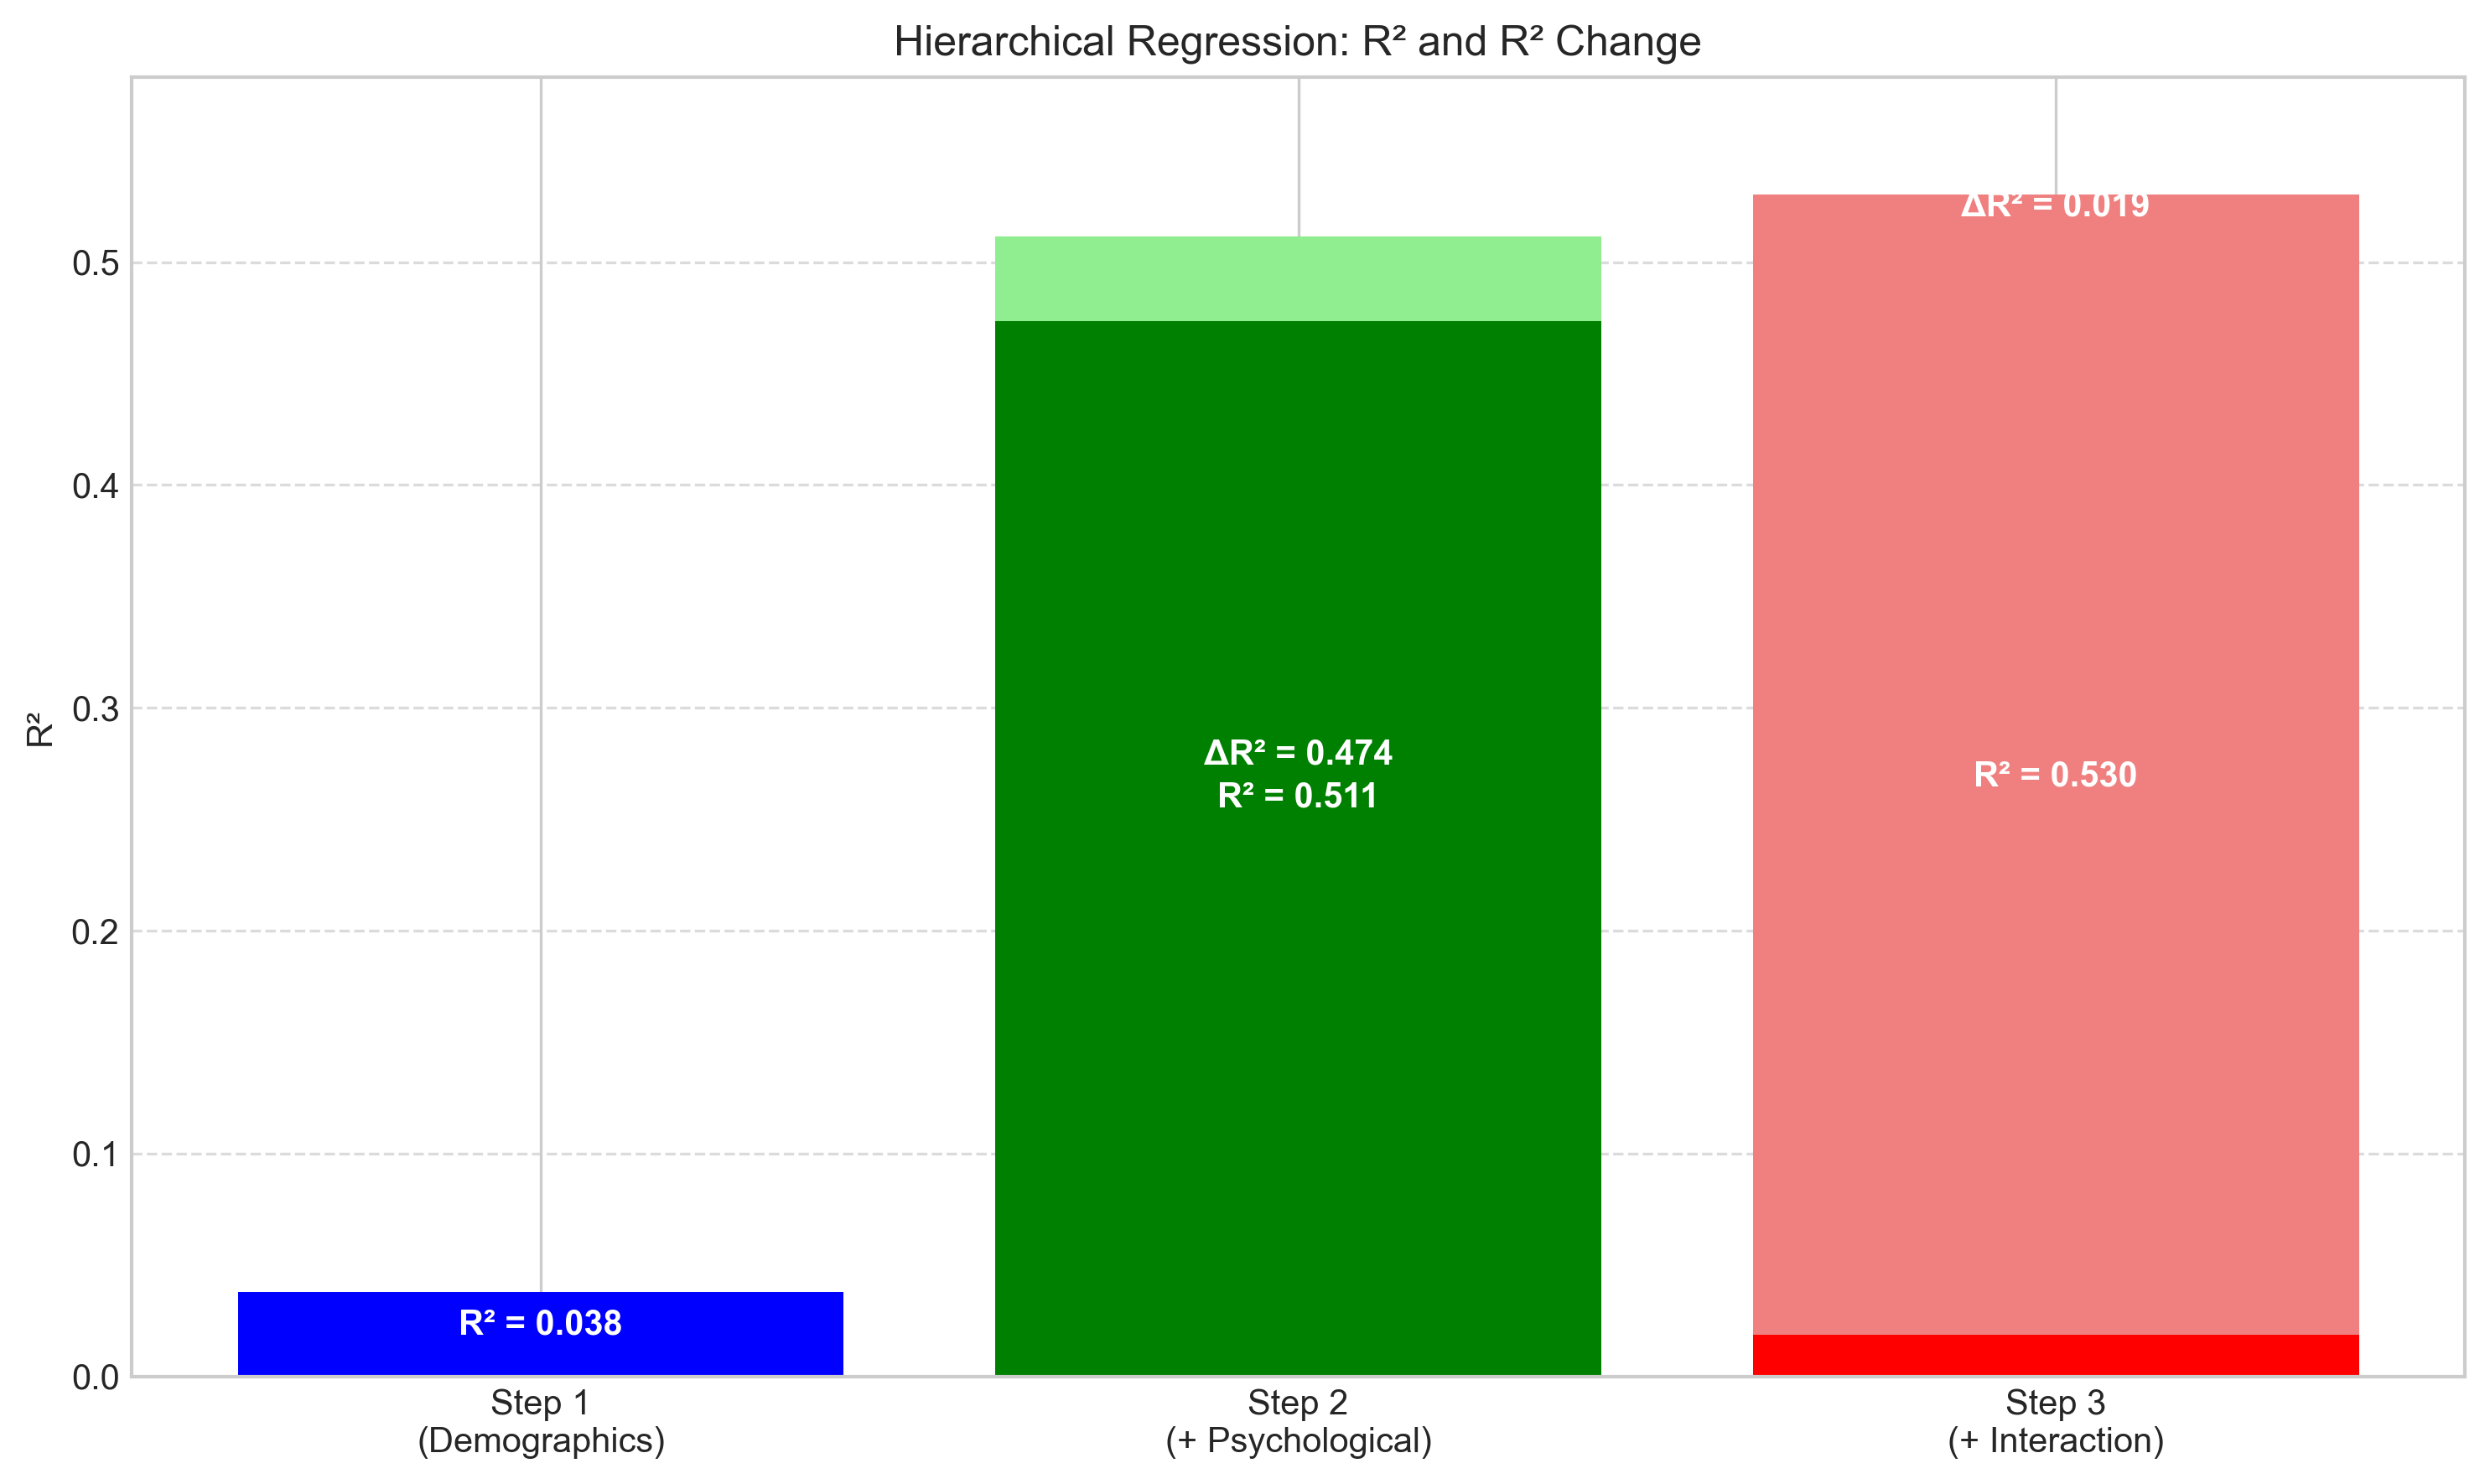

In [21]:
# Simulate data for hierarchical regression
np.random.seed(42)
n = 200

# Step 1: Demographic variables
age = np.random.uniform(18, 65, n)
gender = np.random.binomial(1, 0.5, n)  # 0 = male, 1 = female

# Step 2: Psychological variables
neuroticism = np.random.normal(3, 1, n)
extraversion = np.random.normal(3.5, 0.8, n)

# Step 3: Interaction
interaction = neuroticism * extraversion

# Dependent variable: Well-being
well_being = (50 + 0.1*age + 2*gender - 3*neuroticism + 2*extraversion - 
              0.5*interaction + np.random.normal(0, 5, n))

# Create DataFrame
hier_data = pd.DataFrame({
    'Age': age,
    'Gender': gender,
    'Neuroticism': neuroticism,
    'Extraversion': extraversion,
    'Well_Being': well_being
})

# Create interaction term
hier_data['Neuroticism_x_Extraversion'] = hier_data['Neuroticism'] * hier_data['Extraversion']

# Hierarchical regression
# Step 1: Demographics only
X1 = hier_data[['Age', 'Gender']]
model1 = sm.OLS(hier_data['Well_Being'], sm.add_constant(X1)).fit()

# Step 2: Add psychological variables
X2 = hier_data[['Age', 'Gender', 'Neuroticism', 'Extraversion']]
model2 = sm.OLS(hier_data['Well_Being'], sm.add_constant(X2)).fit()

# Step 3: Add interaction
X3 = hier_data[['Age', 'Gender', 'Neuroticism', 'Extraversion', 'Neuroticism_x_Extraversion']]
model3 = sm.OLS(hier_data['Well_Being'], sm.add_constant(X3)).fit()

# Compare models
print("Hierarchical Regression Results:")
print(f"Step 1 (Demographics): R² = {model1.rsquared:.4f}, Adj. R² = {model1.rsquared_adj:.4f}")
print(f"Step 2 (+ Psychological): R² = {model2.rsquared:.4f}, Adj. R² = {model2.rsquared_adj:.4f}")
print(f"Step 3 (+ Interaction): R² = {model3.rsquared:.4f}, Adj. R² = {model3.rsquared_adj:.4f}")

# Calculate R² change
r2_change1 = model1.rsquared
r2_change2 = model2.rsquared - model1.rsquared
r2_change3 = model3.rsquared - model2.rsquared

# F-test for R² change
from scipy import stats

# Function to calculate F-change
def f_change(r2_change, r2_full, df_change, df_resid_full):
    f = (r2_change / df_change) / ((1 - r2_full) / df_resid_full)
    p = 1 - stats.f.cdf(f, df_change, df_resid_full)
    return f, p

# Calculate F-change for each step
f1, p1 = f_change(r2_change1, model1.rsquared, 2, n-3)
f2, p2 = f_change(r2_change2, model2.rsquared, 2, n-5)
f3, p3 = f_change(r2_change3, model3.rsquared, 1, n-6)

print("\nR² Change Statistics:")
print(f"Step 1: ΔR² = {r2_change1:.4f}, F = {f1:.2f}, p = {p1:.4f}")
print(f"Step 2: ΔR² = {r2_change2:.4f}, F = {f2:.2f}, p = {p2:.4f}")
print(f"Step 3: ΔR² = {r2_change3:.4f}, F = {f3:.2f}, p = {p3:.4f}")

# Visualize R² change
plt.figure(figsize=(10, 6))
models = ['Step 1\n(Demographics)', 'Step 2\n(+ Psychological)', 'Step 3\n(+ Interaction)']
r2_values = [model1.rsquared, model2.rsquared, model3.rsquared]
r2_changes = [r2_change1, r2_change2, r2_change3]

# Create stacked bar chart
plt.bar(models, r2_values, color=['lightblue', 'lightgreen', 'lightcoral'])
plt.bar(models, r2_changes, color=['blue', 'green', 'red'])

plt.title('Hierarchical Regression: R² and R² Change')
plt.ylabel('R²')
plt.ylim(0, max(r2_values) * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text annotations
for i, (r2, change) in enumerate(zip(r2_values, r2_changes)):
    plt.text(i, r2/2, f'R² = {r2:.3f}', ha='center', color='white', fontweight='bold')
    if i > 0:
        plt.text(i, r2-change/2, f'ΔR² = {change:.3f}', ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Summary and Practical Considerations

### 5.1 Key Points

1. **Correlation**:
   - Measures the strength and direction of a linear relationship between two variables
   - Pearson's r ranges from -1 to +1
   - Alternative measures (Spearman, Kendall) are available for non-linear or non-normal data
   - Correlation does not imply causation

2. **Simple Linear Regression**:
   - Models the relationship between one predictor and one outcome variable
   - Provides a slope (b) and intercept (a) for the equation y = a + bx
   - R² indicates the proportion of variance explained by the model

3. **Multiple Regression**:
   - Extends simple regression to include multiple predictors
   - Coefficients represent the effect of each predictor while controlling for others
   - Adjusted R² accounts for the number of predictors
   - Assumptions include linearity, normality of residuals, homoscedasticity, and no multicollinearity

4. **Advanced Techniques**:
   - Moderation analysis examines how the relationship between variables depends on a third variable
   - Mediation analysis explores the mechanism through which an independent variable affects a dependent variable
   - Hierarchical regression allows for the sequential addition of predictors to examine incremental validity

### 5.2 Practical Recommendations

When conducting correlation and regression analyses in psychological research:

1. **Begin with clear research questions** and hypotheses about relationships between variables

2. **Examine your data** before analysis:
   - Check for outliers and influential cases
   - Assess normality and linearity
   - Consider transformations if necessary

3. **Choose appropriate methods**:
   - Select the right correlation measure based on your data characteristics
   - Consider simple regression for basic relationships
   - Use multiple regression when controlling for confounds or examining multiple predictors
   - Apply advanced techniques (moderation, mediation) when testing specific theoretical models

4. **Interpret results carefully**:
   - Consider practical significance, not just statistical significance
   - Acknowledge limitations of correlational designs
   - Be cautious about causal claims
   - Report effect sizes and confidence intervals

5. **Validate your models**:
   - Check model assumptions
   - Consider cross-validation for predictive models
   - Be wary of overfitting, especially with small samples

### 5.3 Conclusion

Correlation and regression are powerful tools for understanding relationships between psychological variables. When used appropriately, they can provide valuable insights into human behavior, cognition, and emotion. However, they must be applied with careful attention to their assumptions and limitations. By combining statistical rigor with theoretical grounding, researchers can use these techniques to advance psychological science.